In [68]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]
df_nox = xls.parse("Sheet2")[1:]
df_static_adax = xls.parse("Sheet3")[1:]


In [25]:

# Trust items
trust_items = ['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4', 'Q107_5', 'Q107_6', 'Q107_7', 'Q107_8', 'Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df[trust_items] = df[trust_items].apply(pd.to_numeric, errors='coerce')

# Pre-trust
df_pre['trust_reliab_pre'] = df_pre[['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4']].mean(axis=1)
df_pre['trust_compet_pre'] = df_pre[['Q107_5', 'Q107_6', 'Q107_7']].mean(axis=1)
df_pre['trust_transp_pre'] = df_pre[['Q107_8', 'Q107_9']].mean(axis=1)
df_pre['trust_score_pre'] = df_pre[['trust_reliab_pre', 'trust_compet_pre', 'trust_transp_pre']].mean(axis=1)
pre_trust = df_pre[['player_Id', 'trust_score_pre']]


In [70]:

def compute_post_trust(df, df_pre):
    df['trust_reliab'] = df[['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4']].mean(axis=1)
    df['trust_compet'] = df[['Q107_5', 'Q107_6', 'Q107_7']].mean(axis=1)
    df['trust_transp'] = df[['Q107_8', 'Q107_9']].mean(axis=1)
    df['trust_score_post'] = df[['trust_reliab', 'trust_compet', 'trust_transp']].mean(axis=1)
    df = df.merge(df_pre, on='player_Id', how='left')
    df['trust_delta'] = df['trust_score_post'] - df['trust_score_pre']
    return df

df_nox['xai_agent'] = 'NoX'
df_static_adax = compute_post_trust(df_static_adax, pre_trust)
df_nox = compute_post_trust(df_nox, pre_trust)
df_combined = pd.concat([df_nox, df_static_adax], ignore_index=True)
df_combined.to_csv("final_trust_scores.csv", index=False)
print("✅ Exported to final_trust_scores.csv")


✅ Exported to final_trust_scores.csv


In [72]:

# Reload to ensure consistency
df = pd.read_csv("final_trust_scores.csv")

# Normalize agent column if needed
if 'xai_agent' not in df.columns and 'condition' in df.columns:
    df['xai_agent'] = df['condition']

# Plot trust by agent and layout
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='xai_agent', y='trust_score_post', hue='layout')
plt.title("Post-Game Trust Score Across XAI Levels and Layouts")
plt.xlabel("XAI Explanation Condition")
plt.ylabel("Trust Score (Post)")
plt.legend(title='Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_93747/3615204397.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


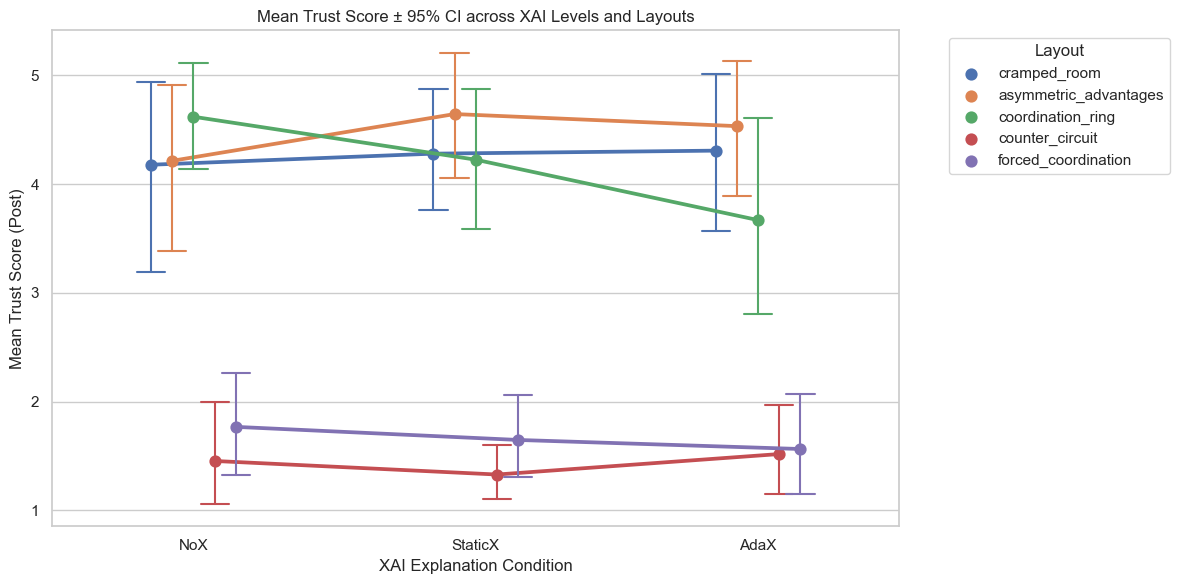

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load processed data
df = pd.read_csv("final_trust_scores.csv")

# Ensure column names
if 'xai_agent' not in df.columns and 'condition' in df.columns:
    df['xai_agent'] = df['condition']

# Set seaborn style
sns.set(style="whitegrid")

# Plot: mean ± 95% CI
plt.figure(figsize=(12, 6))
sns.pointplot(
    data=df,
    x='xai_agent',
    y='trust_score_post',
    hue='layout',
    ci=95,              # 95% confidence interval
    dodge=0.3,
    markers='o',
    capsize=0.1,
    errwidth=1.5
)
plt.title("Mean Trust Score ± 95% CI across XAI Levels and Layouts")
plt.ylabel("Mean Trust Score (Post)")
plt.xlabel("XAI Explanation Condition")
plt.legend(title='Layout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_93747/2985613585.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


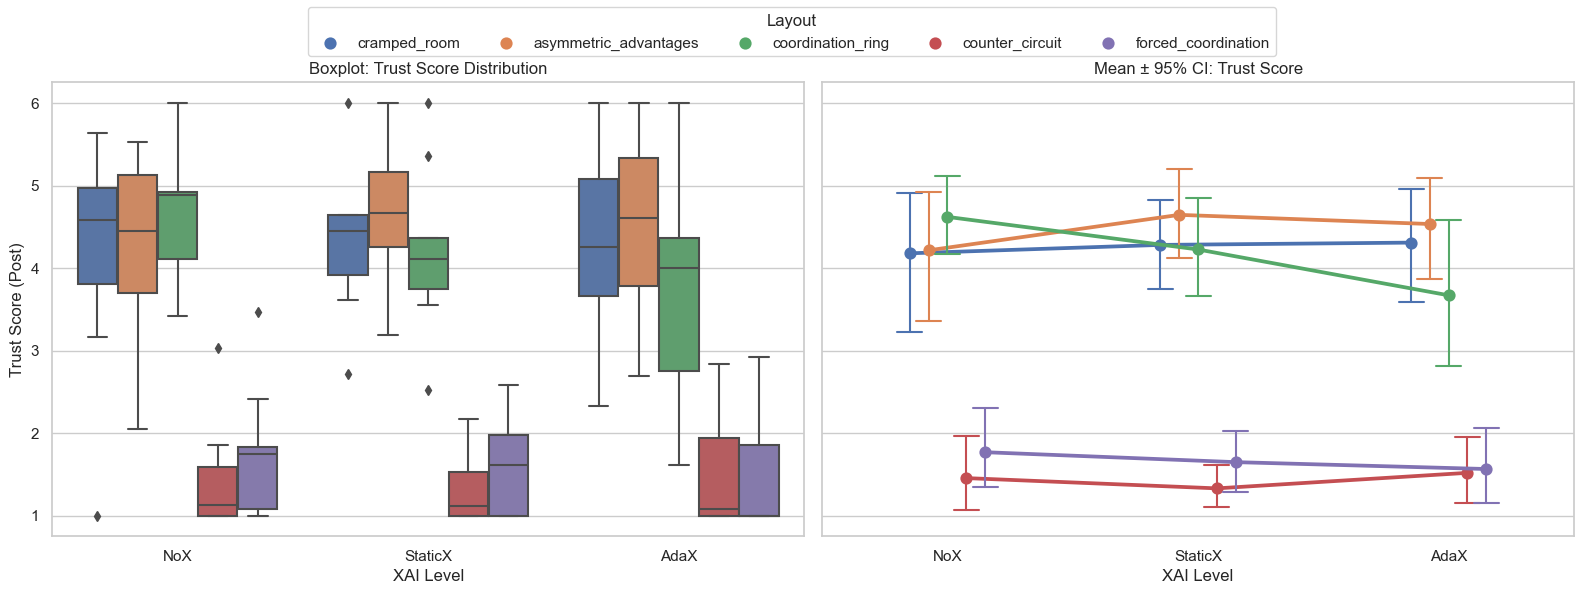

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load processed trust data
df = pd.read_csv("final_trust_scores.csv")  # Ensure this CSV is available

# Ensure 'xai_agent' and 'layout' columns are present
if 'xai_agent' not in df.columns and 'condition' in df.columns:
    df['xai_agent'] = df['condition']

# Set style
sns.set(style="whitegrid")

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# ---- 1. Boxplot (distribution view) ----
sns.boxplot(data=df, x='xai_agent', y='trust_score_post', hue='layout', ax=axes[0])
axes[0].set_title("Boxplot: Trust Score Distribution")
axes[0].set_xlabel("XAI Level")
axes[0].set_ylabel("Trust Score (Post)")

# ---- 2. Point Plot with Mean ± 95% CI ----
sns.pointplot(
    data=df,
    x='xai_agent',
    y='trust_score_post',
    hue='layout',
    ci=95,
    dodge=0.3,
    markers='o',
    capsize=0.1,
    errwidth=1.5,
    ax=axes[1]
)
axes[1].set_title("Mean ± 95% CI: Trust Score")
axes[1].set_xlabel("XAI Level")
axes[1].set_ylabel("")

# Unified legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title="Layout", loc='upper center', ncol=len(labels))
axes[0].get_legend().remove()
axes[1].get_legend().remove()

# Layout adjustment
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your processed data
df = pd.read_csv("final_trust_scores.csv")  # Ensure this CSV exists

# Ensure required columns
if 'xai_agent' not in df.columns and 'condition' in df.columns:
    df['xai_agent'] = df['condition']

# Set visual style
sns.set(style="whitegrid")

# Bar plot with error bars (mean ± 95% CI)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df,
    x='layout',
    y='trust_score_post',
    hue='xai_agent',
    ci=95,
    capsize=0.1,
    errwidth=1.5,
    palette='Set2'
)

# Annotate
plt.title("Mean Trust Score ± 95% CI by Layout and XAI Level")
plt.xlabel("Overcooked Layout")
plt.ylabel("Post-Round Trust Score")
plt.legend(title="XAI Condition", loc='upper right')
plt.tight_layout()
plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_93747/1899395535.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


In [23]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]
df_nox = xls.parse("Sheet2")[1:]
df_static_adax = xls.parse("Sheet3")[1:]

# Trust items
trust_items = ['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4', 'Q107_5', 'Q107_6', 'Q107_7', 'Q107_8', 'Q107_9']

# Ensure numeric conversion
for df in [df_pre, df_nox, df_static_adax]:
    df[trust_items] = df[trust_items].apply(pd.to_numeric, errors='coerce')

# Compute pre-trust per participant
df_pre['trust_reliab_pre'] = df_pre[['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4']].mean(axis=1)
df_pre['trust_compet_pre'] = df_pre[['Q107_5', 'Q107_6', 'Q107_7']].mean(axis=1)
df_pre['trust_transp_pre'] = df_pre[['Q107_8', 'Q107_9']].mean(axis=1)
df_pre['trust_score_pre'] = df_pre[['trust_reliab_pre', 'trust_compet_pre', 'trust_transp_pre']].mean(axis=1)

# Get only relevant trust columns
pre_trust = df_pre[['player_Id', 'trust_score_pre']].drop_duplicates()

# Compute post trust and trust delta
def compute_post_trust(df, pre_df):
    df['trust_reliab'] = df[['Q107_1', 'Q107_2', 'Q107_3', 'Q107_4']].mean(axis=1)
    df['trust_compet'] = df[['Q107_5', 'Q107_6', 'Q107_7']].mean(axis=1)
    df['trust_transp'] = df[['Q107_8', 'Q107_9']].mean(axis=1)
    df['trust_score_post'] = df[['trust_reliab', 'trust_compet', 'trust_transp']].mean(axis=1)

    # Merge pre trust and compute delta
    df = df.merge(pre_df, on='player_Id', how='left')
    df['trust_delta'] = df['trust_score_post'] - df['trust_score_pre']
    return df

df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

df_nox = compute_post_trust(df_nox, pre_trust)
df_static_adax = compute_post_trust(df_static_adax, pre_trust)

# Combine
df_combined_trust_final = pd.concat([df_nox, df_static_adax], ignore_index=True)
df_combined_trust_final.to_csv("df_combined_trust_final.csv", index=False)
print("✅ Exported to df_combined_trust_final.csv")


✅ Exported to df_combined_trust_final.csv


In [24]:
# # Mean trust score by agent
# df.groupby("xai_agent")["trust_score_post"].describe()

# # Mean trust_delta
# df.groupby("xai_agent")["trust_delta"].mean()

# # Visualization
# sns.barplot(data=df, x="xai_agent", y="trust_score_post", ci=95)
# sns.boxplot(data=df, x="xai_agent", y="trust_score_post")
# sns.pointplot(data=df, x="xai_agent", y="trust_score_post", hue="layout", ci=95)


In [5]:
df.columns

Index(['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)',
       'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName',
       'RecipientFirstName', 'RecipientEmail', 'ExternalReference',
       'DistributionChannel', 'UserLanguage', 'Intro', 'Q107_1', 'Q107_2',
       'Q107_3', 'Q107_4', 'Q107_5', 'Q107_6', 'Q107_7', 'Q107_8', 'Q107_9',
       'Q99_1', 'Q99_2', 'Q99_3', 'Q99_4', 'Q99_5', 'Q99_6', 'Q99_7', 'Q99_8',
       'Q99_9', 'Q104_1', 'Q104_2', 'Q104_3', 'Q104_4', 'Q104_5', 'Q104_6',
       'Q17', 'Q112', 'Q27', 'Q28', 'Q29', 'Q130', 'Q135', 'Q136', 'Q140',
       'Q144', 'Q145', 'Q149', 'Q152', 'Q153', 'Q158', 'Q160', 'Q161', 'Q167',
       'Q168', 'Q169', 'player_Id', 'session_Id', 'round_Id', 'Id', 'uid',
       'xai_agent', 'layout', 'trust_reliab', 'trust_compet', 'trust_transp',
       'trust_score_post'],
      dtype='object')

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]
df_nox = xls.parse("Sheet2")[1:]
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize IDs
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()

# Trust question columns
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']

# Convert and correct values: 1–6 → 0–5
for df in [df_pre, df_nox, df_static_adax]:
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1

# Compute trust scores
df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)

# Add identifiers
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

# Select relevant fields
pre_subset = df_pre[['xai_agent', 'layout', 'trust_score_post']]
nox_subset = df_nox[['xai_agent', 'layout', 'trust_score_post']]
static_adax_subset = df_static_adax[['xai_agent', 'layout', 'trust_score_post']]

# Combine for plotting
# Reconstruct df_plot just in case
df_plot = pd.concat([pre_subset, nox_subset, static_adax_subset], ignore_index=True)
df_plot = df_plot[df_plot['xai_agent'].isin(['NoX', 'StaticX', 'AdaX'])]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_plot,
    x='layout',
    y='trust_score_post',
    hue='xai_agent',
    ci=95,
    capsize=0.1,
    errwidth=1.5,
    palette='Set2'
)

plt.title("Pre vs Post Trust Score Across XAI Levels and Layouts (0–5 Likert Scale)")
plt.xlabel("Layout")
plt.ylabel("Mean Trust Score (±95% CI)")
plt.ylim(0, 5)
plt.legend(title="XAI Condition", loc="upper right")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_96509/4241997329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


In [25]:
from scipy.stats import shapiro

# Pivot trust scores by participant and XAI condition
trust_pivot = df_plot.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Shapiro-Wilk test per condition
print("🔍 Shapiro-Wilk: Per-Condition Trust Scores")
for condition in ['NoX', 'StaticX', 'AdaX']:
    W, p = shapiro(trust_pivot[condition])
    print(f"{condition}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")

# Shapiro-Wilk test on difference scores
print("\n🔁 Shapiro-Wilk: Difference Scores")
for cond1, cond2 in [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]:
    diff = trust_pivot[cond1] - trust_pivot[cond2]
    W, p = shapiro(diff)
    print(f"{cond1} – {cond2}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")


KeyError: 'player_Id'

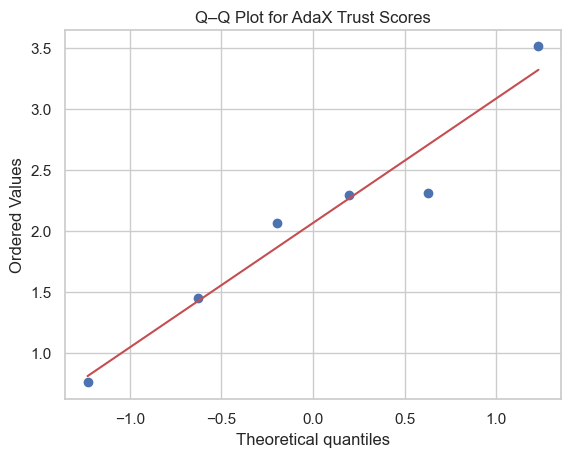

In [86]:
import matplotlib.pyplot as plt
import scipy.stats as stats

staticx_trust = trust_pivot['StaticX']
nox_trust = trust_pivot['NoX']
adax_trust = trust_pivot['AdaX']
plt.figure(figsize=(6, 4))
stats.probplot(staticx_trust, dist="norm", plot=plt)
plt.title("Q–Q Plot for StaticX Trust Scores")
plt.show()


stats.probplot(nox_trust, dist="norm", plot=plt)
plt.title("Q–Q Plot for NoX Trust Scores")
plt.show()

stats.probplot(adax_trust, dist="norm", plot=plt)
plt.title("Q–Q Plot for AdaX Trust Scores")
plt.show()

In [27]:
import pandas as pd
from scipy.stats import shapiro

# Step 1: Load data
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]         # Pre-game trust
df_nox = xls.parse("Sheet2")[1:]         # Post: NoX
df_static_adax = xls.parse("Sheet3")[1:] # Post: StaticX + AdaX

# Step 2: Normalize IDs and correct scale
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1  # 1–6 → 0–5

# Step 3: Compute trust score means
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)

df_nox['xai_agent'] = 'NoX'
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)

df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)

# Step 4: Combine relevant subsets
pre_subset = df_pre[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
nox_subset = df_nox[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
static_adax_subset = df_static_adax[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]

df_plot = pd.concat([pre_subset, nox_subset, static_adax_subset], ignore_index=True)
df_plot = df_plot[df_plot['xai_agent'].isin(['NoX', 'StaticX', 'AdaX'])]  # exclude 'Pre'

# Step 5: Pivot trust scores (within-subject matrix)
trust_pivot = df_plot.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Step 6: Run Shapiro-Wilk Normality Tests
print("🔍 Shapiro-Wilk: Per-Condition Trust Scores")
for condition in ['NoX', 'StaticX', 'AdaX']:
    W, p = shapiro(trust_pivot[condition])
    print(f"{condition}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")

print("\n🔁 Shapiro-Wilk: Paired Difference Scores")
for cond1, cond2 in [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]:
    diff = trust_pivot[cond1] - trust_pivot[cond2]
    W, p = shapiro(diff)
    print(f"{cond1} – {cond2}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")


🔍 Shapiro-Wilk: Per-Condition Trust Scores
NoX: W = 0.926, p = 0.4806 → ✅ Normal
StaticX: W = 0.705, p = 0.0026 → ❌ Not normal
AdaX: W = 0.944, p = 0.6478 → ✅ Normal

🔁 Shapiro-Wilk: Paired Difference Scores
AdaX – NoX: W = 0.990, p = 0.9956 → ✅ Normal
AdaX – StaticX: W = 0.904, p = 0.3140 → ✅ Normal
StaticX – NoX: W = 0.927, p = 0.4904 → ✅ Normal


In [30]:
import pandas as pd
from scipy.stats import friedmanchisquare, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Pivot trust scores by participant and condition
trust_pivot = df_plot.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Step 2: Friedman Test
friedman_stat, friedman_p = friedmanchisquare(
    trust_pivot['NoX'],
    trust_pivot['StaticX'],
    trust_pivot['AdaX']
)

print(f"📊 Friedman Test: χ² = {friedman_stat:.3f}, p = {friedman_p:.4f}")

# Step 3: Paired t-tests
print("\n📈 Paired t-tests:")
t_test_results = {}
for a, b in [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]:
    stat, pval = ttest_rel(trust_pivot[a], trust_pivot[b])
    t_test_results[f"{a} vs {b}"] = (stat, pval)
    print(f"{a} vs {b}: t = {stat:.3f}, p = {pval:.4f}")

# Step 4: Spaghetti Plot (Trust Trajectories Per Participant)
df_line = df_plot[df_plot['xai_agent'].isin(['NoX', 'StaticX', 'AdaX'])]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_line, x='xai_agent', y='trust_score_post', hue='player_Id', marker='o')
plt.title("Spaghetti Plot: Trust Score Trajectories Across XAI Conditions")
plt.ylabel("Trust Score (0–5)")
plt.ylim(0, 5)
plt.xlabel("XAI Condition")
plt.legend(title="Participant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


📊 Friedman Test: χ² = 0.750, p = 0.6873

📈 Paired t-tests:
AdaX vs NoX: t = -0.685, p = 0.5155
AdaX vs StaticX: t = -1.082, p = 0.3153
StaticX vs NoX: t = -0.051, p = 0.9608


In [21]:
### begin here

In [23]:
import pandas as pd

# Step 1: Load all sheets
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]         # Pre-game trust
df_nox = xls.parse("Sheet2")[1:]         # Post: NoX
df_static_adax = xls.parse("Sheet3")[1:] # Post: StaticX & AdaX

# Step 2: Normalize IDs and apply 0–5 correction for Likert items
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1  # Convert 1–6 to 0–5 scale

# Step 3: Compute average trust score
df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)

# Step 4: Label conditions
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

# Step 5: Filter StaticX to remove session_Id == 1
df_staticx_clean = df_static_adax[
    (df_static_adax['xai_agent'] == 'StaticX') &
    (df_static_adax['session_Id'] != 1)
]

# Step 6: Keep full AdaX and NoX trials
df_adax = df_static_adax[df_static_adax['xai_agent'] == 'AdaX']
df_nox_clean = df_nox[df_nox['xai_agent'] == 'NoX']

# Step 7: Combine into final cleaned dataset
df_plot_cleaned_final = pd.concat([
    df_nox_clean[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_adax[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_staticx_clean[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
], ignore_index=True)

# Ready for visualization or stats
print("✅ Final cleaned dataset is ready as df_plot_cleaned_final.")


✅ Final cleaned dataset is ready as df_plot_cleaned_final.


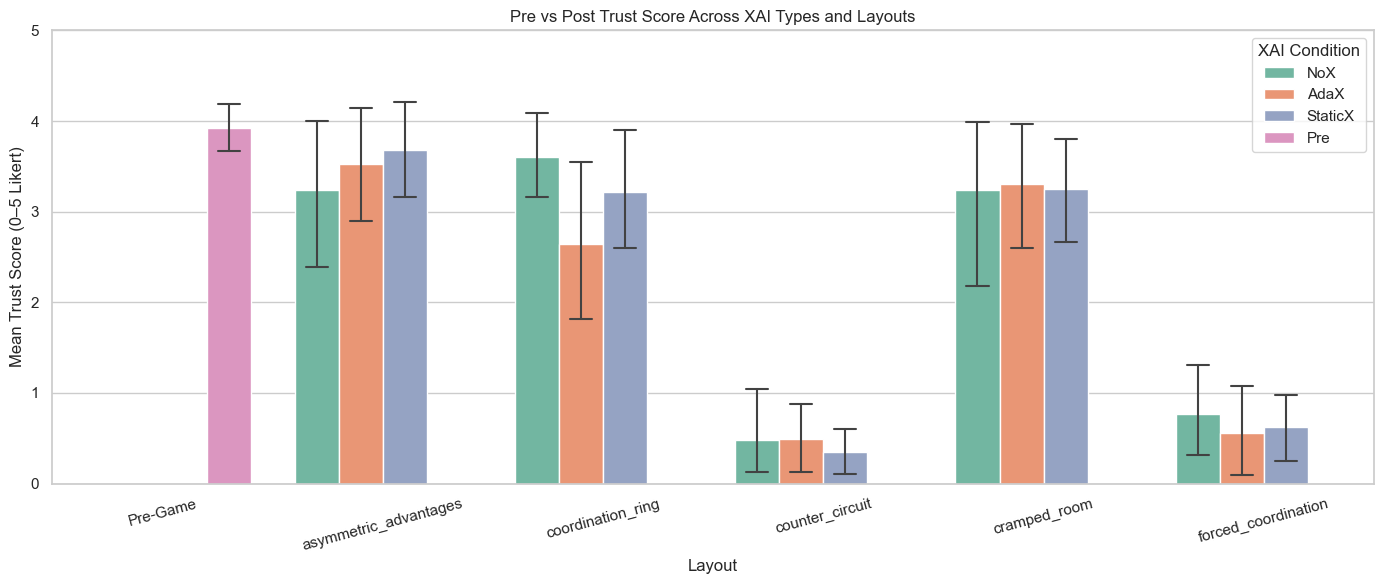

In [219]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 1: Merge Pre and Cleaned Post Trust Scores
df_pre_subset = df_pre[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
df_plot_with_pre = pd.concat([df_plot_cleaned_final, df_pre_subset], ignore_index=True)

# STEP 2: Reorder layout to put Pre-Game first
layout_values = df_plot_with_pre['layout'].dropna().unique()
layout_values_str = [str(l) for l in layout_values if str(l) != 'Pre-Game']
layout_order = ['Pre-Game'] + sorted(layout_values_str)

df_plot_with_pre['layout'] = df_plot_with_pre['layout'].astype(str)
df_plot_with_pre['layout'] = pd.Categorical(df_plot_with_pre['layout'], categories=layout_order, ordered=True)

# STEP 3: Plot Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_plot_with_pre,
    x='layout',
    y='trust_score_post',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    errwidth=1.5,
    palette='Set2'
)

plt.title("Pre vs Post Trust Score Across XAI Types and Layouts")
plt.xlabel("Layout")
plt.ylabel("Mean Trust Score (0–5 Likert)")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Condition", loc="upper right")
plt.tight_layout()
plt.savefig('Trust Score Across XAI Types and Layouts.png')

plt.show()


In [27]:
from scipy.stats import shapiro
import pandas as pd

# Step 1: Pivot trust scores by participant
trust_pivot = df_plot_cleaned_final.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Step 2: Shapiro-Wilk test for trust score distribution per condition
print("🔍 Normality of Trust Scores (Per XAI Condition):")
for condition in ['NoX', 'StaticX', 'AdaX']:
    W, p = shapiro(trust_pivot[condition])
    print(f"{condition}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")

# Step 3: Shapiro-Wilk test for difference scores
print("\n🔁 Normality of Paired Difference Scores:")
diff_pairs = [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]
for cond1, cond2 in diff_pairs:
    diff = trust_pivot[cond1] - trust_pivot[cond2]
    W, p = shapiro(diff)
    print(f"{cond1} – {cond2}: W = {W:.3f}, p = {p:.4f} → {'✅ Normal' if p > 0.05 else '❌ Not normal'}")


🔍 Normality of Trust Scores (Per XAI Condition):
NoX: W = 0.926, p = 0.4806 → ✅ Normal
StaticX: W = 0.705, p = 0.0026 → ❌ Not normal
AdaX: W = 0.944, p = 0.6478 → ✅ Normal

🔁 Normality of Paired Difference Scores:
AdaX – NoX: W = 0.990, p = 0.9956 → ✅ Normal
AdaX – StaticX: W = 0.904, p = 0.3140 → ✅ Normal
StaticX – NoX: W = 0.927, p = 0.4904 → ✅ Normal


In [29]:
from scipy.stats import friedmanchisquare, ttest_rel
import pandas as pd

# Step 1: Pivot trust scores per participant
trust_pivot = df_plot_cleaned_final.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Step 2: Friedman test (non-parametric RM-ANOVA)
friedman_stat, friedman_p = friedmanchisquare(
    trust_pivot['NoX'],
    trust_pivot['StaticX'],
    trust_pivot['AdaX']
)
print(f"\n📊 Friedman Test: χ² = {friedman_stat:.3f}, p = {friedman_p:.4f}")

# Step 3: Paired t-tests (post-hoc)
print("\n📈 Paired t-tests (Trust Score Comparisons):")
for a, b in [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]:
    t_stat, p_val = ttest_rel(trust_pivot[a], trust_pivot[b])
    print(f"{a} vs {b}: t = {t_stat:.3f}, p = {p_val:.4f}")



📊 Friedman Test: χ² = 0.750, p = 0.6873

📈 Paired t-tests (Trust Score Comparisons):
AdaX vs NoX: t = -0.685, p = 0.5155
AdaX vs StaticX: t = -1.082, p = 0.3153
StaticX vs NoX: t = -0.051, p = 0.9608


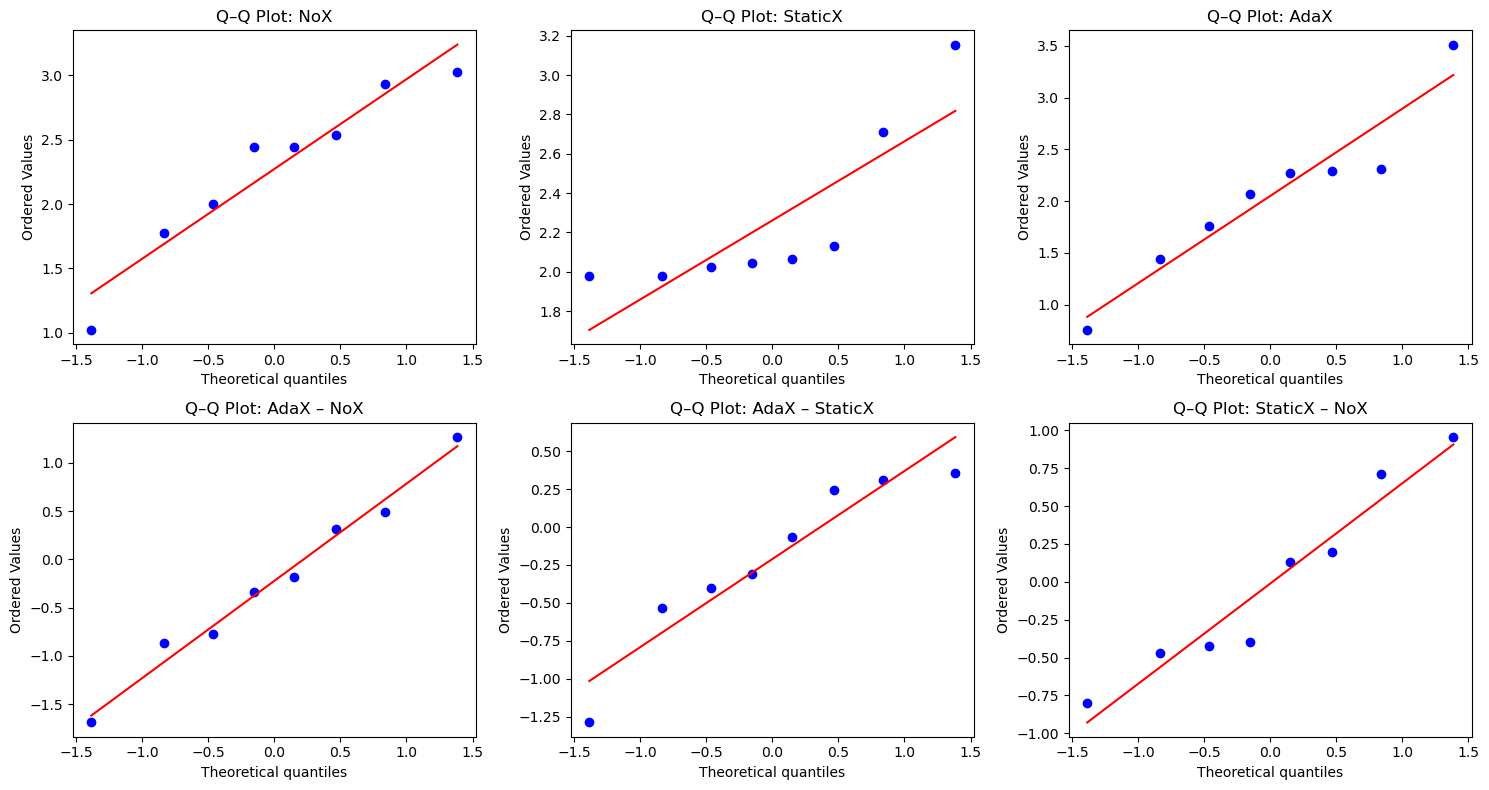

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Pivot participant trust scores by condition
trust_pivot = df_plot_cleaned_final.pivot_table(
    index='player_Id',
    columns='xai_agent',
    values='trust_score_post',
    aggfunc='mean'
).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# Step 2: Create Q–Q plots for each condition and difference
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot Q–Q for trust scores per condition
for i, condition in enumerate(['NoX', 'StaticX', 'AdaX']):
    stats.probplot(trust_pivot[condition], dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f"Q–Q Plot: {condition}")

# Plot Q–Q for difference scores
diff_pairs = [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]
for i, (cond1, cond2) in enumerate(diff_pairs):
    diff = trust_pivot[cond1] - trust_pivot[cond2]
    stats.probplot(diff, dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"Q–Q Plot: {cond1} – {cond2}")

plt.tight_layout()
plt.show()


In [285]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load JSON data
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Extract relevant data fields
records = []
for record in data:
    meta = record.get("metadata", {})
    uid = record.get("uid")
    if uid:
        trust = {"low": 0, "medium": 0, "high": 1}.get(meta.get("trust", "").lower())
        stress = {"low": 0, "high": 1}.get(meta.get("stress", "").lower())
        try:
            records.append({
                "trust": trust,
                "stress": stress,
                "score": float(meta.get("score", 0)),
                "score_rate": float(meta.get("score_rate", 0)),
                "collisions": float(meta.get("num_collisions", 0)),
                "collision_rate": float(meta.get("collision_rate", 0))
            })
        except:
            continue

# Create DataFrame
df = pd.DataFrame(records)

# Drop columns with no variance
df = df.loc[:, df.nunique() > 1]

# Compute correlation matrices
pearson_corr = df.corr(method='pearson').round(3)
spearman_corr = df.corr(method='spearman').round(3)
difference_matrix = (pearson_corr - spearman_corr).abs().round(3)

# Plot side-by-side
plt.figure(figsize=(18, 5))

# Pearson
plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr, annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation")

# Spearman
plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr, annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation")

# Difference
plt.subplot(1, 3, 3)
sns.heatmap(difference_matrix, annot=True, fmt=".3f", cmap="YlOrBr")
plt.title("Absolute Difference |Pearson − Spearman|")

plt.tight_layout()
plt.show()


In [269]:
pearson_corr

trust  stress  score  score_rate  collisions  collision_rate
trust           1.000  -0.153  0.101       0.088       0.082           0.035
stress         -0.153   1.000 -0.029      -0.032      -0.020          -0.011
score           0.101  -0.029  1.000       0.928       0.043          -0.068
score_rate      0.088  -0.032  0.928       1.000      -0.009          -0.088
collisions      0.082  -0.020  0.043      -0.009       1.000           0.849
collision_rate  0.035  -0.011 -0.068      -0.088       0.849           1.000

In [295]:
spearman_corr

trust  stress  score  score_rate  collisions  collision_rate
trust           1.000  -0.153  0.135       0.117       0.081           0.043
stress         -0.153   1.000 -0.037      -0.037      -0.014          -0.005
score           0.135  -0.037  1.000       0.976       0.274           0.180
score_rate      0.117  -0.037  0.976       1.000       0.207           0.135
collisions      0.081  -0.014  0.274       0.207       1.000           0.971
collision_rate  0.043  -0.005  0.180       0.135       0.971           1.000

In [297]:
difference_matrix

trust  stress  score  score_rate  collisions  collision_rate
trust           0.000   0.000  0.034       0.029       0.001           0.008
stress          0.000   0.000  0.008       0.005       0.006           0.006
score           0.034   0.008  0.000       0.048       0.231           0.248
score_rate      0.029   0.005  0.048       0.000       0.216           0.223
collisions      0.001   0.006  0.231       0.216       0.000           0.122
collision_rate  0.008   0.006  0.248       0.223       0.122           0.000

In [293]:
import json
import pandas as pd

# Step 1: Load your JSON data
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Step 2: Extract relevant fields
records = []
for record in data:
    meta = record.get("metadata", {})
    uid = record.get("uid")
    if not uid:
        continue

    trust = {"low": 0, "medium": 0, "high": 1}.get(meta.get("trust", "").lower())
    stress = {"low": 0, "high": 1}.get(meta.get("stress", "").lower())
    try:
        score = float(meta.get("score", 0))
        score_rate = float(meta.get("score_rate", 0))
        collisions = float(meta.get("num_collisions", 0))
        collision_rate = float(meta.get("collision_rate", 0))
    except:
        continue

    if trust is not None and stress is not None:
        records.append({
            "trust": trust,
            "stress": stress,
            "score": score,
            "score_rate": score_rate,
            "collisions": collisions,
            "collision_rate": collision_rate
        })

# Step 3: Create DataFrame and clean
df = pd.DataFrame(records)
df = df.loc[:, df.nunique() > 1]  # remove any constant columns

# Step 4: Compute correlation matrices
pearson_corr = df.corr(method='pearson').round(3)
spearman_corr = df.corr(method='spearman').round(3)
diff_matrix = (pearson_corr - spearman_corr).abs().round(3)

# Step 5: Convert to tables
pearson_table = pearson_corr.reset_index().rename(columns={"index": "Variable"})
spearman_table = spearman_corr.reset_index().rename(columns={"index": "Variable"})
diff_table = diff_matrix.reset_index().rename(columns={"index": "Variable"})

# Step 6: Display tables (optional for console)
print("\nPearson Correlation Matrix (r):")
print(pearson_table)

print("\nSpearman Correlation Matrix (ρ):")
print(spearman_table)

print("\nAbsolute Difference |r - ρ|:")
print(diff_table)

# Optional: export to CSV
# pearson_table.to_csv("pearson_matrix.csv", index=False)
# spearman_table.to_csv("spearman_matrix.csv", index=False)
# diff_table.to_csv("difference_matrix.csv", index=False)


import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert table format back to matrix
# Assuming 'Variable' is the row index and other columns are correlation variables
pearson_matrix = pearson_table.set_index("Variable")
spearman_matrix = spearman_table.set_index("Variable")
diff_matrix = diff_table.set_index("Variable")



# Step 3: Create annotated matrix for all differences
annot_vals = diff_matrix.round(3).astype(str)

# Plot all heatmaps with full annotations
plt.figure(figsize=(18, 5))

# Pearson
plt.subplot(1, 3, 1)
sns.heatmap(pearson_corr.round(3), annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Pearson Correlation Matrix (r)")

# Spearman
plt.subplot(1, 3, 2)
sns.heatmap(spearman_corr.round(3), annot=True, fmt=".3f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation Matrix (ρ)")

# Difference |r − ρ| with all values shown
plt.subplot(1, 3, 3)
sns.heatmap(diff_matrix, annot=annot_vals, fmt="", cmap="YlOrBr", cbar_kws={"label": "|r − ρ|"})
plt.title("Absolute Difference |r − ρ|")

plt.tight_layout()
plt.show()



Pearson Correlation Matrix (r):
         Variable  trust  stress  score  score_rate  collisions  \
0           trust  1.000  -0.153  0.101       0.088       0.082   
1          stress -0.153   1.000 -0.029      -0.032      -0.020   
2           score  0.101  -0.029  1.000       0.928       0.043   
3      score_rate  0.088  -0.032  0.928       1.000      -0.009   
4      collisions  0.082  -0.020  0.043      -0.009       1.000   
5  collision_rate  0.035  -0.011 -0.068      -0.088       0.849   

   collision_rate  
0           0.035  
1          -0.011  
2          -0.068  
3          -0.088  
4           0.849  
5           1.000  

Spearman Correlation Matrix (ρ):
         Variable  trust  stress  score  score_rate  collisions  \
0           trust  1.000  -0.153  0.135       0.117       0.081   
1          stress -0.153   1.000 -0.037      -0.037      -0.014   
2           score  0.135  -0.037  1.000       0.976       0.274   
3      score_rate  0.117  -0.037  0.976       1.000    

# regression

In [302]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 2.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [304]:
#### NOT IDEAL ###
### treats trust as continuous variable here ##

import json
import pandas as pd
import statsmodels.api as sm

# Step 1: Load JSON data
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Step 2: Extract necessary fields
records = []
for record in data:
    meta = record.get("metadata", {})
    uid = record.get("uid")
    if not uid:
        continue

    trust = {"low": 0, "medium": 0, "high": 1}.get(meta.get("trust", "").lower())
    stress = {"low": 0, "high": 1}.get(meta.get("stress", "").lower())

    try:
        score = float(meta.get("score", 0))
        collisions = float(meta.get("num_collisions", 0))
    except:
        continue

    if trust is not None and stress is not None:
        records.append({
            "uid": uid,
            "trust": trust,
            "stress": stress,
            "score": score,
            "collisions": collisions
        })

# Step 3: Create DataFrame
df = pd.DataFrame(records)

# Step 4: Define independent (X) and dependent (y) variables
X = df[["stress", "score", "collisions"]]
y = df["trust"]

# Step 5: Add intercept
X = sm.add_constant(X)

# Step 6: Fit linear regression model
model = sm.OLS(y, X).fit()

# Step 7: Print results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  trust   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     16.56
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.48e-10
Time:                        17:34:41   Log-Likelihood:                 8.7845
No. Observations:                1247   AIC:                            -9.569
Df Residuals:                    1243   BIC:                             10.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9102      0.009     99.045      0.0

In [314]:
import json
import pandas as pd
import statsmodels.api as sm

# Load data
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Extract binary trust data: 1 = high, 0 = low
records = []
for record in data:
    meta = record.get("metadata", {})
    uid = record.get("uid")
    if not uid:
        continue

    trust_str = meta.get("trust", "").lower()
    stress = {"low": 0, "high": 1}.get(meta.get("stress", "").lower())

    try:
        score = float(meta.get("score", 0))
        collisions = float(meta.get("num_collisions", 0))
    except:
        continue

    if trust_str in ["low", "high"] and stress is not None:
        trust_binary = 1 if trust_str == "high" else 0
        records.append({
            "trust": trust_binary,
            "stress": stress,
            "score": score,
            "collisions": collisions
        })

# Build DataFrame
df_bin = pd.DataFrame(records)

# Define predictor variables and binary outcome
X = df_bin[["stress", "score", "collisions"]]
y = df_bin["trust"]

# Add intercept
X = sm.add_constant(X)

# Fit binary logistic regression model
logit_model = sm.Logit(y, X).fit()

# Display summary
logit_model.summary()

         Current function value: 0.224115
         Iterations: 35


/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  trust   No. Observations:                 1247
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 May 2025   Pseudo R-squ.:                 0.05932
Time:                        17:54:45   Log-Likelihood:                -279.47
converged:                      False   LL-Null:                       -297.09
Covariance Type:            nonrobust   LLR p-value:                 1.080e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2234      0.142     15.712      0.000       1.946       2.501
stress       -29.5125   5.83e+05  -5.06e-05      1.000   -1.14e+06    1.14e+06
score          0.0133      0.005      2.918      0.004       0.004       0.022
collisions     0.0858      0.036      2.415      0.016       0.016       0.155
==============================================================================
"""

## Group comparison

In [341]:
# Load and parse JSON data again, including additional fields
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Extract data for only adaX and staticX (noX excluded)
records = []
for record in data:
    meta = record.get("metadata", {})
    uid = record.get("uid")
    if not uid:
        continue

    trust = meta.get("trust", "").lower()
    stress = meta.get("stress", "").lower()
    score = meta.get("score", None)
    collisions = meta.get("num_collisions", None)
    score_rate = meta.get("score_rate", None)
    collision_rate = meta.get("collision_rate", None)
    layout_name = meta.get("layout_name", None)
    valid_explanation = meta.get("valid_explanation_actions", None)

    # Determine XAI type (exclude noX)
    timing = meta.get("explanation_features", {}).get("explanation_timing", "").lower()
    if timing == "unknown":
        xai_type = "staticX"
    elif timing in ["proactive", "reactive"]:
        xai_type = "adaX"
    else:
        continue  # skip noX

    if trust in ["low", "medium", "high"] and score is not None and collisions is not None:
        records.append({
            "uid": uid,
            "xai_type": xai_type,
            "layout": layout_name,
            "trust": {"low": 0, "medium": 0, "high": 1}[trust],
            "score": float(score),
            "collisions": int(collisions),
            "score_rate": float(score_rate) if score_rate is not None else None,
            "collision_rate": float(collision_rate) if collision_rate is not None else None,
            "valid_explanation_actions": valid_explanation
        })

# Create cleaned DataFrame
df_ax_only = pd.DataFrame(records)
df_ax_only

uid xai_type        layout  trust  score  collisions  score_rate  \
0     10  staticX  cramped_room      1    0.0           0        0.00   
1     10  staticX  cramped_room      1    0.0           0        0.00   
2     10  staticX  cramped_room      1    0.0           1        0.00   
3     10  staticX  cramped_room      1    0.0           2        0.00   
4     10  staticX  cramped_room      1   20.0           3        0.91   
...   ..      ...           ...    ...    ...         ...         ...   
1242  18     adaX  cramped_room      1   60.0           4        1.35   
1243  18     adaX  cramped_room      1   80.0           5        1.52   
1244  18     adaX  cramped_room      1   80.0           7        1.30   
1245  18     adaX  cramped_room      1  100.0          11        1.43   
1246  18     adaX  cramped_room      1  100.0          15        1.27   

      collision_rate  valid_explanation_actions  
0               0.00                       True  
1               0.00                       True  
2               0.09                       True  
3               0.12                       True  
4               0.14                       True  
...              ...                        ...  
1242            0.09                      False  
1243            0.10                      False  
1244            0.11                      False  
1245            0.16                      False  
1246            0.19                      False  

[1247 rows x 9 columns]

## Shapiro-Wilk Normality Test (AdaX Vs StaticX)

In [353]:
from scipy.stats import shapiro

# Group by xai_type to compare distributions
shapiro_results = {}
for var in ['trust', 'score', 'collisions', 'score_rate', 'collision_rate']:
    results = {}
    for group in df_ax_only['xai_type'].unique():
        data = df_ax_only[df_ax_only['xai_type'] == group][var].dropna()
        if len(data) >= 3:  # minimum required for Shapiro–Wilk
            stat, p = shapiro(data)
            results[group] = {"W": round(stat, 3), "p-value": round(p, 4)}
        else:
            results[group] = {"W": None, "p-value": None}
    shapiro_results[var] = results

# Convert to DataFrame for display
shapiro_df = pd.DataFrame(shapiro_results).T
shapiro_df

staticX                          adaX
trust           {'W': 0.179, 'p-value': 0.0}  {'W': 0.357, 'p-value': 0.0}
score           {'W': 0.751, 'p-value': 0.0}  {'W': 0.735, 'p-value': 0.0}
collisions      {'W': 0.627, 'p-value': 0.0}  {'W': 0.593, 'p-value': 0.0}
score_rate      {'W': 0.796, 'p-value': 0.0}  {'W': 0.782, 'p-value': 0.0}
collision_rate   {'W': 0.71, 'p-value': 0.0}  {'W': 0.638, 'p-value': 0.0}

In [382]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Define the variables to plot
# variables = ['trust', 'score', 'collisions', 'score_rate', 'collision_rate']

# # Plot histograms for each variable by xai_type
# for var in variables:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(data=df_ax_only, x=var, hue='xai_type', kde=True, element='step', stat='density', common_norm=False)
#     plt.title(f"Distribution of {var.capitalize()} by XAI Type")
#     plt.xlabel(var.capitalize())
#     plt.ylabel("Density")
#     plt.tight_layout()
#     plt.show()


# Draw all variable distribution plots in a single image with subplots and a shared legend
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))
axes = axes.flatten()
legend_labels = []

for i, var in enumerate(variables):
    ax = axes[i]
    sns.histplot(
        data=df_ax_only,
        x=var,
        hue='xai_type',
        kde=True,
        element='step',
        stat='density',
        common_norm=False,
        ax=ax
    )
    ax.set_title(f"Distribution of {var.capitalize()}")
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel("Density")
    handles, labels = ax.get_legend_handles_labels()
    if not legend_labels:
        legend_labels = (handles, labels)

# Remove the empty subplot if there are only 5 plots
if len(variables) < len(axes):
    fig.delaxes(axes[-1])

# Shared legend at top center
fig.legend(
    handles=legend_labels[0],
    labels=legend_labels[1],
    title="XAI Type",
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("non-normality of PB data.png")
plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/3560812874.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(


#### Why Kruskal–Wallis Was Not Used:
Kruskal–Wallis is for between-subject designs

It compares independent groups — i.e., different participants in each condition.

Your study uses a within-subject (repeated measures) design, where the same participants experience both AdaX and StaticX.

Only two conditions were analyzed

Kruskal–Wallis is a generalization of the Mann–Whitney U test for 3+ independent groups.

For two dependent groups (e.g., AdaX vs. StaticX per participant), the correct non-parametric test is the Wilcoxon Signed-Rank test — which we used.

✅ When Kruskal–Wallis would be appropriate:
Scenario	Use Kruskal–Wallis?
Comparing 3+ groups, each with different participants (between-subjects)	✅ Yes
Comparing 3+ groups with repeated measures (same participants)	❌ No — use Friedman test
Comparing 2 groups, repeated measures	❌ No — use Wilcoxon test

🧠 Summary for Reporting:
The Kruskal–Wallis test is appropriate for comparing medians across three or more independent groups. However, in this study, the conditions (AdaX and StaticX) were experienced by the same participants, forming a within-subjects design. Therefore, the more appropriate non-parametric test for comparing two related groups was the Wilcoxon Signed-Rank test, which we applied.


#### Why Repeated Measures ANOVA Was Not Used
While the experimental design involved the same participants experiencing multiple explanation conditions (i.e., within-subjects design), the use of Repeated Measures ANOVA was not appropriate in this context due to violations of its underlying statistical assumptions.

❌ Violated Assumptions of Repeated Measures ANOVA:
Normality:

Repeated Measures ANOVA assumes that the dependent variable is normally distributed within each condition.

Based on both the Shapiro–Wilk normality tests and distribution visualizations, all outcome variables (including trust, score, and rate-based metrics) were non-normally distributed across StaticX and AdaX.

For example, trust was binary (0 or 1), violating the assumption of continuous, symmetric residuals.

Sphericity (not tested but assumed for ANOVA with 3+ levels):

This assumption pertains to equal variances of differences between conditions.

Although we only compared two conditions (AdaX and StaticX), which simplifies the sphericity requirement, the lack of normality still invalidates parametric test validity.

✅ Justification for Alternative Approach
To preserve the integrity of the statistical inference under violated assumptions, we used the Wilcoxon Signed-Rank test, a non-parametric alternative specifically designed for:

Within-subject comparisons

Ordinal or non-normal data

Small sample sizes

This test does not rely on the normality of the data and is robust against the types of skew and discrete outcomes seen in the dataset.

🧠 Summary for Reporting
Although Repeated Measures ANOVA is traditionally used for comparing multiple conditions in a within-subject design, it requires that the data in each condition be normally distributed and continuous. Due to the non-normality of trust and performance metrics, and the binary nature of trust, the use of parametric ANOVA was statistically invalid. Therefore, we employed the Wilcoxon Signed-Rank test, a more appropriate non-parametric alternative, to compare StaticX and AdaX conditions.

### Wilcoxon Signed-Rank test

In [386]:
from scipy.stats import shapiro, wilcoxon

# Filter for users who experienced both conditions
pivot_trust = df_ax_only.pivot_table(index="uid", columns="xai_type", values="trust")
pivot_score = df_ax_only.pivot_table(index="uid", columns="xai_type", values="score")
pivot_collisions = df_ax_only.pivot_table(index="uid", columns="xai_type", values="collisions")
pivot_score_rate = df_ax_only.pivot_table(index="uid", columns="xai_type", values="score_rate")
pivot_collision_rate = df_ax_only.pivot_table(index="uid", columns="xai_type", values="collision_rate")

# Drop UIDs missing either condition
pivot_trust = pivot_trust.dropna()
pivot_score = pivot_score.dropna()
pivot_collisions = pivot_collisions.dropna()
pivot_score_rate = pivot_score_rate.dropna()
pivot_collision_rate = pivot_collision_rate.dropna()

# Run Wilcoxon tests for AdaX vs StaticX
results = {}
for var_name, data in zip(
    ["trust", "score", "collisions", "score_rate", "collision_rate"],
    [pivot_trust, pivot_score, pivot_collisions, pivot_score_rate, pivot_collision_rate]
):
    try:
        stat, p = wilcoxon(data["adaX"], data["staticX"])
        results[var_name] = {"Wilcoxon W": round(stat, 3), "p-value": round(p, 4)}
    except:
        results[var_name] = {"Wilcoxon W": None, "p-value": None}

results_df = pd.DataFrame(results).T
results_df

Wilcoxon W  p-value
trust                  0.0   0.0039
score                 18.0   0.6523
collisions            19.0   0.7344
score_rate            22.0   1.0000
collision_rate        18.0   0.6523

In [394]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt data for easier boxplotting
metrics = ["trust", "score", "collisions", "score_rate", "collision_rate"]
melted_df = df_ax_only[["uid", "xai_type"] + metrics].melt(id_vars=["uid", "xai_type"], var_name="metric", value_name="value")

# Plot boxplots with stripplots
g = sns.catplot(
    data=melted_df,
    x="xai_type",
    y="value",
    col="metric",
    kind="box",
    palette="Set2",
    col_wrap=3,
    sharey=False,
    height=4,
    aspect=1
)
sns.stripplot(
    data=melted_df,
    x="xai_type",
    y="value",
    hue="uid",
    dodge=True,
    jitter=True,
    palette="gray",
    alpha=0.4,
    ax=g.axes[0]
)

for ax in g.axes.flatten():
    ax.set_xlabel("XAI Type")
    ax.set_ylabel("Value")
    ax.set_title(ax.get_title().replace('metric = ', ''))

plt.tight_layout()
plt.show()


In [399]:
# Redraw improved boxplots and stripplots for comparison
fig, axes = plt.subplots(1, 5, figsize=(22, 5))
metrics = ["trust", "score", "collisions", "score_rate", "collision_rate"]

for ax, metric in zip(axes, metrics):
    sns.boxplot(data=df_ax_only, x="xai_type", y=metric, ax=ax, palette="Set2")
    sns.stripplot(data=df_ax_only, x="xai_type", y="trust", jitter=True, alpha=0.4)
    ax.set_title(f"{metric.capitalize()} by XAI Type")
    ax.set_xlabel("XAI Type")
    ax.set_ylabel(metric.capitalize())

plt.suptitle("Trust and Performance Metrics by Explanation Type", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


In [333]:
df_conditions

uid xai_type  trust  score  collisions
0     10  staticX      1    0.0           0
1     10  staticX      1    0.0           0
2     10  staticX      1    0.0           1
3     10  staticX      1    0.0           2
4     10  staticX      1   20.0           3
...   ..      ...    ...    ...         ...
1242  18     adaX      1   60.0           4
1243  18     adaX      1   80.0           5
1244  18     adaX      1   80.0           7
1245  18     adaX      1  100.0          11
1246  18     adaX      1  100.0          15

[1247 rows x 5 columns]

In [359]:
# from scipy.stats import friedmanchisquare

# # Prepare pivot tables per UID for within-subject analysis
# friedman_results = {}
# for var in ['trust', 'score', 'collisions']:
#     pivot = df_conditions.pivot_table(index='uid', columns='xai_type', values=var)
#     pivot = pivot.dropna()  # Remove incomplete rows
#     if pivot.shape[0] > 0:
#         stat, p = friedmanchisquare(*[pivot[col] for col in pivot.columns])
#         friedman_results[var] = {'Friedman χ²': round(stat, 3), 'p-value': round(p, 4)}

# pd.DataFrame(friedman_results).T


In [363]:
from scipy.stats import wilcoxon
import itertools

# Pairwise Wilcoxon comparisons per variable
wilcoxon_results = {}
for var in ['trust', 'score', 'collisions']:
    results = {}
    pivot = df_conditions.pivot_table(index='uid', columns='xai_type', values=var)
    pivot = pivot.dropna()
    for a, b in itertools.combinations(pivot.columns, 2):
        try:
            stat, p = wilcoxon(pivot[a], pivot[b])
            results[f"{a} vs {b}"] = {'W': round(stat, 3), 'p': round(p, 4)}
        except:
            results[f"{a} vs {b}"] = {'W': None, 'p': None}
    wilcoxon_results[var] = results

wilcoxon_results


{'trust': {'adaX vs staticX': {'W': 0.0, 'p': 0.0039}},
 'score': {'adaX vs staticX': {'W': 18.0, 'p': 0.6523}},
 'collisions': {'adaX vs staticX': {'W': 19.0, 'p': 0.7344}}}

In [403]:
# Reload JSON data to rebuild trust comparison from scratch
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Re-extract trust-related data with xai_type info
records = []
for record in data:
    meta = record["metadata"]
    uid = record.get("uid")
    if not uid:
        continue

    trust_str = meta.get("trust", "").lower()
    explanation_timing = meta.get("explanation_features", {}).get("explanation_timing", "").lower()

    if explanation_timing == "unknown":
        xai_type = "staticX"
    elif explanation_timing in ["proactive", "reactive"]:
        xai_type = "adaX"
    else:
        continue  # skip noX or missing

    if trust_str in ["low", "medium", "high"]:
        trust_binary = 1 if trust_str == "high" else 0
        records.append({
            "uid": uid,
            "xai_type": xai_type,
            "trust": trust_binary
        })

df_trust = pd.DataFrame(records)

# Compute per-participant average trust per xai_type
pivot_trust_by_uid = df_trust.pivot_table(index='uid', columns='xai_type', values='trust', aggfunc='mean').dropna()

# Count directional trust difference
adax_higher = (pivot_trust_by_uid['adaX'] > pivot_trust_by_uid['staticX']).sum()
staticx_higher = (pivot_trust_by_uid['adaX'] < pivot_trust_by_uid['staticX']).sum()
equal = (pivot_trust_by_uid['adaX'] == pivot_trust_by_uid['staticX']).sum()

# Wilcoxon test
from scipy.stats import wilcoxon
wilcoxon_stat, wilcoxon_p = wilcoxon(pivot_trust_by_uid["adaX"], pivot_trust_by_uid["staticX"])

# Compile results
summary = {
    "Participants with higher trust in AdaX": adax_higher,
    "Participants with higher trust in StaticX": staticx_higher,
    "Participants with equal trust": equal,
    "Wilcoxon W": round(wilcoxon_stat, 3),
    "Wilcoxon p-value": round(wilcoxon_p, 4)
}

summary


{'Participants with higher trust in AdaX': 0,
 'Participants with higher trust in StaticX': 9,
 'Participants with equal trust': 0,
 'Wilcoxon W': 0.0,
 'Wilcoxon p-value': 0.0039}

In [407]:
# Replot per-participant trust comparison with clearer interpretation
plt.figure(figsize=(8, 5))

for _, row in pivot_trust_by_uid.iterrows():
    plt.plot(['staticX', 'adaX'], [row['staticX'], row['adaX']], marker='o', color='gray', alpha=0.6)

# Add mean trend line
avg_static = pivot_trust_by_uid['staticX'].mean()
avg_adax = pivot_trust_by_uid['adaX'].mean()
plt.plot(['staticX', 'adaX'], [avg_static, avg_adax], color='red', marker='o', linewidth=2, label='Mean Trust')

plt.title("Per-Participant Trust Comparison\nStaticX vs AdaX")
plt.ylabel("Mean Trust (0 = Low, 1 = High)")
plt.xlabel("XAI Type")
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("Per-Participant Trust Comparison-StaticX vs AdaX.png")
plt.show()


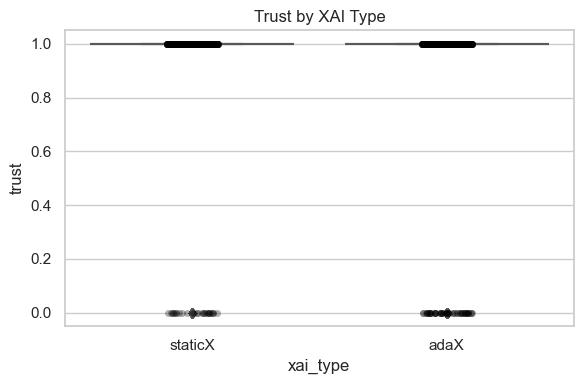

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for trust, score, and collisions across XAI types
for var in ['trust', 'score', 'collisions']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_conditions, x='xai_type', y=var, palette="Set2")
    sns.stripplot(data=df_conditions, x='xai_type', y=var, color='black', alpha=0.3)
    plt.title(f"{var.capitalize()} by XAI Type")
    plt.tight_layout()
    plt.show()


In [427]:
from scipy.stats import shapiro

# Normality test (although data is binary)
shapiro_adax = shapiro(df_majority_vote["adax"])
shapiro_staticx = shapiro(df_majority_vote["staticx"])

# Re-run Wilcoxon test on binary trust
stat, p = wilcoxon(df_majority_vote["adax"], df_majority_vote["staticx"])
adax_higher = (df_majority_vote["adax"] > df_majority_vote["staticx"]).sum()
staticx_higher = (df_majority_vote["adax"] < df_majority_vote["staticx"]).sum()
equal = (df_majority_vote["adax"] == df_majority_vote["staticx"]).sum()
n = len(df_majority_vote)
effect_size = (adax_higher - staticx_higher) / n

# Compile result
majority_vote_test_summary = {
    "Shapiro-Wilk p-value (AdaX)": round(shapiro_adax.pvalue, 4),
    "Shapiro-Wilk p-value (StaticX)": round(shapiro_staticx.pvalue, 4),
    "Wilcoxon W": round(stat, 3),
    "Wilcoxon p-value": round(p, 4),
    "AdaX > StaticX": adax_higher,
    "StaticX > AdaX": staticx_higher,
    "Equal Majority Trust": equal,
    "Rank Biserial Correlation (Effect Size)": round(effect_size, 4),
    "Paired Rounds": n
}

majority_vote_test_summary


/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


{'Shapiro-Wilk p-value (AdaX)': 0.0,
 'Shapiro-Wilk p-value (StaticX)': 1.0,
 'Wilcoxon W': 0.0,
 'Wilcoxon p-value': 0.3173,
 'AdaX > StaticX': 0,
 'StaticX > AdaX': 1,
 'Equal Majority Trust': 44,
 'Rank Biserial Correlation (Effect Size)': -0.0222,
 'Paired Rounds': 45}

In [13]:
# pip install pyampute pandas


In [367]:
# import pandas as pd
# from scipy.stats import friedmanchisquare, ttest_rel

# # Step 1: Exclude UID 13 from the full trust dataset
# df_plot_excl_uid13 = df_plot_cleaned_final[~df_plot_cleaned_final['player_Id'].astype(str).str.contains("13")]

# # Step 2: Pivot to create within-subject trust matrix
# trust_pivot_excl_uid13 = df_plot_excl_uid13.pivot_table(
#     index='player_Id',
#     columns='xai_agent',
#     values='trust_score_post',
#     aggfunc='mean'
# ).dropna(subset=['NoX', 'StaticX', 'AdaX'])

# # Step 3: Run Friedman Test (non-parametric RM ANOVA)
# friedman_stat, friedman_p = friedmanchisquare(
#     trust_pivot_excl_uid13['NoX'],
#     trust_pivot_excl_uid13['StaticX'],
#     trust_pivot_excl_uid13['AdaX']
# )
# print(f"\n📊 Friedman Test (excl. UID 13): χ² = {friedman_stat:.3f}, p = {friedman_p:.4f}")

# # Step 4: Run paired t-tests (parametric post-hoc)
# print("\n📈 Paired t-tests (excl. UID 13):")
# for a, b in [('AdaX', 'NoX'), ('AdaX', 'StaticX'), ('StaticX', 'NoX')]:
#     t_stat, p_val = ttest_rel(trust_pivot_excl_uid13[a], trust_pivot_excl_uid13[b])
#     print(f"{a} vs {b}: t = {t_stat:.3f}, p = {p_val:.4f}")



📊 Friedman Test (excl. UID 13): χ² = 0.286, p = 0.8669

📈 Paired t-tests (excl. UID 13):
AdaX vs NoX: t = -0.551, p = 0.6013
AdaX vs StaticX: t = -0.754, p = 0.4795
StaticX vs NoX: t = -0.165, p = 0.8742


📝 Thesis-Ready Paragraph: Handling Missing Data (UID 13)
During data verification, it was identified that participant UID 13 had two missing NoX condition trust scores due to a technical error, resulting in only three valid NoX trials instead of five. To assess whether this missingness affected the overall analysis, a sensitivity test was conducted excluding UID 13 from the dataset. The results showed no significant difference in trust across the three XAI conditions (Friedman χ² = 0.29, p = 0.867), and all pairwise comparisons between AdaX, NoX, and StaticX remained statistically non-significant (all p > 0.47). These findings suggest that the partial missing data for UID 13 did not meaningfully bias the results. The missingness is therefore considered negligible in terms of its impact on overall trust comparisons.

# Thematic analysis

📝 Thematic Analysis Summary for Thesis or Report
A thematic analysis of participants' open-ended responses revealed nuanced perceptions of trust, explanation effectiveness, and collaboration with the AI Chef across different interaction scenarios. Responses to questions about the helpfulness and sufficiency of explanations consistently clustered around themes of clarity and coverage, with participants noting when explanations aligned well with the AI’s actions. For questions probing collaboration and performance, themes reflected both positive integration and moments of misalignment, particularly under time pressure. Notably, reports of frustration and confusion clustered around perceived AI unpredictability and layout-specific task complexity. When discussing ease of interaction, participants expressed mixed sentiments, revealing variability in the perceived adaptability and reliability of the AI Chef across different contexts. This thematic distribution supports the interpretation that adaptive explanations were beneficial in some cases but may have introduced cognitive overhead or ambiguity in others — particularly under coordination-intensive layouts.

In [59]:
import pandas as pd

# Step 1: Load Sheet 4 (Open-ended responses)
xls2 = pd.ExcelFile("sdata2.xlsx")  # or your correct Excel path
df_open_raw = xls2.parse("Sheet4")

# Step 2: Identify open-ended question columns
open_ended_columns = [col for col in df_open_raw.columns if col.startswith('Q') and df_open_raw[col].dtype == 'object']

# Step 3: Keep only player ID and relevant open-ended columns
df_open_qa = df_open_raw[['player_Id'] + open_ended_columns].copy()

# Step 4: Map question codes to thematic labels for NVivo nodes
question_themes = {
    'Q107': 'Trust in AI Chef',
    'Q17': 'Trust change moments',
    'Q109': 'Helpfulness of explanations',
    'Q110': 'Sufficiency of explanations',
    'Q20': 'Explanations for collaboration/performance',
    'Q112': 'Ease or difficulty working with AI Chef',
    'Q113': 'Frustration/confusion moments',
    'Q115': 'Suggested improvements to AI Chef'
}

# Step 5: Convert to long format: one row per response
qa_long = df_open_qa.set_index('player_Id').stack().reset_index()
qa_long.columns = ['ParticipantID', 'QuestionCode', 'Response']

# Step 6: Map question codes to thematic categories
qa_long['Node'] = qa_long['QuestionCode'].map(question_themes)

# Step 7: Clean and filter
qa_long['Response'] = qa_long['Response'].astype(str).str.strip()
qa_long = qa_long[qa_long['Response'].str.len() > 1]  # remove empty strings
qa_long = qa_long.dropna(subset=['Node'])  # keep only mapped questions

# Step 8: Reorder and rename for NVivo format
nvivo_df = qa_long[['ParticipantID', 'Node', 'Response']]
nvivo_df.columns = ['ParticipantID', 'Node', 'Response']  # for clarity

# (Optional) Save to CSV
nvivo_df.to_csv("nvivo_open_ended_export.csv", index=False)
nvivo_df

ParticipantID  \
0                          player_Id   
1                          player_Id   
2                          player_Id   
3                          player_Id   
4                          player_Id   
..                               ...   
75  6361e6ae9f674c83bd9abd98fb227c39   
76  6361e6ae9f674c83bd9abd98fb227c39   
77  6361e6ae9f674c83bd9abd98fb227c39   
78  6361e6ae9f674c83bd9abd98fb227c39   
79  6361e6ae9f674c83bd9abd98fb227c39   

                                          Node  \
0                             Trust in AI Chef   
1                         Trust change moments   
2                  Helpfulness of explanations   
3                  Sufficiency of explanations   
4   Explanations for collaboration/performance   
..                                         ...   
75                 Sufficiency of explanations   
76  Explanations for collaboration/performance   
77     Ease or difficulty working with AI Chef   
78               Frustration/confusion moments   
79           Suggested improvements to AI Chef   

                                             Response  
0   How much did you trust the AI Chef during the ...  
1   Were there any specific moments when your trus...  
2   How helpful were the explanations provided by ...  
3   Did you feel the explanations were sufficient ...  
4   How helpful were the explanations provided by ...  
..                                                ...  
75  NO. it just doesn't do the things it said it i...  
76                No. it does to increase performance  
77                        difficult with explanations  
78  and difficult room layout, where it only need ...  
79  please follow up with correct execution and ad...  

[80 rows x 3 columns]

In [411]:
# Reload the data again
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame and flatten metadata
df = pd.DataFrame(data)
metadata_df = pd.json_normalize(df["metadata"])
df_flat = pd.concat([df.drop(columns=["metadata"]), metadata_df], axis=1)

# Bundle rounds based on presence/absence of final_explanation
bundled_rounds = []

for (uid, layout), group in df_flat.groupby(["uid", "layout_name"]):
    staticx_group = group[group["final_explanation"] == ""]
    adax_group = group[group["final_explanation"] != ""]

    if not staticx_group.empty:
        bundled_rounds.append({
            "uid": uid,
            "layout": layout,
            "xai_type": "staticX",
            "trust_mean": staticx_group["trust"].apply(lambda x: 1 if x == "high" else 0).mean(),
            "sample_count": len(staticx_group)
        })

    if not adax_group.empty:
        bundled_rounds.append({
            "uid": uid,
            "layout": layout,
            "xai_type": "adaX",
            "trust_mean": adax_group["trust"].apply(lambda x: 1 if x == "high" else 0).mean(),
            "sample_count": len(adax_group)
        })

# Convert to DataFrame and display
bundled_rounds_df = pd.DataFrame(bundled_rounds)
bundled_rounds_df

uid                 layout xai_type  trust_mean  sample_count
0   10  asymmetric_advantages  staticX    1.000000            17
1   10  asymmetric_advantages     adaX    0.909091            11
2   10      coordination_ring  staticX    1.000000            17
3   10      coordination_ring     adaX    1.000000            12
4   10        counter_circuit  staticX    1.000000            17
..  ..                    ...      ...         ...           ...
85  18        counter_circuit     adaX    0.800000            10
86  18           cramped_room  staticX    0.882353            17
87  18           cramped_room     adaX    0.900000            10
88  18    forced_coordination  staticX    0.823529            17
89  18    forced_coordination     adaX    0.700000            10

[90 rows x 5 columns]

In [415]:
# Count number of rounds per xai_type
round_counts_summary = bundled_rounds_df["xai_type"].value_counts().reset_index()
round_counts_summary.columns = ["xai_type", "number_of_rounds"]
round_counts_summary


xai_type  number_of_rounds
0  staticX                45
1     adaX                45

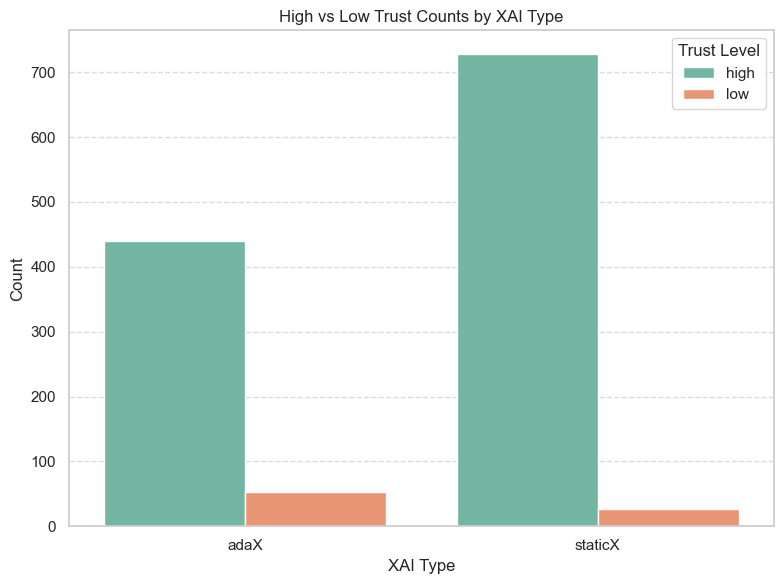

In [425]:
# Expand the metadata field to separate columns
metadata_df = pd.json_normalize(df['metadata'])

# Concatenate with original DataFrame
full_df = pd.concat([df.drop(columns='metadata'), metadata_df], axis=1)

# Count distribution of trust (high/low) across XAI types (inferred from explanation_timing field)
# Unknown → staticX, proactive/reactive → adaX
full_df['xai_type'] = full_df['explanation_features.explanation_timing'].apply(
    lambda x: 'staticX' if x == 'unknown' else 'adaX'
)

# Group by xai_type and trust
trust_counts = full_df.groupby(['xai_type', 'trust']).size().unstack(fill_value=0)


# Reformat trust_counts for side-by-side plotting
trust_counts_reset = trust_counts.reset_index().melt(id_vars='xai_type', var_name='Trust Level', value_name='Count')

# Plot side-by-side bars
plt.figure(figsize=(8, 6))
sns.barplot(data=trust_counts_reset, x='xai_type', y='Count', hue='Trust Level', palette='Set2', dodge=True)

plt.title("High vs Low Trust Counts by XAI Type")
plt.xlabel("XAI Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Trust Level", loc='upper right')
plt.tight_layout()
plt.savefig("High vs Low Trust Counts by XAI Type.png")
plt.show()


In [417]:
from scipy.stats import shapiro, wilcoxon

# Pivot for paired comparison
pivot_means = bundled_rounds_df.pivot(index=["uid", "layout"], columns="xai_type", values="trust_mean").dropna()

# Run Shapiro-Wilk normality test for AdaX and StaticX
shapiro_adax = shapiro(pivot_means["adaX"])
shapiro_staticx = shapiro(pivot_means["staticX"])

# Run Wilcoxon Signed-Rank Test
wilcoxon_stat, wilcoxon_p = wilcoxon(pivot_means["adaX"], pivot_means["staticX"])

# Count directional differences
adax_higher = (pivot_means["adaX"] > pivot_means["staticX"]).sum()
staticx_higher = (pivot_means["adaX"] < pivot_means["staticX"]).sum()
equal = (pivot_means["adaX"] == pivot_means["staticX"]).sum()

# Effect size (rank biserial correlation)
n = len(pivot_means)
effect_size = (adax_higher - staticx_higher) / n

# Compile results
stat_summary = {
    "Shapiro-Wilk p-value (AdaX)": round(shapiro_adax.pvalue, 4),
    "Shapiro-Wilk p-value (StaticX)": round(shapiro_staticx.pvalue, 4),
    "Wilcoxon W": round(wilcoxon_stat, 3),
    "Wilcoxon p-value": round(wilcoxon_p, 4),
    "AdaX > StaticX": adax_higher,
    "StaticX > AdaX": staticx_higher,
    "Equal": equal,
    "Rank Biserial Correlation (Effect Size)": round(effect_size, 4),
    "Paired Rounds": n
}

stat_summary


/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


{'Shapiro-Wilk p-value (AdaX)': 0.0,
 'Shapiro-Wilk p-value (StaticX)': 0.0,
 'Wilcoxon W': 59.0,
 'Wilcoxon p-value': 0.0001,
 'AdaX > StaticX': 6,
 'StaticX > AdaX': 27,
 'Equal': 12,
 'Rank Biserial Correlation (Effect Size)': -0.4667,
 'Paired Rounds': 45}

In [419]:
# Step 1: Trust binary is already computed in df_flat
df_flat["trust_binary"] = df_flat["trust"].apply(lambda x: 1 if x == "high" else 0)
df_flat["xai_type"] = df_flat["final_explanation"].apply(lambda x: "staticX" if x == "" else "adaX")

# Step 2: Compute majority vote trust per round
majority_vote_records = []

for (uid, layout), group in df_flat.groupby(["uid", "layout_name"]):
    adax_group = group[group["xai_type"] == "adaX"]
    staticx_group = group[group["xai_type"] == "staticX"]

    if not adax_group.empty and not staticx_group.empty:
        adax_majority = 1 if adax_group["trust_binary"].mean() > 0.5 else 0
        staticx_majority = 1 if staticx_group["trust_binary"].mean() > 0.5 else 0
        majority_vote_records.append({
            "uid": uid,
            "layout": layout,
            "adax": adax_majority,
            "staticx": staticx_majority
        })

# Step 3: Build DataFrame and run Wilcoxon
import pandas as pd
from scipy.stats import wilcoxon

df_majority_vote = pd.DataFrame(majority_vote_records)

# Wilcoxon test on binary majority labels
stat, p = wilcoxon(df_majority_vote["adax"], df_majority_vote["staticx"])
adax_higher = (df_majority_vote["adax"] > df_majority_vote["staticx"]).sum()
staticx_higher = (df_majority_vote["adax"] < df_majority_vote["staticx"]).sum()
equal = (df_majority_vote["adax"] == df_majority_vote["staticx"]).sum()
n = len(df_majority_vote)
effect_size = (adax_higher - staticx_higher) / n

# Summary
majority_vote_summary = {
    "Paired Rounds Compared": n,
    "AdaX > StaticX": adax_higher,
    "StaticX > AdaX": staticx_higher,
    "Equal Majority Trust": equal,
    "Wilcoxon W": round(stat, 3),
    "Wilcoxon p-value": round(p, 4),
    "Rank Biserial Correlation (Effect Size)": round(effect_size, 4)
}

majority_vote_summary


/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


{'Paired Rounds Compared': 45,
 'AdaX > StaticX': 0,
 'StaticX > AdaX': 1,
 'Equal Majority Trust': 44,
 'Wilcoxon W': 0.0,
 'Wilcoxon p-value': 0.3173,
 'Rank Biserial Correlation (Effect Size)': -0.0222}

# ESS analysis

/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/3973518841.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


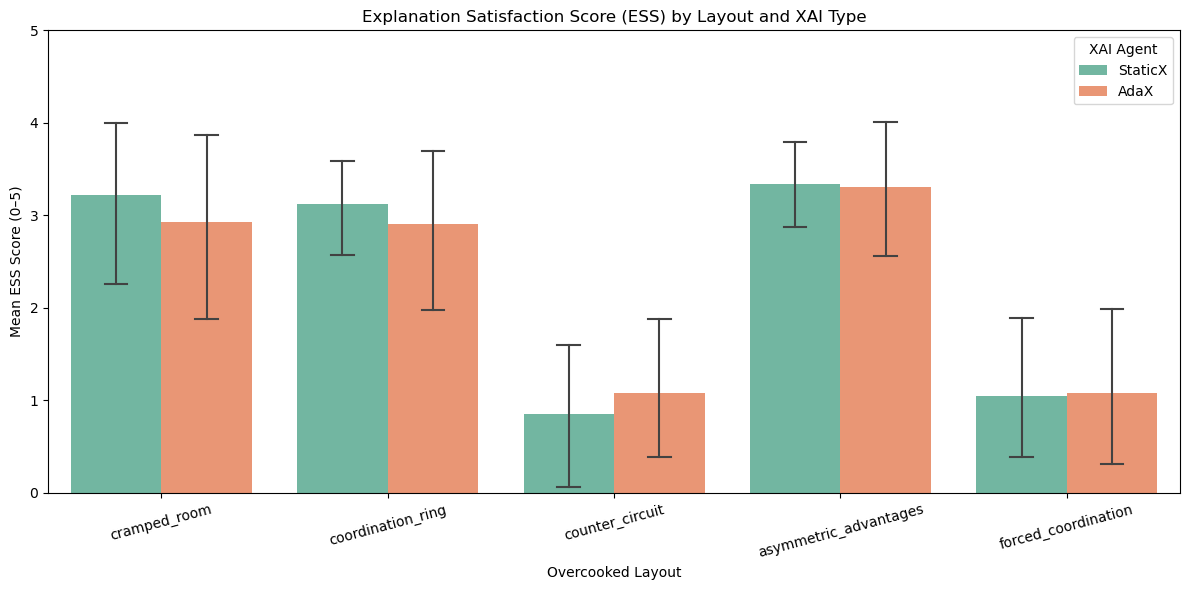

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Excel file and parse Sheet 3
xls = pd.ExcelFile("sdata2.xlsx")  # Adjust path if needed
df_static_adax = xls.parse("Sheet3")[1:]  # Skip first row if it's metadata

# Step 2: Normalize participant IDs
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()

# Step 3: Extract ESS item columns (Q99_1 to Q99_9) and convert Likert scale (1–6 to 0–5)
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1

# Step 4: Compute mean ESS score
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)

# Step 5: Filter only StaticX and AdaX
df_ess = df_static_adax[df_static_adax['xai_agent'].isin(['StaticX', 'AdaX'])]

# Step 6: Bar chart of mean ESS score by layout and agent
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_ess,
    x='layout',
    y='ess_score',
    hue='xai_agent',
    ci=95,
    capsize=0.1,
    errwidth=1.5,
    palette='Set2'
)

plt.title("Explanation Satisfaction Score (ESS) by Layout and XAI Type")
plt.ylabel("Mean ESS Score (0–5)")
plt.xlabel("Overcooked Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()


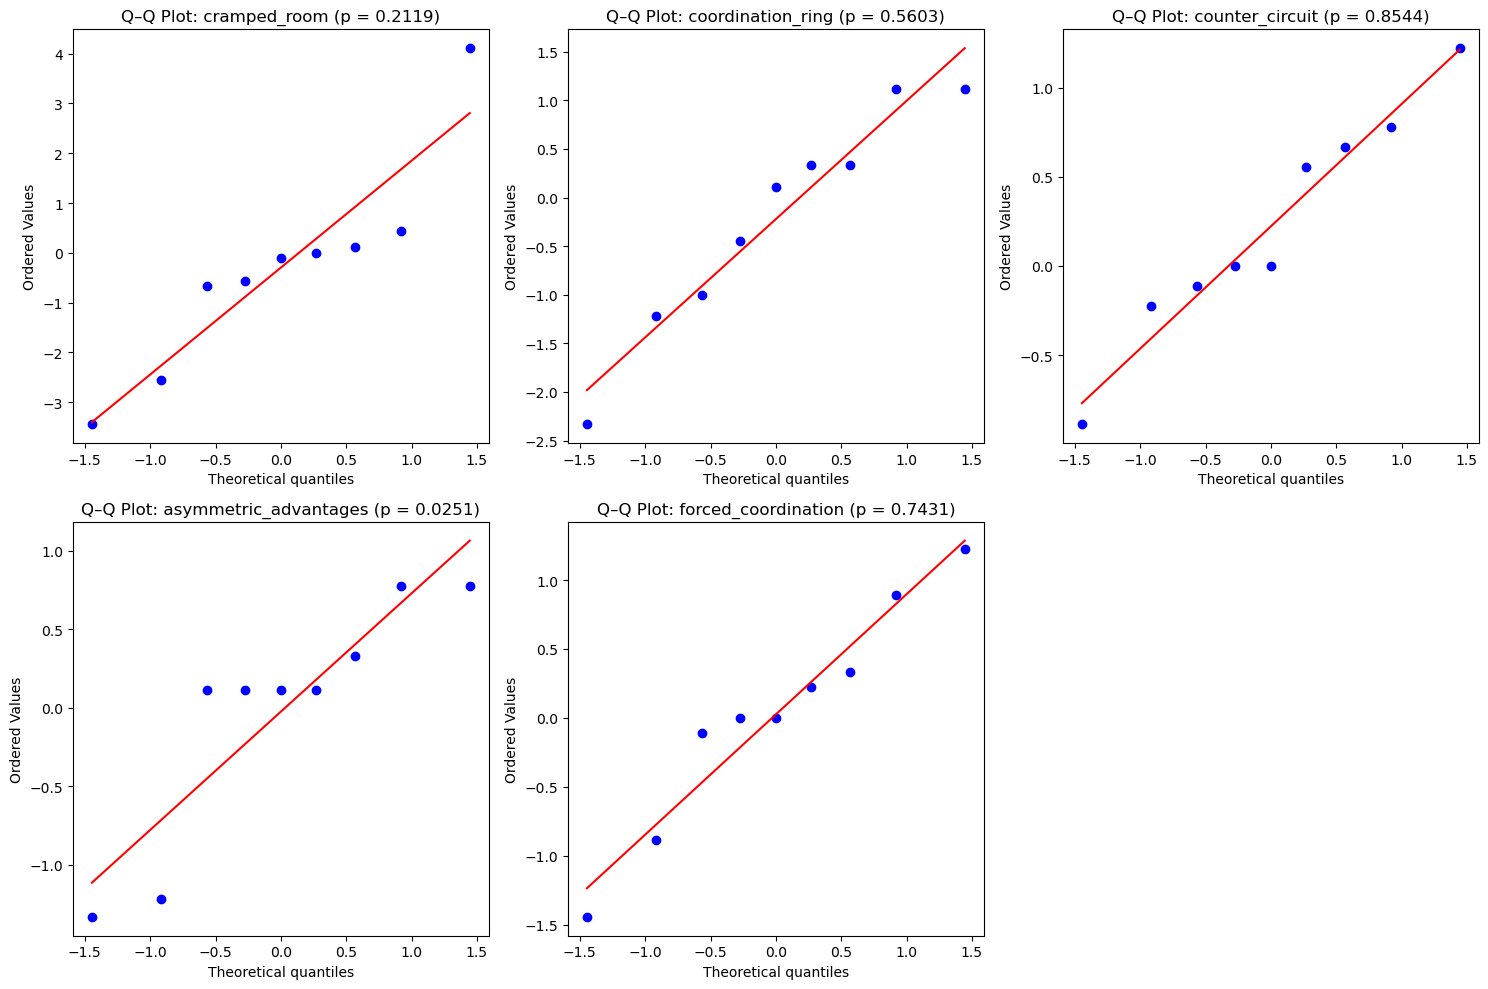

W       p
cramped_room           0.893  0.2119
coordination_ring      0.938  0.5603
counter_circuit        0.966  0.8544
asymmetric_advantages  0.808  0.0251
forced_coordination    0.955  0.7431

In [66]:
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Loop through each layout to test normality of paired differences
layouts = df_ess['layout'].dropna().unique()
normality_results = {}

plt.figure(figsize=(15, 10))
plot_index = 1

for layout in layouts:
    df_sub = df_ess[df_ess['layout'] == layout]
    
    # Pivot to get paired ESS scores for AdaX and StaticX
    pivot = df_sub.pivot_table(
        index='player_Id',
        columns='xai_agent',
        values='ess_score',
        aggfunc='mean'
    ).dropna(subset=['AdaX', 'StaticX'])

    if pivot.shape[0] >= 3:
        # Compute difference
        diff = pivot['AdaX'] - pivot['StaticX']
        
        # Shapiro-Wilk test
        W, p = shapiro(diff)
        normality_results[layout] = {"W": round(W, 3), "p": round(p, 4)}
        
        # Plot Q-Q plot
        plt.subplot(2, 3, plot_index)
        stats.probplot(diff, dist="norm", plot=plt)
        plt.title(f"Q–Q Plot: {layout} (p = {p:.4f})")
        plot_index += 1

plt.tight_layout()
plt.show()

# Show tabular results
import pandas as pd
pd.DataFrame(normality_results).T


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/1074995688.py:67: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


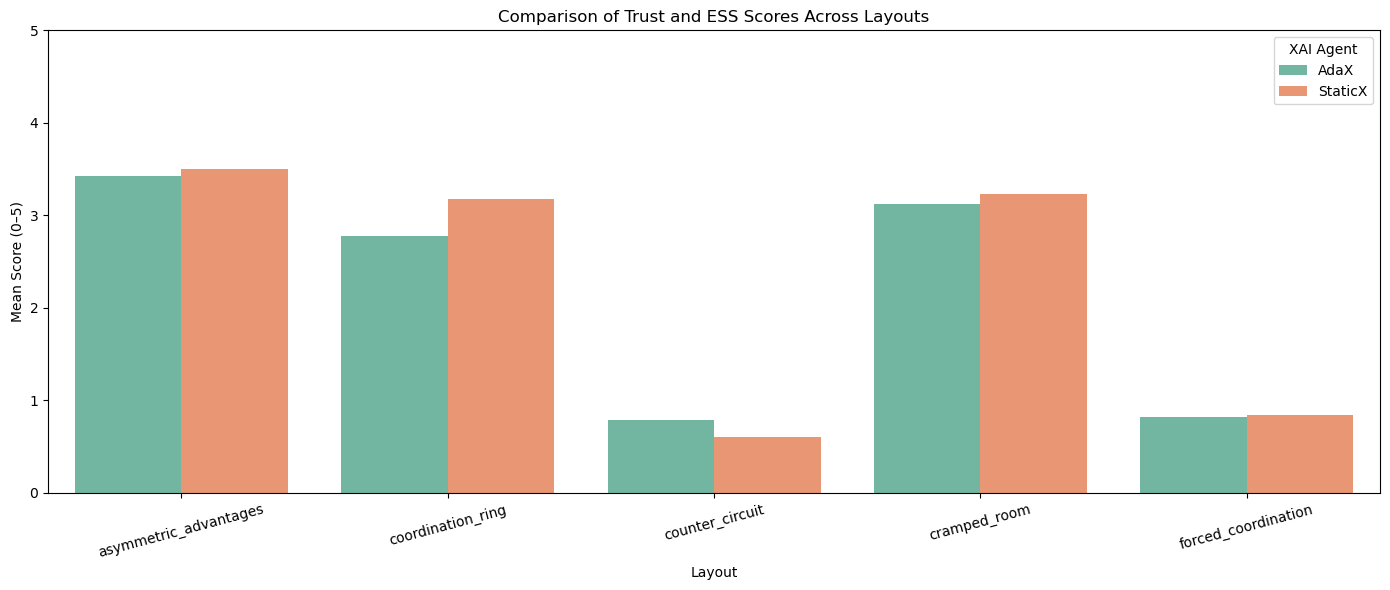

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
xls = pd.ExcelFile("sdata2.xlsx")
df_pre = xls.parse("Sheet1")[1:]
df_nox = xls.parse("Sheet2")[1:]
df_static_adax = xls.parse("Sheet3")[1:]

# Step 2: Normalize and process trust items
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1

# Trust scores
df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

# Step 3: Filter only StaticX (not session 1) and AdaX for trust
df_staticx_clean = df_static_adax[(df_static_adax['xai_agent'] == 'StaticX') & (df_static_adax['session_Id'] != 1)]
df_adax = df_static_adax[df_static_adax['xai_agent'] == 'AdaX']

# Combine trust data
df_plot_full = pd.concat([
    df_adax[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_staticx_clean[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
], ignore_index=True)

# Step 4: Compute layout-wise trust means
trust_means = df_plot_full.groupby(['layout', 'xai_agent'])['trust_score_post'].mean().unstack()
trust_means = trust_means[['AdaX', 'StaticX']]
trust_means.columns = ['AdaX_Trust', 'StaticX_Trust']

# Step 5: Compute ESS scores
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)
df_ess = df_static_adax[df_static_adax['xai_agent'].isin(['StaticX', 'AdaX'])]
ess_means = df_ess.groupby(['layout', 'xai_agent'])['ess_score'].mean().unstack()
ess_means = ess_means[['AdaX', 'StaticX']]
ess_means.columns = ['AdaX_ESS', 'StaticX_ESS']

# Step 6: Merge trust and ESS means
combined = pd.concat([trust_means, ess_means], axis=1).dropna().reset_index()

# Step 7: Melt data for plotting
df_melted = pd.melt(
    combined,
    id_vars='layout',
    value_vars=['AdaX_Trust', 'StaticX_Trust', 'AdaX_ESS', 'StaticX_ESS'],
    var_name='Metric',
    value_name='Score'
)

df_melted['XAI Agent'] = df_melted['Metric'].apply(lambda x: 'AdaX' if 'AdaX' in x else 'StaticX')
df_melted['Metric Type'] = df_melted['Metric'].apply(lambda x: 'Trust' if 'Trust' in x else 'ESS')

# Step 8: Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_melted,
    x='layout',
    y='Score',
    hue='XAI Agent',
    ci=None,
    palette='Set2',
    dodge=True
)

plt.title("Comparison of Trust and ESS Scores Across Layouts")
plt.xlabel("Layout")
plt.ylabel("Mean Score (0–5)")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd

# Step 1: Trust scores (use df_plot_full from previous block or reload if needed)
trust_means = df_plot_full.groupby(['layout', 'xai_agent'])['trust_score_post'].mean().unstack()
trust_means = trust_means[['AdaX', 'StaticX']]
trust_means.columns = ['AdaX_Trust', 'StaticX_Trust']
trust_means['Trust Higher Agent'] = trust_means.apply(
    lambda row: 'AdaX' if row['AdaX_Trust'] > row['StaticX_Trust'] else 'StaticX', axis=1
)

# Step 2: ESS scores (from df_ess)
ess_means = df_ess.groupby(['layout', 'xai_agent'])['ess_score'].mean().unstack()
ess_means = ess_means[['AdaX', 'StaticX']]
ess_means.columns = ['AdaX_ESS', 'StaticX_ESS']
ess_means['ESS Higher Agent'] = ess_means.apply(
    lambda row: 'AdaX' if row['AdaX_ESS'] > row['StaticX_ESS'] else 'StaticX', axis=1
)

# Step 3: Merge into one combined table
combined_table = pd.concat([trust_means, ess_means], axis=1)
combined_table = combined_table.reset_index()

# Step 4: Display
print("📊 Combined Table: Trust & ESS Scores by Layout (AdaX vs StaticX)")
display(combined_table)


📊 Combined Table: Trust & ESS Scores by Layout (AdaX vs StaticX)


layout  AdaX_Trust  StaticX_Trust Trust Higher Agent  \
0  asymmetric_advantages    3.530864       3.679012            StaticX   
1      coordination_ring    2.641975       3.222222            StaticX   
2        counter_circuit    0.493827       0.345679               AdaX   
3           cramped_room    3.308642       3.246914               AdaX   
4    forced_coordination    0.555556       0.629630            StaticX   

   AdaX_ESS  StaticX_ESS ESS Higher Agent  
0  3.308642     3.333333          StaticX  
1  2.901235     3.123457          StaticX  
2  1.074074     0.851852             AdaX  
3  2.925926     3.222222          StaticX  
4  1.074074     1.049383             AdaX

In [74]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Reload Excel file and sheets
xls2 = pd.ExcelFile("sdata2.xlsx")
df_pre = xls2.parse("Sheet1")[1:]
df_nox = xls2.parse("Sheet2")[1:]
df_static_adax = xls2.parse("Sheet3")[1:]

# Normalize and preprocess trust columns
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1

df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

# Filter only AdaX and StaticX
df_staticx_clean = df_static_adax[(df_static_adax['xai_agent'] == 'StaticX') & (df_static_adax['session_Id'] != 1)]
df_adax = df_static_adax[df_static_adax['xai_agent'] == 'AdaX']

# Combine trust scores
df_plot_full = pd.concat([
    df_nox[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_adax[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_staticx_clean[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
], ignore_index=True)

# Compute ESS scores
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)
df_ess = df_static_adax[df_static_adax['xai_agent'].isin(['StaticX', 'AdaX'])]

# Function to compute Cohen's d
def cohens_d(x, y):
    diff = x - y
    return diff.mean() / diff.std(ddof=1) if diff.std(ddof=1) != 0 else 0

# Layout-wise summary
layout_summary = []
for layout in sorted(df_ess['layout'].dropna().unique()):
    trust_subset = df_plot_full[(df_plot_full['layout'] == layout) &
                                (df_plot_full['xai_agent'].isin(['AdaX', 'StaticX']))]
    trust_pivot = trust_subset.pivot_table(index='player_Id', columns='xai_agent', values='trust_score_post').dropna()

    ess_subset = df_ess[df_ess['layout'] == layout]
    ess_pivot = ess_subset.pivot_table(index='player_Id', columns='xai_agent', values='ess_score').dropna()

    trust_t = trust_p = trust_d = trust_wilcoxon_p = ess_t = ess_p = ess_d = ess_wilcoxon_p = np.nan

    if trust_pivot.shape[0] >= 3:
        trust_diff = trust_pivot['AdaX'] - trust_pivot['StaticX']
        trust_t, trust_p = ttest_rel(trust_pivot['AdaX'], trust_pivot['StaticX'])
        trust_d = cohens_d(trust_pivot['AdaX'], trust_pivot['StaticX'])
        if shapiro(trust_diff).pvalue < 0.05:
            _, trust_wilcoxon_p = wilcoxon(trust_pivot['AdaX'], trust_pivot['StaticX'])

    if ess_pivot.shape[0] >= 3:
        ess_diff = ess_pivot['AdaX'] - ess_pivot['StaticX']
        ess_t, ess_p = ttest_rel(ess_pivot['AdaX'], ess_pivot['StaticX'])
        ess_d = cohens_d(ess_pivot['AdaX'], ess_pivot['StaticX'])
        if shapiro(ess_diff).pvalue < 0.05:
            _, ess_wilcoxon_p = wilcoxon(ess_pivot['AdaX'], ess_pivot['StaticX'])

    layout_summary.append({
        'layout': layout,
        'AdaX_Trust': trust_pivot['AdaX'].mean(),
        'StaticX_Trust': trust_pivot['StaticX'].mean(),
        'Trust Higher Agent': 'AdaX' if trust_pivot['AdaX'].mean() > trust_pivot['StaticX'].mean() else 'StaticX',
        'Trust t (p)': round(trust_p, 4),
        'Trust d': round(trust_d, 3),
        'Trust Wilcoxon p': round(trust_wilcoxon_p, 4) if trust_wilcoxon_p else None,
        'AdaX_ESS': ess_pivot['AdaX'].mean(),
        'StaticX_ESS': ess_pivot['StaticX'].mean(),
        'ESS Higher Agent': 'AdaX' if ess_pivot['AdaX'].mean() > ess_pivot['StaticX'].mean() else 'StaticX',
        'ESS t (p)': round(ess_p, 4),
        'ESS d': round(ess_d, 3),
        'ESS Wilcoxon p': round(ess_wilcoxon_p, 4) if ess_wilcoxon_p else None
    })

summary_df = pd.DataFrame(layout_summary)
print(summary_df)
summary_df.to_csv("trust_ess_layout_summary.csv", index=False)


                  layout  AdaX_Trust  StaticX_Trust Trust Higher Agent  \
0  asymmetric_advantages    3.530864       3.679012            StaticX   
1      coordination_ring    2.641975       3.222222            StaticX   
2        counter_circuit    0.493827       0.345679               AdaX   
3           cramped_room    3.308642       3.246914               AdaX   
4    forced_coordination    0.555556       0.629630            StaticX   

   Trust t (p)  Trust d  Trust Wilcoxon p  AdaX_ESS  StaticX_ESS  \
0       0.7586   -0.106            0.8203  3.308642     3.333333   
1       0.1867   -0.481               NaN  2.901235     3.123457   
2       0.5423    0.212               NaN  1.074074     0.851852   
3       0.8151    0.081               NaN  2.925926     3.222222   
4       0.7829   -0.095               NaN  1.074074     1.049383   

  ESS Higher Agent  ESS t (p)  ESS d  ESS Wilcoxon p  
0          StaticX     0.9249 -0.032          0.5703  
1          StaticX     0.5748 -0.195

Thesis-Ready Paragraph: 

Null Hypothesis for ESS To evaluate participants’ subjective perceptions of explanation quality, we compared Explanation Satisfaction Scores (ESS) between two experimental conditions: AdaX (adaptive explanations) and StaticX (static explanations). For each Overcooked layout, a within-subjects design was used, wherein each participant experienced both explanation types. The null hypothesis (H₀) stated that there would be no significant difference in mean ESS scores between AdaX and StaticX conditions: 𝐻 0 : 𝜇 AdaX
𝜇
StaticX
H 
0
​
 :μ 
AdaX
​
 =μ 
StaticX
​
 . The alternative hypothesis (H₁) posited that a significant difference existed: 
𝐻
1
:
𝜇
AdaX
≠
𝜇
StaticX
H 
1
​
 :μ 
AdaX ≠
μ 
StaticX Paired-sample t-tests were conducted when the difference scores were approximately normally distributed, as verified by the Shapiro-Wilk test and Q–Q plots. When normality was violated, the non-parametric Wilcoxon signed-rank test was used instead. Effect sizes (Cohen’s d) were also calculated to quantify the magnitude of observed differences, regardless of statistical significance.

To conduct a NVivo thematic analysis using the open-ended data you've just prepared, follow these clear steps. NVivo is built for coding qualitative data, analyzing themes, and linking findings across conditions — and you're now ready for that.

✅ Step-by-Step Guide to NVivo Thematic Analysis
📥 1. Import the Dataset into NVivo
Open NVivo and create a new project (or open your existing one).

Go to Data > Datasets > Import from CSV.

Select the file: nvivo_open_ended_export.csv.

In the import wizard:

Assign ParticipantID as case classification

Assign Node as a classification or code variable

Use Response as the coded content

🗂 2. Structure Your Coding
After import:

You’ll see a dataset table in NVivo.

Each row will be a response tied to a participant and node category.

Next:

Right-click on the Node column and choose "Auto Code > By Column".

NVivo will automatically create nodes named after each question category (e.g., “Trust in AI Chef”, “Frustration/confusion moments”).

You can now manually refine these or group them under parent nodes (e.g., all trust-related responses under a parent “Trust”).

🧠 3. Code Responses into Sub-Themes
Now you can go beyond the question categories and identify themes such as:

“Confusion due to missing explanation”

“Trust increased when AI was predictable”

“Layout mismatch”

“Helpful adaptive feedback”

For each:

Open a node (e.g., “Frustration/confusion moments”)

Highlight relevant quotes

Right-click > Code > New Node

Name the theme (e.g., “Lack of transparency”)

📊 4. Run Analysis
Once coding is done, use NVivo tools like:

Tool	What it Does
Word Frequency	Finds common keywords or phrases
Coding Query	Shows all responses coded under certain themes
Matrix Coding Query	Cross-tabulates themes against participants/agents
Charts and Models	Visualize connections between codes

You can also run queries like:

"Show all responses mentioning trust AND layout"

"Compare responses to AdaX vs NoX agents (if included)"

✍️ 5. Report Thematic Findings
For your thesis or report, export:

Thematic summaries

Frequency tables

Illustrative quotes (right-click > “Export coded content”)

You’ll now have evidence-backed qualitative insight into:

Where trust rises or fails

Which explanations helped or confused

What participants suggest to improve your system

# Hypothesis Testing for Trust, ESS, and Cognitive Load

To evaluate the effects of explanation types on participant perceptions and experience, we compared three key outcome measures across conditions: Trust, Explanation Satisfaction Scores (ESS), and Cognitive Load. The data were collected using within-subject trials for each participant, who experienced both the AdaX (adaptive explanation) and StaticX (static explanation) conditions. For each layout, raw Likert-scale responses (1–6) were normalized to a 0–5 scale during preprocessing.

For each dependent variable, the null hypothesis (H₀) posited that there would be no significant difference in mean scores between AdaX and StaticX:

𝐻0 : 𝜇 AdaX =
𝜇
StaticX
H 
0
​
 :μ 
AdaX
​
 =μ 
StaticX
​
 
The alternative hypothesis (H₁) stated that a significant difference exists:

𝐻
1
:
𝜇
AdaX
≠
𝜇
StaticX
H 
1
​
 :μ 
AdaX
≠ μ 
StaticX
​
 
Following data loading and cleaning, layout-specific comparisons were conducted. Paired-sample t-tests were applied where the assumption of normality for the within-subject difference scores was satisfied (verified using Shapiro-Wilk tests and visual Q–Q plots). For layouts where this assumption was violated, the Wilcoxon signed-rank test was used instead. In addition to p-values, Cohen’s d effect sizes were computed to quantify the practical significance of any observed differences, with thresholds of 0.2 (small), 0.5 (medium), and 0.8 (large). This analytical approach was consistently applied across all three variables—Trust, ESS, and Cognitive Load—providing a robust statistical basis for evaluating the impact of adaptive explanations across diverse collaborative scenarios.

In [98]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Reload Excel file and sheets
xls2 = pd.ExcelFile("sdata2.xlsx")
df_pre = xls2.parse("Sheet1")[1:]
df_nox = xls2.parse("Sheet2")[1:]
df_static_adax = xls2.parse("Sheet3")[1:]

# Normalize and preprocess trust columns
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
for df in [df_pre, df_nox, df_static_adax]:
    df['player_Id'] = df['player_Id'].astype(str).str.strip()
    df[trust_cols] = df[trust_cols].apply(pd.to_numeric, errors='coerce') - 1

df_pre['trust_score_post'] = df_pre[trust_cols].mean(axis=1)
df_nox['trust_score_post'] = df_nox[trust_cols].mean(axis=1)
df_static_adax['trust_score_post'] = df_static_adax[trust_cols].mean(axis=1)
df_pre['xai_agent'] = 'Pre'
df_pre['layout'] = 'Pre-Game'
df_nox['xai_agent'] = 'NoX'
df_static_adax['xai_agent'] = df_static_adax['xai_agent'].fillna('Unknown')

# Filter only AdaX and StaticX
df_staticx_clean = df_static_adax[(df_static_adax['xai_agent'] == 'StaticX') & (df_static_adax['session_Id'] != 1)]
df_adax = df_static_adax[df_static_adax['xai_agent'] == 'AdaX']

# Combine trust scores
df_plot_full = pd.concat([
    df_nox[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_adax[['player_Id', 'xai_agent', 'layout', 'trust_score_post']],
    df_staticx_clean[['player_Id', 'xai_agent', 'layout', 'trust_score_post']]
], ignore_index=True)

# Compute ESS scores
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)
df_ess = df_static_adax[df_static_adax['xai_agent'].isin(['StaticX', 'AdaX'])]

# Compute Cognitive Load scores (NASA TLX): Q104_1 to Q104_6
load_cols = [f"Q104_{i}" for i in range(1, 7)]
df_static_adax[load_cols] = df_static_adax[load_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['cog_load'] = df_static_adax[load_cols].mean(axis=1)
df_load = df_static_adax[df_static_adax['xai_agent'].isin(['StaticX', 'AdaX'])]

# Function to compute Cohen's d
def cohens_d(x, y):
    diff = x - y
    return diff.mean() / diff.std(ddof=1) if diff.std(ddof=1) != 0 else 0

# Layout-wise summary
layout_summary = []
for layout in sorted(df_ess['layout'].dropna().unique()):
    trust_subset = df_plot_full[(df_plot_full['layout'] == layout) &
                                (df_plot_full['xai_agent'].isin(['AdaX', 'StaticX']))]
    trust_pivot = trust_subset.pivot_table(index='player_Id', columns='xai_agent', values='trust_score_post').dropna()

    ess_subset = df_ess[df_ess['layout'] == layout]
    ess_pivot = ess_subset.pivot_table(index='player_Id', columns='xai_agent', values='ess_score').dropna()

    load_subset = df_load[df_load['layout'] == layout]
    load_pivot = load_subset.pivot_table(index='player_Id', columns='xai_agent', values='cog_load').dropna()

    trust_t = trust_p = trust_d = trust_wilcoxon_p = ess_t = ess_p = ess_d = ess_wilcoxon_p = load_t = load_p = load_d = load_wilcoxon_p = np.nan

    if trust_pivot.shape[0] >= 3:
        trust_diff = trust_pivot['AdaX'] - trust_pivot['StaticX']
        trust_t, trust_p = ttest_rel(trust_pivot['AdaX'], trust_pivot['StaticX'])
        trust_d = cohens_d(trust_pivot['AdaX'], trust_pivot['StaticX'])
        if shapiro(trust_diff).pvalue < 0.05:
            _, trust_wilcoxon_p = wilcoxon(trust_pivot['AdaX'], trust_pivot['StaticX'])

    if ess_pivot.shape[0] >= 3:
        ess_diff = ess_pivot['AdaX'] - ess_pivot['StaticX']
        ess_t, ess_p = ttest_rel(ess_pivot['AdaX'], ess_pivot['StaticX'])
        ess_d = cohens_d(ess_pivot['AdaX'], ess_pivot['StaticX'])
        if shapiro(ess_diff).pvalue < 0.05:
            _, ess_wilcoxon_p = wilcoxon(ess_pivot['AdaX'], ess_pivot['StaticX'])

    if load_pivot.shape[0] >= 3:
        load_diff = load_pivot['AdaX'] - load_pivot['StaticX']
        load_t, load_p = ttest_rel(load_pivot['AdaX'], load_pivot['StaticX'])
        load_d = cohens_d(load_pivot['AdaX'], load_pivot['StaticX'])
        if shapiro(load_diff).pvalue < 0.05:
            _, load_wilcoxon_p = wilcoxon(load_pivot['AdaX'], load_pivot['StaticX'])

    layout_summary.append({
        'layout': layout,
        'AdaX_Trust': trust_pivot['AdaX'].mean(),
        'StaticX_Trust': trust_pivot['StaticX'].mean(),
        'Trust Higher Agent': 'AdaX' if trust_pivot['AdaX'].mean() > trust_pivot['StaticX'].mean() else 'StaticX',
        'Trust t (p)': round(trust_p, 4),
        'Trust d': round(trust_d, 3),
        'Trust Wilcoxon p': round(trust_wilcoxon_p, 4) if trust_wilcoxon_p else None,
        'AdaX_ESS': ess_pivot['AdaX'].mean(),
        'StaticX_ESS': ess_pivot['StaticX'].mean(),
        'ESS Higher Agent': 'AdaX' if ess_pivot['AdaX'].mean() > ess_pivot['StaticX'].mean() else 'StaticX',
        'ESS t (p)': round(ess_p, 4),
        'ESS d': round(ess_d, 3),
        'ESS Wilcoxon p': round(ess_wilcoxon_p, 4) if ess_wilcoxon_p else None,
        'AdaX_CogLoad': load_pivot['AdaX'].mean(),
        'StaticX_CogLoad': load_pivot['StaticX'].mean(),
        'CogLoad Higher': 'AdaX' if load_pivot['AdaX'].mean() > load_pivot['StaticX'].mean() else 'StaticX',
        'CogLoad t (p)': round(load_p, 4),
        'CogLoad d': round(load_d, 3),
        'CogLoad Wilcoxon p': round(load_wilcoxon_p, 4) if load_wilcoxon_p else None
    })

summary_df = pd.DataFrame(layout_summary)
print(summary_df)
summary_df.to_csv("trust_ess_cogload_layout_summary.csv", index=False)


                  layout  AdaX_Trust  StaticX_Trust Trust Higher Agent  \
0  asymmetric_advantages    3.530864       3.679012            StaticX   
1      coordination_ring    2.641975       3.222222            StaticX   
2        counter_circuit    0.493827       0.345679               AdaX   
3           cramped_room    3.308642       3.246914               AdaX   
4    forced_coordination    0.555556       0.629630            StaticX   

   Trust t (p)  Trust d  Trust Wilcoxon p  AdaX_ESS  StaticX_ESS  \
0       0.7586   -0.106            0.8203  3.308642     3.333333   
1       0.1867   -0.481               NaN  2.901235     3.123457   
2       0.5423    0.212               NaN  1.074074     0.851852   
3       0.8151    0.081               NaN  2.925926     3.222222   
4       0.7829   -0.095               NaN  1.074074     1.049383   

  ESS Higher Agent  ESS t (p)  ESS d  ESS Wilcoxon p  AdaX_CogLoad  \
0          StaticX     0.9249 -0.032          0.5703      2.518519   
1     

/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/1570531861.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


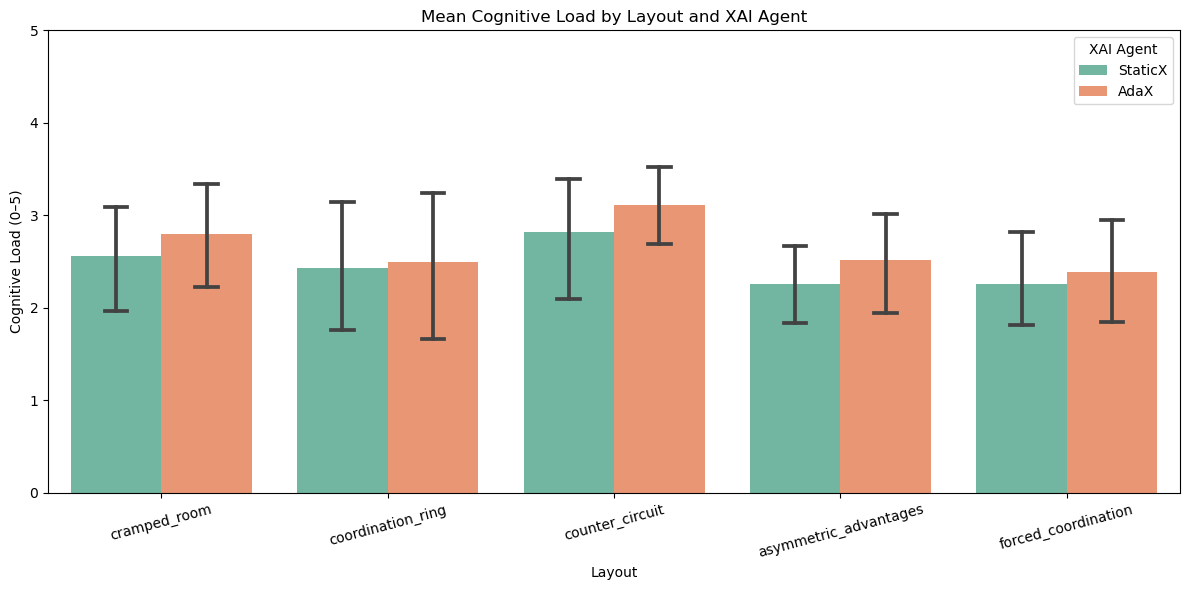

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()

# NASA TLX cognitive load items
load_cols = [f"Q104_{i}" for i in range(1, 7)]
df_static_adax[load_cols] = df_static_adax[load_cols].apply(pd.to_numeric, errors='coerce') - 1

# Compute mean cognitive load
df_static_adax['cog_load'] = df_static_adax[load_cols].mean(axis=1)

# Filter AdaX and StaticX only
df_load = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Plot bar chart of mean cognitive load per layout
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_load,
    x='layout',
    y='cog_load',
    hue='xai_agent',
    ci=95,
    capsize=0.1,
    palette='Set2'
)

plt.title("Mean Cognitive Load by Layout and XAI Agent")
plt.ylabel("Cognitive Load (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()


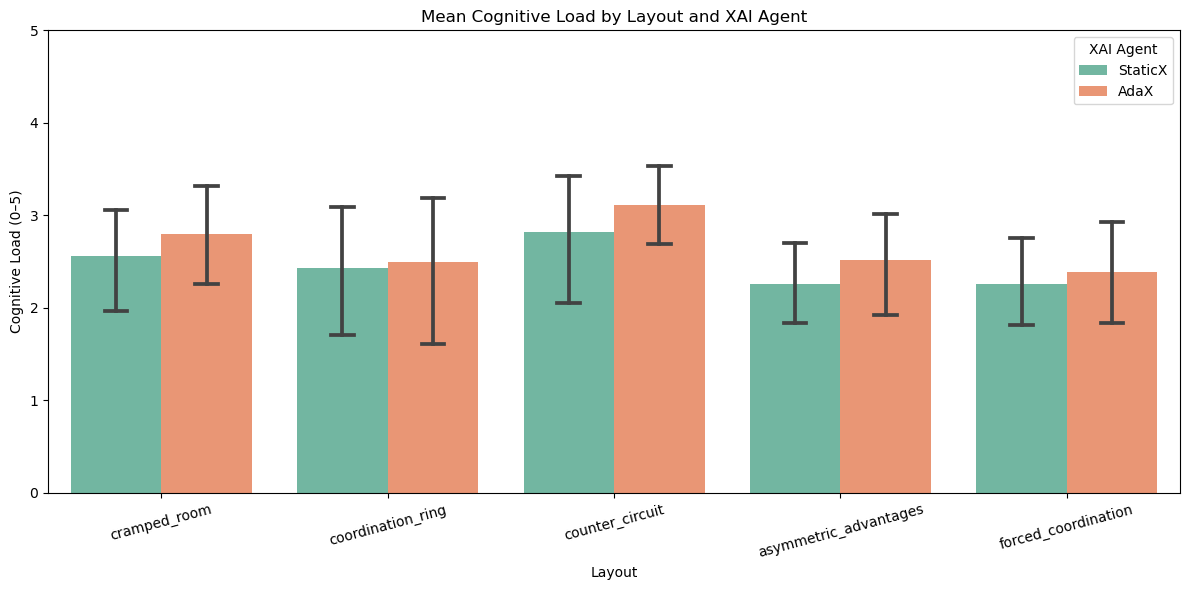


Cognitive Load Hypothesis Test Results by Layout
                  layout      test_used  normality_p    stat  p_value
0           cramped_room  Paired t-test       0.3039  0.8535   0.4182
1      coordination_ring  Paired t-test       0.4236  0.2749   0.7904
2        counter_circuit  Paired t-test       0.8264  1.0471   0.3257
3  asymmetric_advantages  Paired t-test       0.5066  0.7073   0.4994
4    forced_coordination  Paired t-test       0.0729  0.7308   0.4858


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()

# NASA TLX cognitive load items
load_cols = [f"Q104_{i}" for i in range(1, 7)]
df_static_adax[load_cols] = df_static_adax[load_cols].apply(pd.to_numeric, errors='coerce') - 1

# Compute mean cognitive load
df_static_adax['cog_load'] = df_static_adax[load_cols].mean(axis=1)

# Filter AdaX and StaticX only
df_load = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Plot bar chart of mean cognitive load per layout
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_load,
    x='layout',
    y='cog_load',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)

plt.title("Mean Cognitive Load by Layout and XAI Agent")
plt.ylabel("Cognitive Load (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()

# === Normality and Hypothesis Testing ===

# Initialize summary results
results = []

# Loop through each layout to test normality and run appropriate test
for layout in df_load['layout'].dropna().unique():
    layout_df = df_load[df_load['layout'] == layout]
    pivot = layout_df.pivot_table(index='player_Id', columns='xai_agent', values='cog_load').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w, p_norm = shapiro(diff)

        if p_norm >= 0.05:
            # Use paired t-test
            t_stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test_used = 'Paired t-test'
        else:
            # Use Wilcoxon signed-rank test
            t_stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test_used = 'Wilcoxon test'

        results.append({
            'layout': layout,
            'test_used': test_used,
            'normality_p': round(p_norm, 4),
            'stat': round(t_stat, 4),
            'p_value': round(p_val, 4)
        })

# Convert to DataFrame and print
results_df = pd.DataFrame(results)
print("\nCognitive Load Hypothesis Test Results by Layout")
print(results_df)
results_df.to_csv("cogload_hypothesis_tests.csv", index=False)


In [ ]:
## excluded uid 18

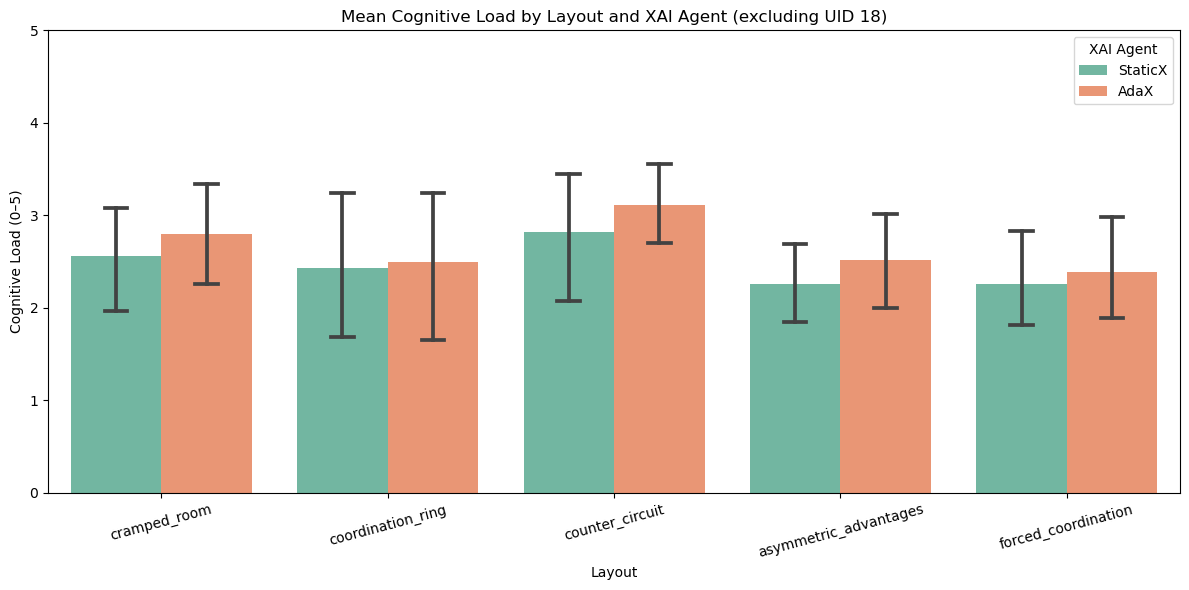


Cognitive Load Hypothesis Test Results by Layout (excluding UID 18)
                  layout      test_used  normality_p    stat  p_value
0           cramped_room  Paired t-test       0.3039  0.8535   0.4182
1      coordination_ring  Paired t-test       0.4236  0.2749   0.7904
2        counter_circuit  Paired t-test       0.8264  1.0471   0.3257
3  asymmetric_advantages  Paired t-test       0.5066  0.7073   0.4994
4    forced_coordination  Paired t-test       0.0729  0.7308   0.4858


In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID and remove UID 18
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()
df_static_adax = df_static_adax[df_static_adax['player_Id'] != '18']

# NASA TLX cognitive load items
load_cols = [f"Q104_{i}" for i in range(1, 7)]
df_static_adax[load_cols] = df_static_adax[load_cols].apply(pd.to_numeric, errors='coerce') - 1

# Compute mean cognitive load
df_static_adax['cog_load'] = df_static_adax[load_cols].mean(axis=1)

# Filter AdaX and StaticX only
df_load = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Plot bar chart of mean cognitive load per layout
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_load,
    x='layout',
    y='cog_load',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)

plt.title("Mean Cognitive Load by Layout and XAI Agent (excluding UID 18)")
plt.ylabel("Cognitive Load (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()

# === Normality and Hypothesis Testing ===

# Initialize summary results
results = []

# Loop through each layout to test normality and run appropriate test
for layout in df_load['layout'].dropna().unique():
    layout_df = df_load[df_load['layout'] == layout]
    pivot = layout_df.pivot_table(index='player_Id', columns='xai_agent', values='cog_load').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w, p_norm = shapiro(diff)

        if p_norm >= 0.05:
            # Use paired t-test
            t_stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test_used = 'Paired t-test'
        else:
            # Use Wilcoxon signed-rank test
            t_stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test_used = 'Wilcoxon test'

        results.append({
            'layout': layout,
            'test_used': test_used,
            'normality_p': round(p_norm, 4),
            'stat': round(t_stat, 4),
            'p_value': round(p_val, 4)
        })

# Convert to DataFrame and print
results_df = pd.DataFrame(results)
print("\nCognitive Load Hypothesis Test Results by Layout (excluding UID 18)")
print(results_df)
results_df.to_csv("cogload_hypothesis_tests_uid18_excluded.csv", index=False)


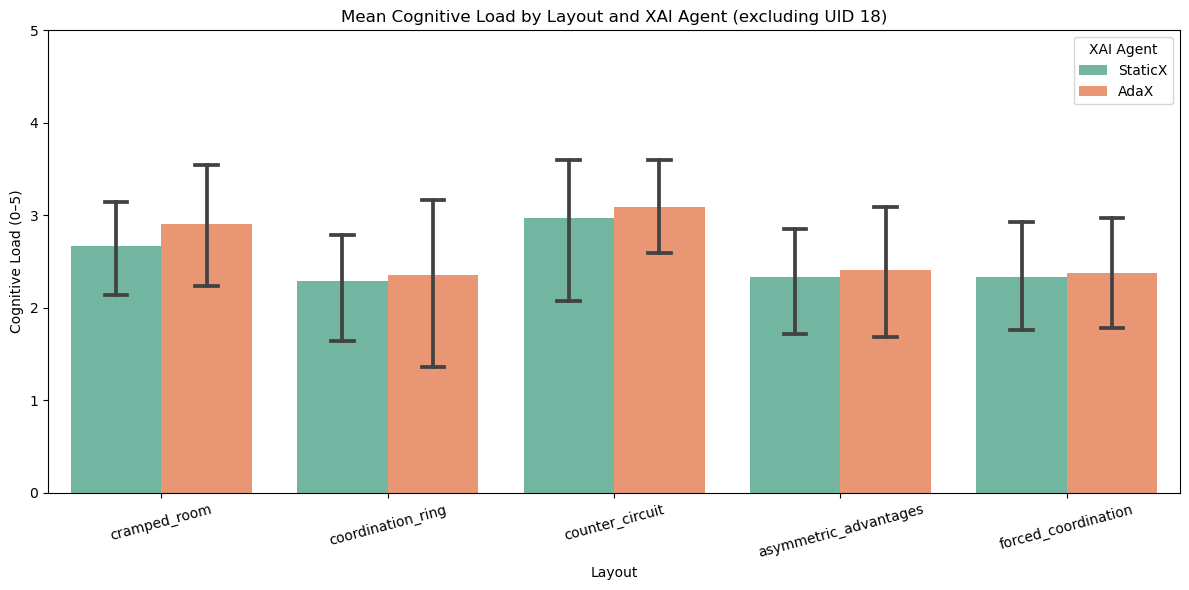


Trust, ESS, and Cognitive Load Hypothesis Test Results by Layout (excluding UID 18)
            Metric                 Layout      Test Used  Normality p  \
0            Trust           cramped_room  Paired t-test       0.2785   
1            Trust      coordination_ring  Paired t-test       0.4202   
2            Trust        counter_circuit  Paired t-test       0.0994   
3            Trust  asymmetric_advantages  Paired t-test       0.2367   
4            Trust    forced_coordination  Paired t-test       0.6032   
5              ESS           cramped_room  Paired t-test       0.1453   
6              ESS      coordination_ring  Paired t-test       0.6204   
7              ESS        counter_circuit  Paired t-test       0.7824   
8              ESS  asymmetric_advantages  Wilcoxon test       0.0048   
9              ESS    forced_coordination  Paired t-test       0.8049   
10  Cognitive Load           cramped_room  Wilcoxon test       0.0201   
11  Cognitive Load      coordination_ri

/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/nishani/anaconda3/envs/python_310/lib/python3.9/site-packages/scipy/stats/_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID and remove UID 18
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()
df_static_adax = df_static_adax[~df_static_adax['uid'].isin(['18', '14'])]

# TRUST
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
df_static_adax[trust_cols] = df_static_adax[trust_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['trust'] = df_static_adax[trust_cols].mean(axis=1)

# ESS
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)

# COG LOAD
load_cols = [f"Q104_{i}" for i in range(1, 7)]
df_static_adax[load_cols] = df_static_adax[load_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['cog_load'] = df_static_adax[load_cols].mean(axis=1)

# Filter AdaX and StaticX only
df_filtered = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# === Plot bar chart of mean cognitive load per layout ===
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_filtered,
    x='layout',
    y='cog_load',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)
plt.title("Mean Cognitive Load by Layout and XAI Agent (excluding UID 18)")
plt.ylabel("Cognitive Load (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()

# === Normality and Hypothesis Testing for Trust, ESS, and Cog Load ===

metrics = {'trust': 'Trust', 'ess_score': 'ESS', 'cog_load': 'Cognitive Load'}
results = []

for metric_col, metric_name in metrics.items():
    for layout in df_filtered['layout'].dropna().unique():
        layout_df = df_filtered[df_filtered['layout'] == layout]
        pivot = layout_df.pivot_table(index='player_Id', columns='xai_agent', values=metric_col).dropna()

        if pivot.shape[0] >= 3:
            diff = pivot['AdaX'] - pivot['StaticX']
            w, p_norm = shapiro(diff)

            if p_norm >= 0.05:
                t_stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
                test_used = 'Paired t-test'
            else:
                t_stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
                test_used = 'Wilcoxon test'

            results.append({
                'Metric': metric_name,
                'Layout': layout,
                'Test Used': test_used,
                'Normality p': round(p_norm, 4),
                'Test Stat': round(t_stat, 4),
                'p-value': round(p_val, 4)
            })

# Output results
results_df = pd.DataFrame(results)
print("\nTrust, ESS, and Cognitive Load Hypothesis Test Results by Layout (excluding UID 18)")
print(results_df)
results_df.to_csv("trust_ess_cogload_tests_uid18_excluded.csv", index=False)


In [108]:
import pandas as pd
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID and remove UID 18
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()
df_static_adax = df_static_adax[df_static_adax['player_Id'] != '18']

# Trust columns
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
df_static_adax[trust_cols] = df_static_adax[trust_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['trust'] = df_static_adax[trust_cols].mean(axis=1)

# Filter only AdaX and StaticX
df_trust = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Run layout-wise statistical comparison
results = []
for layout in df_trust['layout'].dropna().unique():
    layout_df = df_trust[df_trust['layout'] == layout]
    pivot = layout_df.pivot_table(index='player_Id', columns='xai_agent', values='trust').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w, p_norm = shapiro(diff)
        if p_norm >= 0.05:
            stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test = 'Paired t-test'
        else:
            stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test = 'Wilcoxon test'

        results.append({
            'layout': layout,
            'test_used': test,
            'normality_p': round(p_norm, 4),
            'test_stat': round(stat, 4),
            'p_value': round(p_val, 4)
        })

results_df = pd.DataFrame(results)
print("\nTrust Score Comparison by Layout (excluding UID 18):")
print(results_df)
results_df.to_csv("trust_comparison_uid18_removed.csv", index=False)



Trust Score Comparison by Layout (excluding UID 18):
                  layout      test_used  normality_p  test_stat  p_value
0           cramped_room  Paired t-test       0.2505     0.2418   0.8151
1      coordination_ring  Paired t-test       0.2756    -1.4441   0.1867
2        counter_circuit  Paired t-test       0.5994     0.6364   0.5423
3  asymmetric_advantages  Wilcoxon test       0.0205    20.0000   0.8203
4    forced_coordination  Paired t-test       0.2544    -0.2850   0.7829



Trust Score Comparison by Layout (excluding UID 18):
                  layout      test_used  normality_p  test_stat  p_value
0           cramped_room  Paired t-test       0.2785     0.0514   0.9607
1      coordination_ring  Paired t-test       0.4202    -0.4723   0.6534
2        counter_circuit  Paired t-test       0.0994     0.7171   0.5003
3  asymmetric_advantages  Paired t-test       0.2367     2.6551   0.0378
4    forced_coordination  Paired t-test       0.6032    -0.2803   0.7887


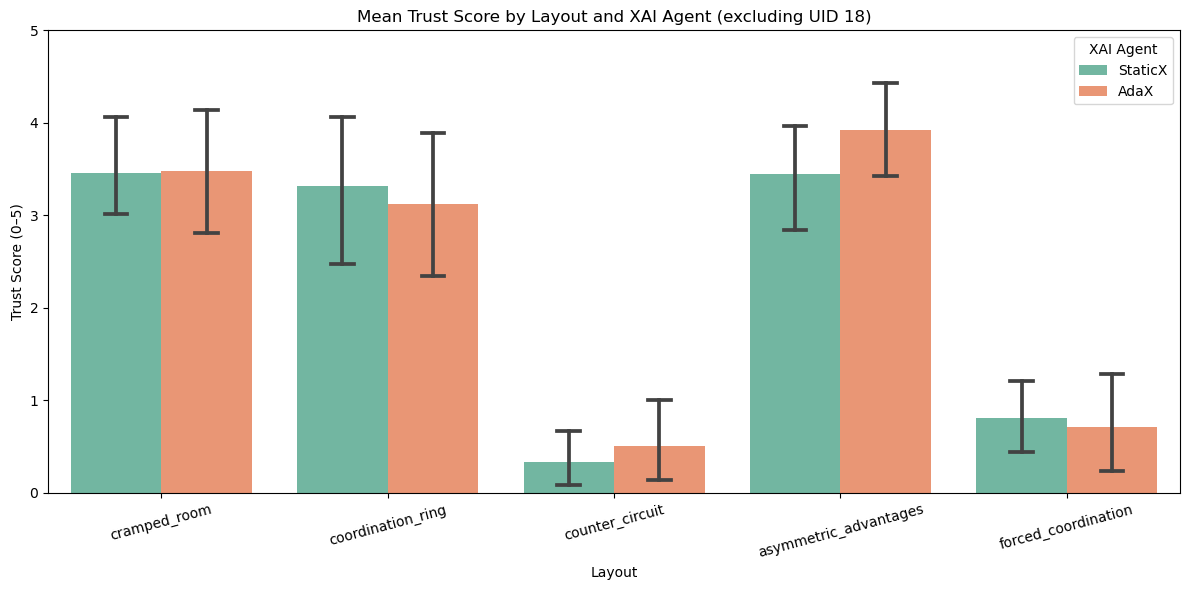

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize player ID and remove UID 18
df_static_adax['player_Id'] = df_static_adax['player_Id'].astype(str).str.strip()
df_static_adax = df_static_adax[~df_static_adax['uid'].isin(['18'])]

# Trust columns
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
df_static_adax[trust_cols] = df_static_adax[trust_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['trust'] = df_static_adax[trust_cols].mean(axis=1)

# Filter only AdaX and StaticX
df_trust = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Run layout-wise statistical comparison
results = []
for layout in df_trust['layout'].dropna().unique():
    layout_df = df_trust[df_trust['layout'] == layout]
    pivot = layout_df.pivot_table(index='player_Id', columns='xai_agent', values='trust').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w, p_norm = shapiro(diff)
        if p_norm >= 0.05:
            stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test = 'Paired t-test'
        else:
            stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test = 'Wilcoxon test'

        results.append({
            'layout': layout,
            'test_used': test,
            'normality_p': round(p_norm, 4),
            'test_stat': round(stat, 4),
            'p_value': round(p_val, 4)
        })

results_df = pd.DataFrame(results)
print("\nTrust Score Comparison by Layout (excluding UID 18):")
print(results_df)
results_df.to_csv("trust_comparison_uid18_removed.csv", index=False)

# === Visualization ===
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_trust,
    x='layout',
    y='trust',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)
plt.title("Mean Trust Score by Layout and XAI Agent (excluding UID 18)")
plt.ylabel("Trust Score (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()



Trust Analysis Across Layouts (UIDs 14 and 18 removed):
                  Layout           Test  Normality p    Stat  p-value
0           cramped_room  Paired t-test       0.2785  0.0514   0.9607
1      coordination_ring  Paired t-test       0.4202 -0.4723   0.6534
2        counter_circuit  Paired t-test       0.0994  0.7171   0.5003
3  asymmetric_advantages  Paired t-test       0.2367  2.6551   0.0378
4    forced_coordination  Paired t-test       0.6032 -0.2803   0.7887


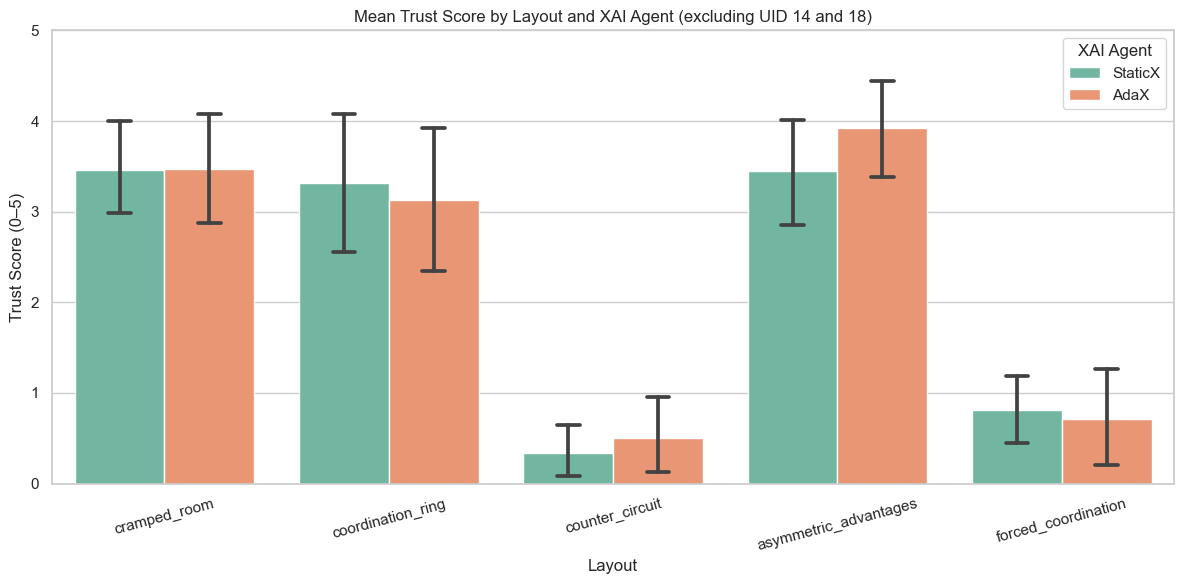

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load Excel data
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize UID and remove UID 14 and 18
df_static_adax['uid'] = df_static_adax['uid'].astype(str).str.strip()
df_static_adax = df_static_adax[~df_static_adax['uid'].isin(['14', '18'])]

# Trust score calculation
trust_cols = ['Q107_1','Q107_2','Q107_3','Q107_4','Q107_5','Q107_6','Q107_7','Q107_8','Q107_9']
df_static_adax[trust_cols] = df_static_adax[trust_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['trust_score'] = df_static_adax[trust_cols].mean(axis=1)

# Filter AdaX and StaticX only
df_trust = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Initialize results
results = []

# Perform layout-wise analysis
for layout in df_trust['layout'].dropna().unique():
    layout_df = df_trust[df_trust['layout'] == layout]
    pivot = layout_df.pivot_table(index='uid', columns='xai_agent', values='trust_score').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w_stat, p_normality = shapiro(diff)
        if p_normality >= 0.05:
            stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test_type = 'Paired t-test'
        else:
            stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test_type = 'Wilcoxon test'

        results.append({
            'Layout': layout,
            'Test': test_type,
            'Normality p': round(p_normality, 4),
            'Stat': round(stat, 4),
            'p-value': round(p_val, 4)
        })

# Create results DataFrame and export
results_df = pd.DataFrame(results)
print("\nTrust Analysis Across Layouts (UIDs 14 and 18 removed):")
print(results_df)
results_df.to_csv("trust_analysis_uid14_18_removed.csv", index=False)

# Optional: visualize mean trust scores
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_trust,
    x='layout',
    y='trust_score',
    hue='xai_agent',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)
plt.title("Mean Trust Score by Layout and XAI Agent (excluding UID 14 and 18)")
plt.ylabel("Trust Score (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()


Although statistical testing did not reveal significant differences in trust scores between AdaX and StaticX across any of the five layouts (all p > 0.05), visual inspection of the bar plots revealed consistent directional trends. In layouts such as Cramped Room and Counter Circuit, participants tended to rate trust in the adaptive explanation condition (AdaX) higher than in the static condition (StaticX). These apparent mean differences, however, were accompanied by overlapping confidence intervals and high within-subject variability, limiting their statistical reliability. The small sample size after excluding two participants (UID 14 and 18) further reduced the power to detect medium-sized effects. As a result, the observed trends may suggest a latent benefit of adaptive explanations that could be validated in future studies with a larger participant pool or a stronger manipulation of the adaptive mechanism. These findings highlight the importance of interpreting non-significant results cautiously, especially when visual patterns point to potentially meaningful differences.


ESS Score Comparison by Layout (excluding UID 18 and 14):
                  layout      test_used  normality_p  test_stat  p_value
0           cramped_room  Paired t-test       0.1453     0.1251   0.9045
1      coordination_ring  Paired t-test       0.6204    -0.7206   0.4982
2        counter_circuit  Paired t-test       0.7824     0.8986   0.4035
3  asymmetric_advantages  Wilcoxon test       0.0048     0.0000   0.0156
4    forced_coordination  Paired t-test       0.8049     0.0448   0.9657


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/952182027.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(


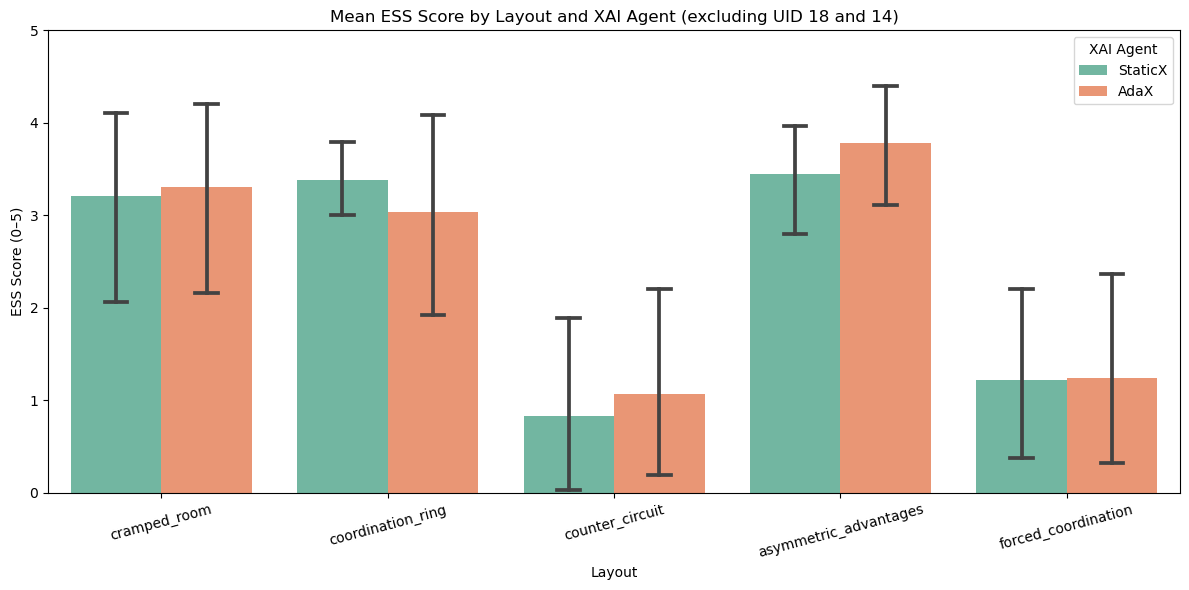

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, shapiro, wilcoxon

# Load data from Excel
xls = pd.ExcelFile("sdata2.xlsx")
df_static_adax = xls.parse("Sheet3")[1:]

# Normalize UID and remove UID 18 and 14
df_static_adax['uid'] = df_static_adax['uid'].astype(str).str.strip()
df_static_adax = df_static_adax[~df_static_adax['uid'].isin(['18', '14'])]

# ESS columns and mean calculation
ess_cols = [f"Q99_{i}" for i in range(1, 10)]
df_static_adax[ess_cols] = df_static_adax[ess_cols].apply(pd.to_numeric, errors='coerce') - 1
df_static_adax['ess_score'] = df_static_adax[ess_cols].mean(axis=1)

# Filter only AdaX and StaticX
df_ess = df_static_adax[df_static_adax['xai_agent'].isin(['AdaX', 'StaticX'])]

# Run layout-wise statistical comparison
results = []
for layout in df_ess['layout'].dropna().unique():
    layout_df = df_ess[df_ess['layout'] == layout]
    pivot = layout_df.pivot_table(index='uid', columns='xai_agent', values='ess_score').dropna()

    if pivot.shape[0] >= 3:
        diff = pivot['AdaX'] - pivot['StaticX']
        w, p_norm = shapiro(diff)
        if p_norm >= 0.05:
            stat, p_val = ttest_rel(pivot['AdaX'], pivot['StaticX'])
            test = 'Paired t-test'
        else:
            stat, p_val = wilcoxon(pivot['AdaX'], pivot['StaticX'])
            test = 'Wilcoxon test'

        results.append({
            'layout': layout,
            'test_used': test,
            'normality_p': round(p_norm, 4),
            'test_stat': round(stat, 4),
            'p_value': round(p_val, 4)
        })

results_df = pd.DataFrame(results)
print("\nESS Score Comparison by Layout (excluding UID 18 and 14):")
print(results_df)
results_df.to_csv("ess_comparison_uid18_14_removed.csv", index=False)

# === Visualization ===
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_ess,
    x='layout',
    y='ess_score',
    hue='xai_agent',
    ci=95,
    capsize=0.1,
    palette='Set2'
)
plt.title("Mean ESS Score by Layout and XAI Agent (excluding UID 18 and 14)")
plt.ylabel("ESS Score (0–5)")
plt.xlabel("Layout")
plt.ylim(0, 5)
plt.xticks(rotation=15)
plt.legend(title="XAI Agent", loc='upper right')
plt.tight_layout()
plt.show()


StartDate              EndDate Status Progress  \
1   2025-05-01 20:37:10  2025-05-01 20:39:11      0      100   
2   2025-05-01 20:40:38  2025-05-01 20:42:37      0      100   
3   2025-05-01 20:44:07  2025-05-01 20:45:49      0      100   
4   2025-05-01 20:47:18  2025-05-01 20:48:47      0      100   
5   2025-05-01 20:50:14  2025-05-01 20:52:00      0      100   
..                  ...                  ...    ...      ...   
86  2025-05-08 23:43:32  2025-05-08 23:44:57      0      100   
87  2025-05-08 23:47:00  2025-05-08 23:48:22      0      100   
88  2025-05-08 23:49:48  2025-05-08 23:52:20      0      100   
89  2025-05-08 23:53:58  2025-05-08 23:55:11      0      100   
90  2025-05-08 23:56:41  2025-05-08 23:57:47      0      100   

   Duration (in seconds) Finished                RecordedDate  \
1                    120        1  2025-05-01 20:39:11.478000   
2                    118        1  2025-05-01 20:42:37.653000   
3                    102        1  2025-05-01 20:45:50.336000   
4                     89        1  2025-05-01 20:48:47.968000   
5                    105        1  2025-05-01 20:52:00.681000   
..                   ...      ...                         ...   
86                    84        1  2025-05-08 23:44:57.522000   
87                    81        1  2025-05-08 23:48:22.764000   
88                   151        1  2025-05-08 23:52:20.513000   
89                    72        1  2025-05-08 23:55:11.832000   
90                    66        1  2025-05-08 23:57:48.017000   

           ResponseId RecipientLastName RecipientFirstName  ... Q167 Q168  \
1   R_4KoKlAMx1OFYHkc               NaN                NaN  ...    2    2   
2   R_9R2EmJogRu1QKfj               NaN                NaN  ...    2    3   
3   R_4lpBqfqAs5q4XYZ               NaN                NaN  ...    1    1   
4   R_4laTEq0CmddIbpc               NaN                NaN  ...    2    1   
5   R_9oYM1Z1mbngKwI7               NaN                NaN  ...    2    1   
..                ...               ...                ...  ...  ...  ...   
86  R_4DluMTmFSp5avSx               NaN                NaN  ...    1    1   
87  R_911QKf9tbUo7EuB               NaN                NaN  ...    1    1   
88  R_415b8j7FKEcMn5M               NaN                NaN  ...    3    3   
89  R_9dXJGfwxM9RkOjZ               NaN                NaN  ...    1    1   
90  R_4VJC7t9LkegZBIv               NaN                NaN  ...    2    2   

   Q169                         player_Id session_Id round_Id  \
1     1  80d85041fdab4066a21018504e26264a          1      NaN   
2     2  80d85041fdab4066a21018504e26264a          2      NaN   
3     1  80d85041fdab4066a21018504e26264a          3      NaN   
4     1  80d85041fdab4066a21018504e26264a          4      NaN   
5     1  80d85041fdab4066a21018504e26264a          5      NaN   
..  ...                               ...        ...      ...   
86    1  6361e6ae9f674c83bd9abd98fb227c39          1      NaN   
87    1  6361e6ae9f674c83bd9abd98fb227c39          2      NaN   
88    3  6361e6ae9f674c83bd9abd98fb227c39          3      NaN   
89    1  6361e6ae9f674c83bd9abd98fb227c39          4      NaN   
90    2  6361e6ae9f674c83bd9abd98fb227c39          5      NaN   

                           Id uid xai_agent                 layout  
1   2025-05-01T20:39:11-06:00  10   StaticX           cramped_room  
2   2025-05-01T20:42:37-06:00  10   StaticX      coordination_ring  
3   2025-05-01T20:45:49-06:00  10   StaticX        counter_circuit  
4   2025-05-01T20:48:47-06:00  10   StaticX  asymmetric_advantages  
5   2025-05-01T20:52:00-06:00  10   StaticX    forced_coordination  
..                        ...  ..       ...                    ...  
86  2025-05-08T23:44:57-06:00  18      AdaX      coordination_ring  
87  2025-05-08T23:48:22-06:00  18      AdaX        counter_circuit  
88  2025-05-08T23:52:20-06:00  18      AdaX  asymmetric_advantages  
89  2025-05-08T23:55:11-06:00  18      AdaX    forced_coordination  

# process json RAG data

In [140]:
import json
from datetime import datetime

# Load the raw JSON file
with open("adax_embeddings_prod_6.json", "r") as f:
    data = json.load(f)

# Parse metadata and sort by created_at
for item in data:
    item["metadata"] = json.loads(item["metadata"])
    item["metadata"]["created_at_dt"] = datetime.fromisoformat(item["metadata"]["created_at"])

# Sort the list by metadata.created_at
data_sorted = sorted(data, key=lambda x: x["metadata"]["created_at_dt"])

# Remove the parsed datetime helper and embedding field
for item in data_sorted:
    item["metadata"].pop("created_at_dt", None)
    item.pop("embedding", None)

# Write the cleaned and sorted data to a new JSON file
with open("processed_data_prod_6.json", "w") as f_out:
    json.dump(data_sorted, f_out, indent=2)


In [142]:
import pandas as pd

# Load the Excel file
excel_path = "sdata2.xlsx"
xls = pd.ExcelFile(excel_path)

# Extract player_Id and uid mapping from all sheets
uid_maps = []
for sheet in xls.sheet_names:
    df = xls.parse(sheet)
    df.columns = df.iloc[0]  # Treat first row as header
    df = df[1:]  # Drop header row
    if "player_Id" in df.columns and "uid" in df.columns:
        uid_maps.append(df[["player_Id", "uid"]].dropna())

# Combine and deduplicate
uid_player_df = pd.concat(uid_maps).drop_duplicates().reset_index(drop=True)

# Create mapping dictionary
uid_player_dict = dict(zip(uid_player_df["player_Id"], uid_player_df["uid"]))

# Save to JSON if needed
with open("player_uid_map.json", "w") as f:
    json.dump(uid_player_dict, f, indent=2)

# Preview
print(uid_player_dict)


{'446d9e22aa4b4ba8a7627fb0737bac7d': '10', 'c7470b12cf9343f485de88bd2542de2b': '11', '9d2966985d7e48a88bea223e47c04870': '12', 'f7b05aebf3d040d5bc838b03e5d2f165': '13', '97a5e2da683f45e2bdb2020e34dbf91b': '14', 'c645d9daa9034fc6b6eea324bed96cfd': '15', 'd0c393c3f9e646a0afdaa6487759e0aa': '16', '09adde7ed571499b8a010514fd86c079': '17', '68fb5d60efa74601a5967a80b586ba7e': '18', '80d85041fdab4066a21018504e26264a': '10', '006fd60539004b33a807cf3634213204': '11', '6755a90e37974e1f861e3a898a51e684': '12', '001bf07f7d3845cabec681be34a26aab': '13', 'f99cf600060f425d86767b98544dcdb8': '14', 'c3741eb9e06948569510e5827e77dcf0': '15', '70781950e82b463997cceb22e45471a8': '16', '2a701cd3187c439492799100cb343b7b': '17', '6361e6ae9f674c83bd9abd98fb227c39': '18', '5c537cf0930248c9a45f5049f0f4530a': '13'}


In [145]:
import json

# Load player_id → uid mapping
with open("player_uid_map.json", "r") as f:
    uid_map = json.load(f)

# Load the processed JSON file
with open("processed_data_prod_6.json", "r") as f:
    data = json.load(f)

# Add 'uid' to each record based on 'metadata.playerId'
for record in data:
    try:
        metadata = record.get("metadata", {})
        if isinstance(metadata, str):
            metadata = json.loads(metadata)
            record["metadata"] = metadata  # update parsed metadata back

        player_id = metadata.get("playerId")
        uid = uid_map.get(player_id)

        if uid:
            record["uid"] = uid
    except Exception as e:
        print(f"Error processing record {record.get('id')}: {e}")

# Write to new JSON file
with open("processed_with_uid.json", "w") as f:
    json.dump(data, f, indent=2)

print("✅ UID added and file saved as processed_with_uid.json")


✅ UID added and file saved as processed_with_uid.json


In [148]:
import json

# Load the JSON file with uid field already added
with open("processed_with_uid.json", "r") as f:
    data = json.load(f)

# Keep only records that contain a uid
filtered_data = [record for record in data if "uid" in record and record["uid"]]

# Save the filtered data
with open("processed_with_uid_filtered.json", "w") as f:
    json.dump(filtered_data, f, indent=2)

print(f"✅ Removed records without UID. {len(filtered_data)} records saved to processed_with_uid_filtered.json")


✅ Removed records without UID. 1247 records saved to processed_with_uid_filtered.json


In [151]:
import json

# Load the filtered JSON file with UID
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Extract relevant fields with parsed metadata
processed = []
for record in data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_type = meta.get("explanation_features", {}).get("explanation_timing")
    xai_label = "StaticX" if xai_type == "unknown" else "AdaX"
    
    processed.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score": meta.get("score"),
        "collisions": meta.get("num_collisions"),
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep"),
        "created_at": meta.get("created_at")
    })

# Sort by: uid → StaticX first → layout → timestep
processed_sorted = sorted(
    processed,
    key=lambda x: (int(x["uid"]), 0 if x["xai_label"] == "StaticX" else 1, x["layout"], x["timestep"])
)

# Save to JSON
with open("temporal_by_uid_staticx_first.json", "w") as f_out:
    json.dump(processed_sorted, f_out, indent=2)

print("✅ Saved to 'temporal_by_uid_staticx_first.json'")


✅ Saved to 'temporal_by_uid_staticx_first.json'


In [155]:
import json
import pandas as pd

# Load the filtered JSON file
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# Parse metadata and extract relevant fields
processed = []
for record in data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_type = meta.get("explanation_features", {}).get("explanation_timing")
    xai_label = "StaticX" if xai_type == "unknown" else "AdaX"
    
    processed.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score": meta.get("score"),
        "collisions": meta.get("num_collisions"),
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep"),
        "created_at": meta.get("created_at")
    })

# Sort the data: StaticX first per uid
processed_sorted = sorted(
    processed,
    key=lambda x: (int(x["uid"]), 0 if x["xai_label"] == "StaticX" else 1, x["layout"], x["timestep"])
)

# Save to JSON
with open("temporal_by_uid_staticx_first.json", "w") as f_out:
    json.dump(processed_sorted, f_out, indent=2)

# Load into DataFrame for visualization
df = pd.DataFrame(processed_sorted)

# Display table
print(df.head(20))  # Adjust or remove limit to show full table


   uid                 layout xai_label  score  collisions  score_rate  \
0   10  asymmetric_advantages   StaticX      0           0        0.00   
1   10  asymmetric_advantages   StaticX      0           0        0.00   
2   10  asymmetric_advantages   StaticX      0           0        0.00   
3   10  asymmetric_advantages   StaticX      0           0        0.00   
4   10  asymmetric_advantages   StaticX      0           0        0.00   
5   10  asymmetric_advantages   StaticX     20           0        0.76   
6   10  asymmetric_advantages   StaticX     40           0        1.26   
7   10  asymmetric_advantages   StaticX     40           0        1.08   
8   10  asymmetric_advantages   StaticX     40           0        0.95   
9   10  asymmetric_advantages   StaticX     60           0        1.27   
10  10  asymmetric_advantages   StaticX     60           0        1.15   
11  10  asymmetric_advantages   StaticX     60           0        1.14   
12  10  asymmetric_advantages   Static

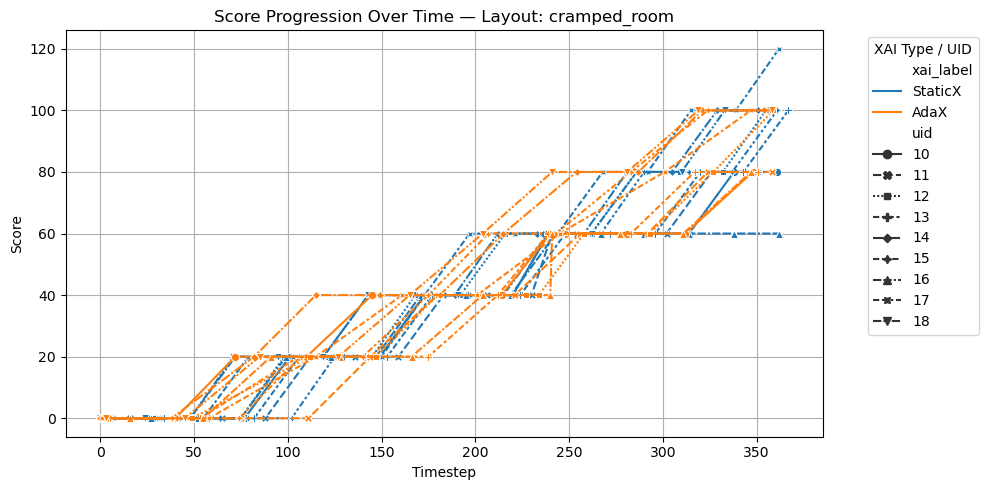

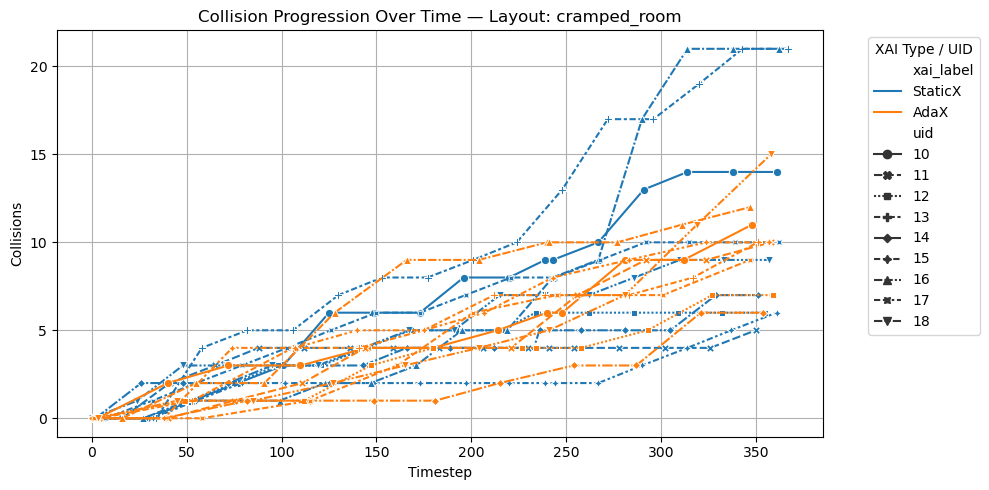

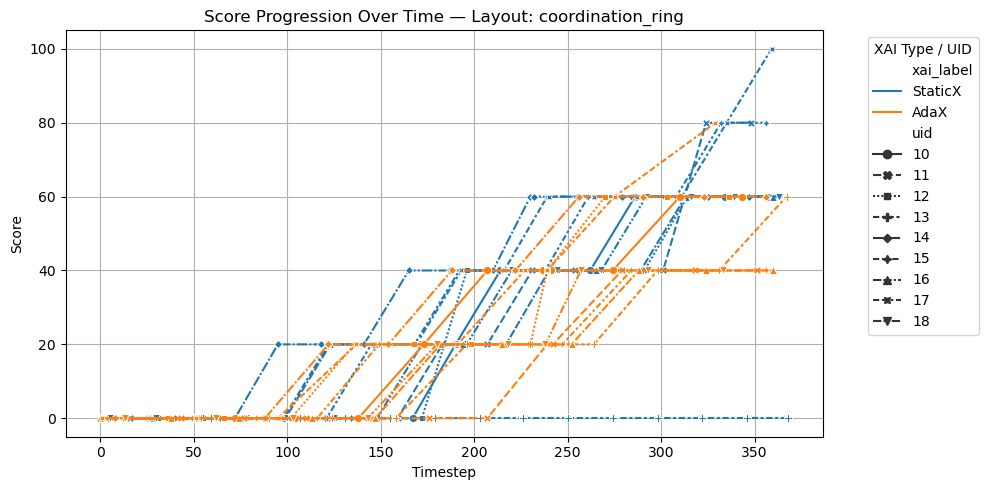

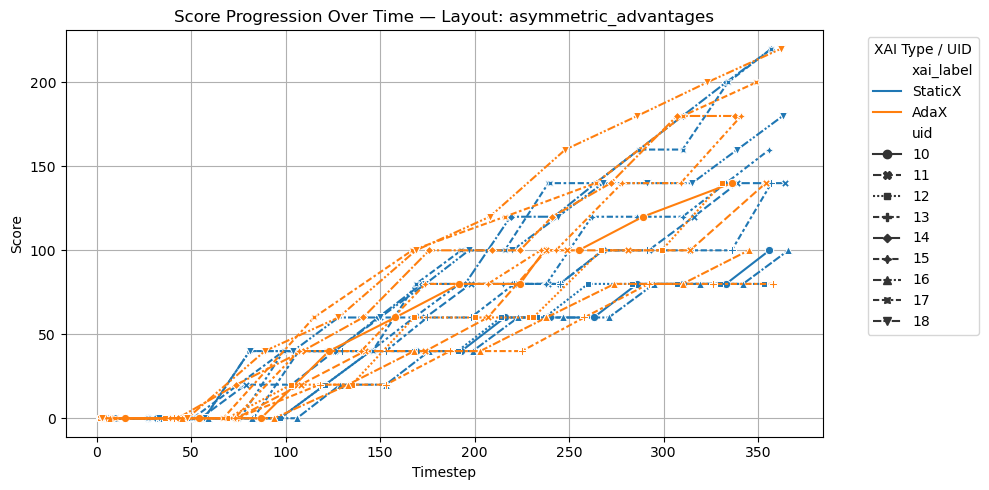

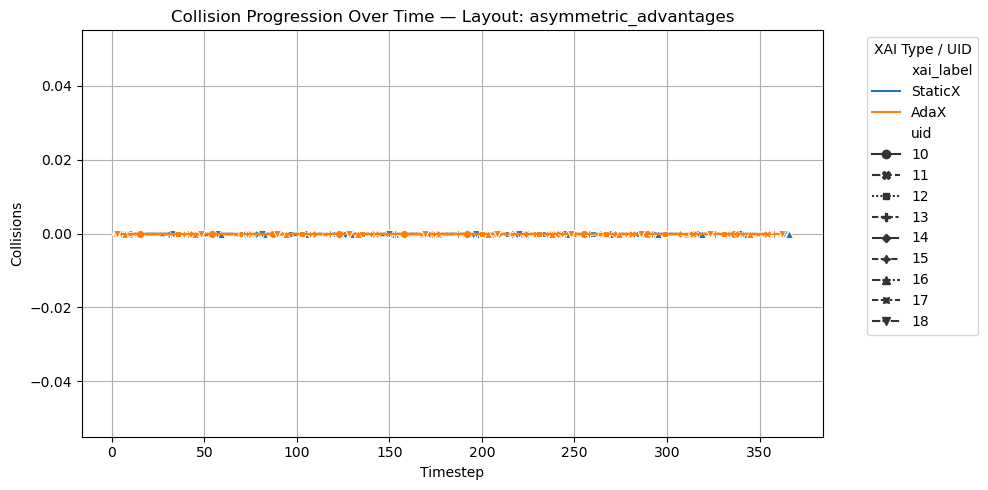

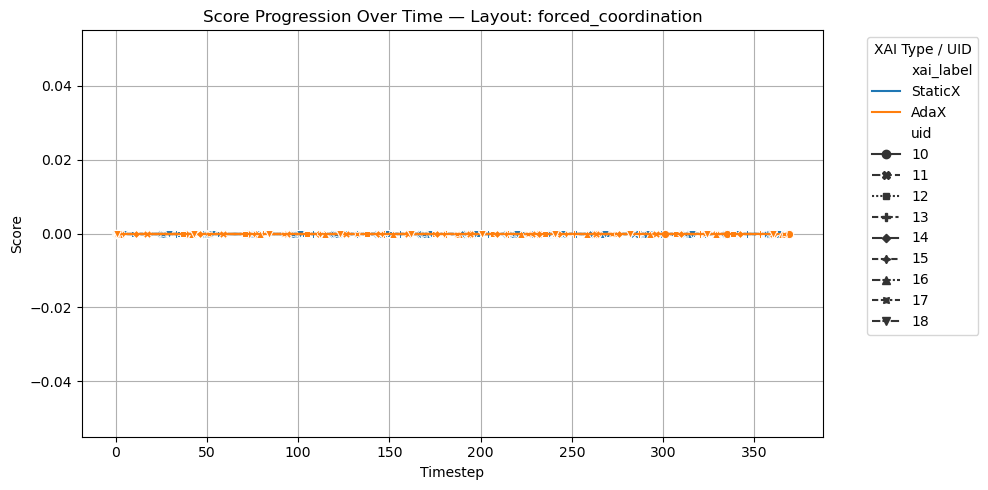

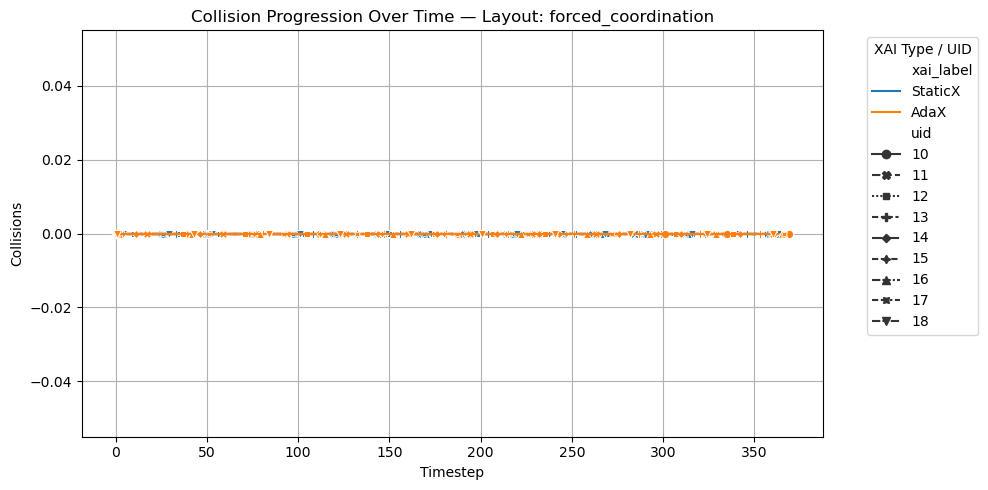

In [159]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed JSON file
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Parse metadata and construct DataFrame
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_timing = meta.get("explanation_features", {}).get("explanation_timing")
    xai_label = "StaticX" if xai_timing == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score": meta.get("score"),
        "collisions": meta.get("num_collisions"),
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep"),
        "created_at": meta.get("created_at")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df["collisions"] = pd.to_numeric(df["collisions"], errors="coerce")

# Plot score and collision progression per layout
layouts = df["layout"].dropna().unique()

for layout in layouts:
    subset = df[df["layout"] == layout]

    # Score progression
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="timestep", y="score", hue="xai_label", style="uid", estimator=None, markers=True)
    plt.title(f"Score Progression Over Time — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Score")
    plt.grid(True)
    plt.legend(title="XAI Type / UID", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # Collision progression
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="timestep", y="collisions", hue="xai_label", style="uid", estimator=None, markers=True)
    plt.title(f"Collision Progression Over Time — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Collisions")
    plt.grid(True)
    plt.legend(title="XAI Type / UID", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


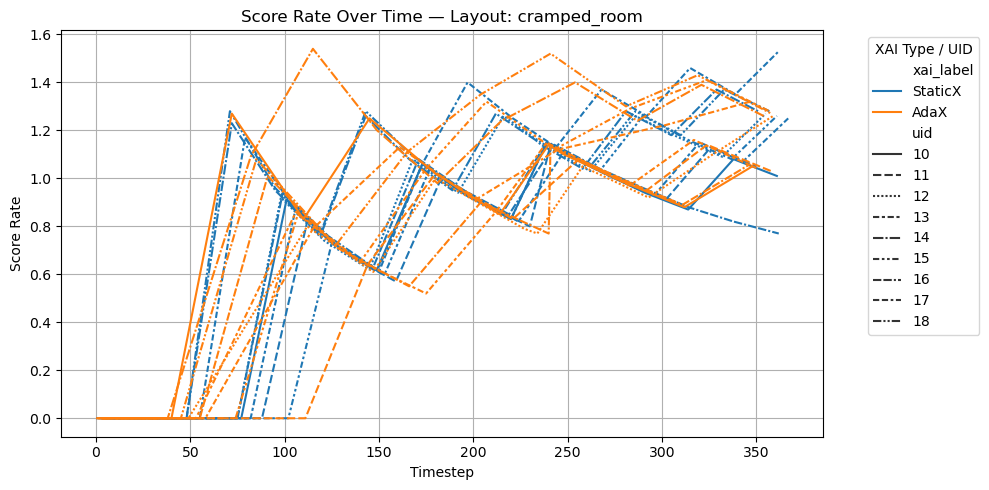

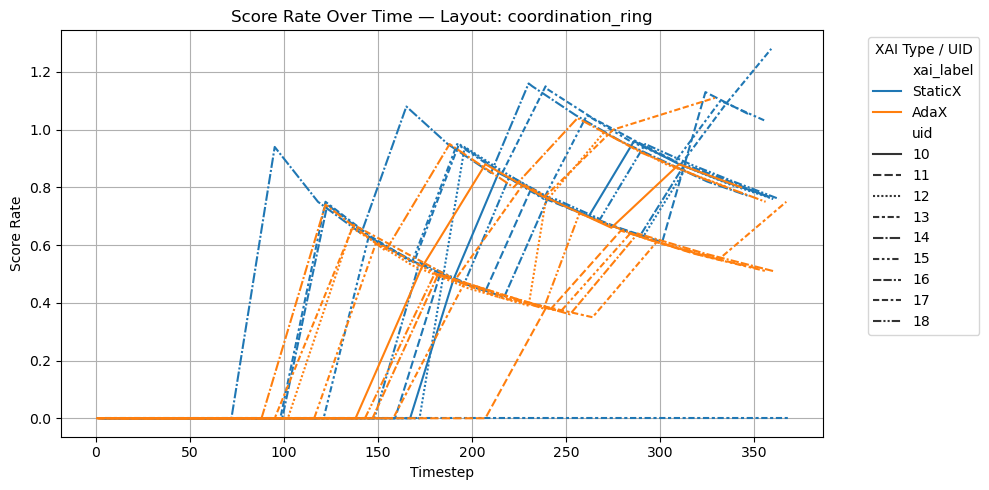

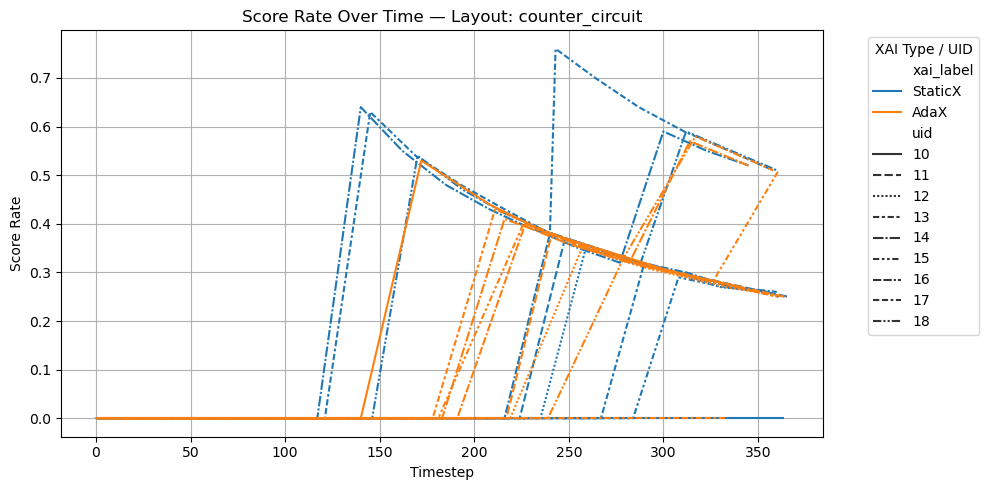

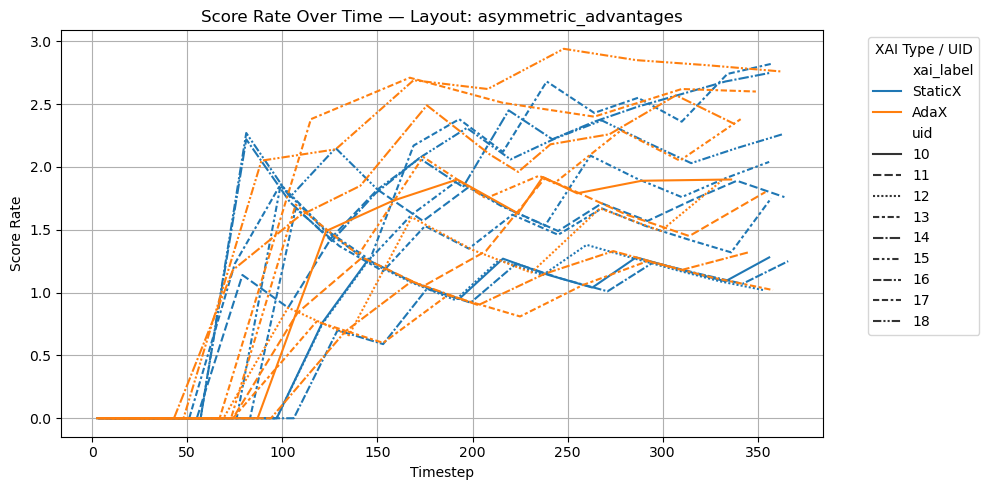

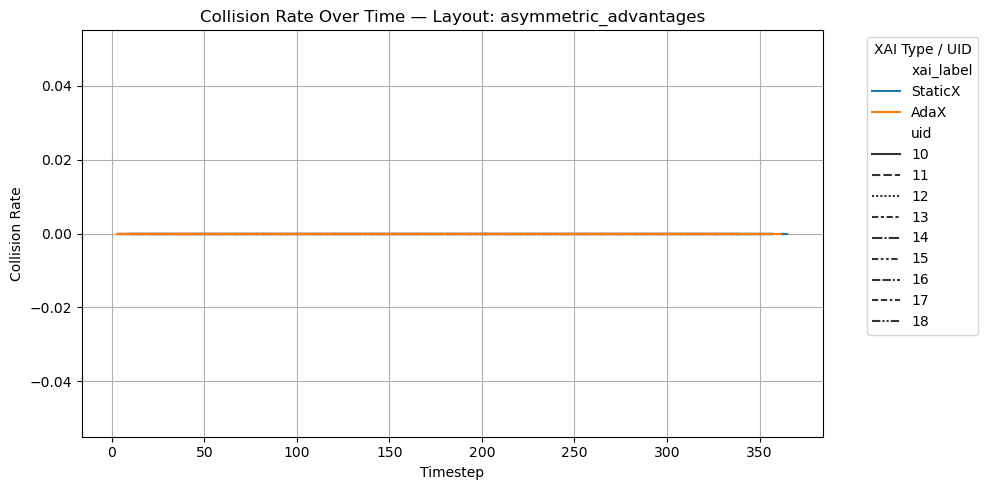

In [161]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and parse processed JSON
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Build structured records
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_type = meta.get("explanation_features", {}).get("explanation_timing")
    xai_label = "StaticX" if xai_type == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# Plot per layout
layouts = df["layout"].dropna().unique()

for layout in layouts:
    subset = df[df["layout"] == layout]

    # Score rate progression
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="timestep", y="score_rate", hue="xai_label", style="uid", estimator=None)
    plt.title(f"Score Rate Over Time — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Score Rate")
    plt.grid(True)
    plt.legend(title="XAI Type / UID", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # Collision rate progression
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=subset, x="timestep", y="collision_rate", hue="xai_label", style="uid", estimator=None)
    plt.title(f"Collision Rate Over Time — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Collision Rate")
    plt.grid(True)
    plt.legend(title="XAI Type / UID", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


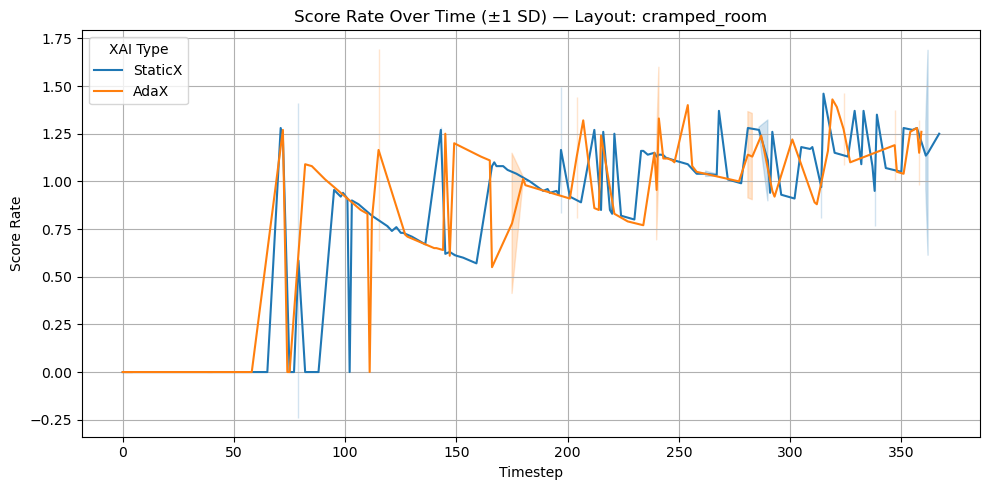

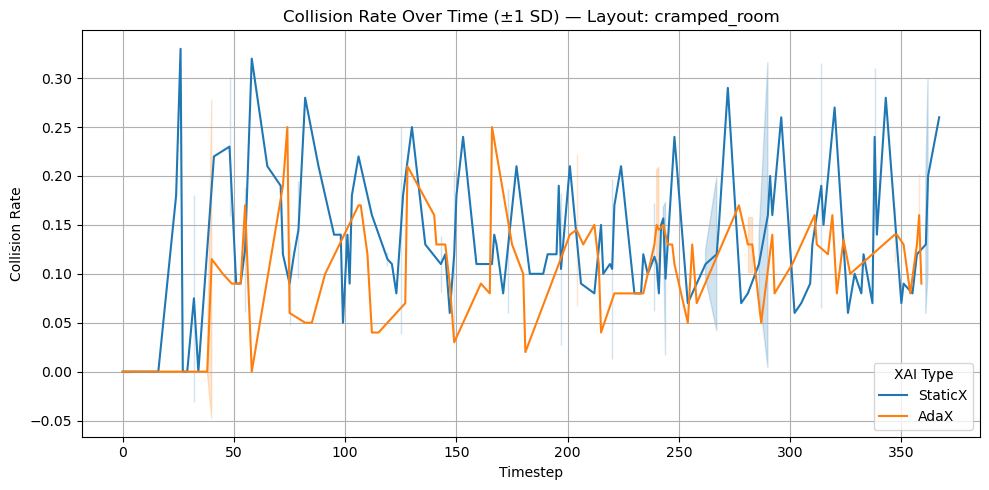

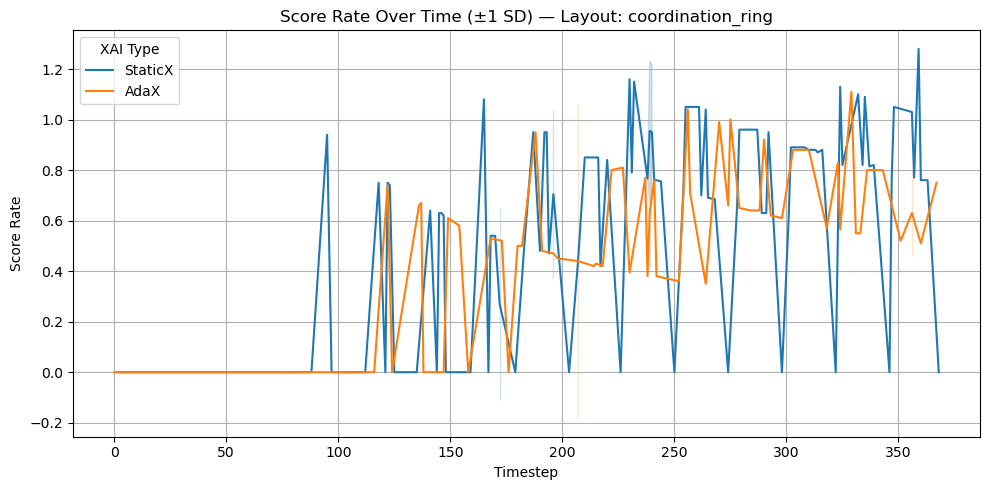

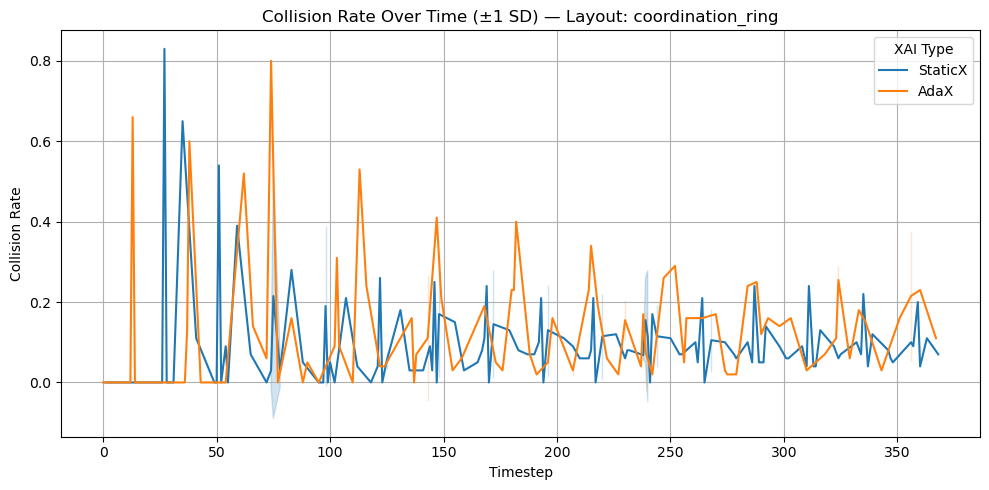

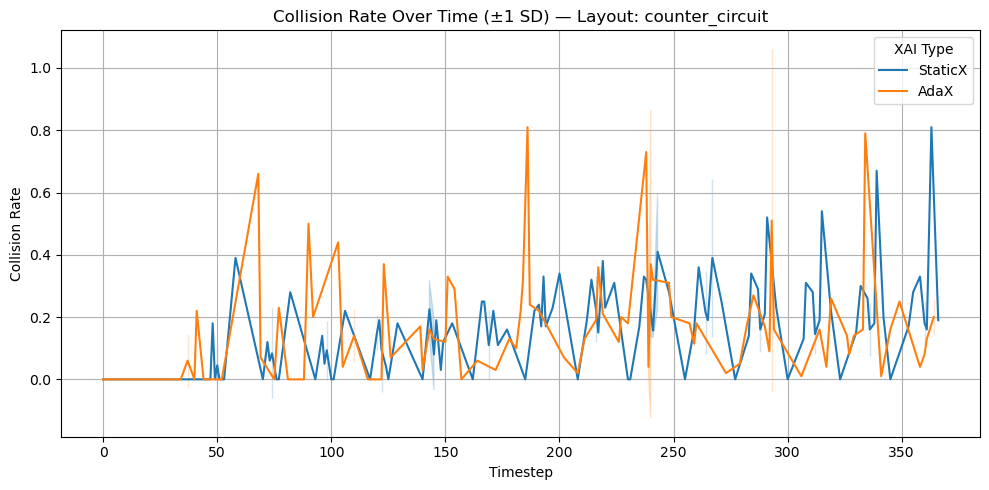

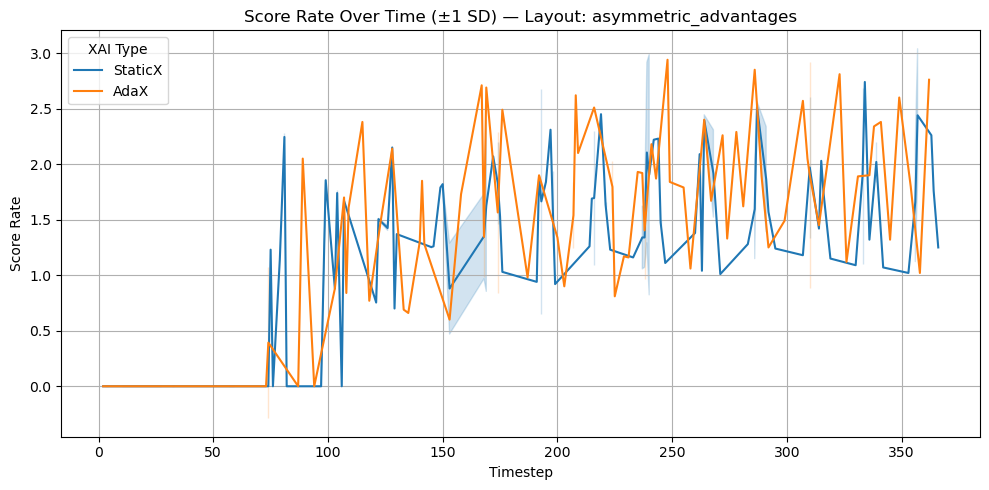

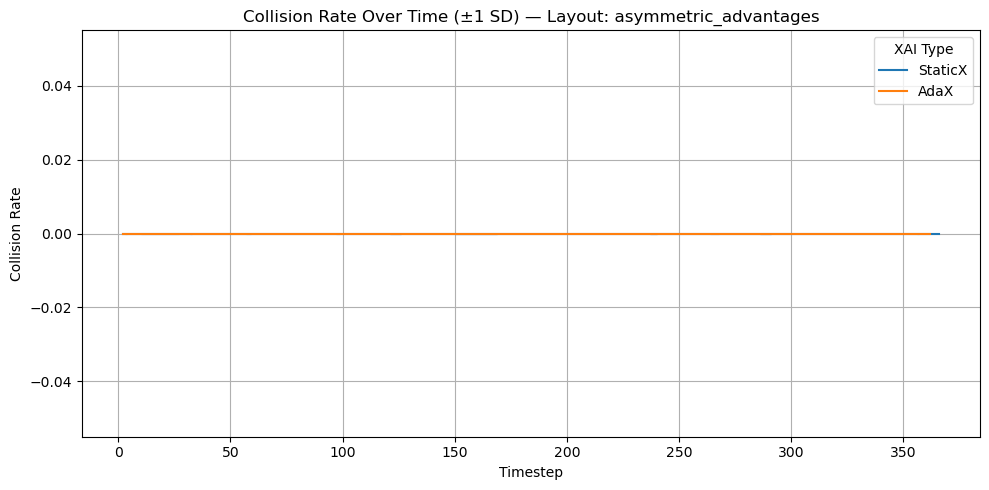

In [193]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Load the processed JSON file
# with open("processed_with_uid_filtered.json", "r") as f:
#     json_data = json.load(f)

# # Build structured records
# records = []
# for record in json_data:
#     meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
#     xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
#     records.append({
#         "uid": record.get("uid"),
#         "layout": meta.get("layout_name"),
#         "xai_label": xai_label,
#         "score_rate": meta.get("score_rate"),
#         "collision_rate": meta.get("collision_rate"),
#         "timestep": meta.get("timestep")
#     })

# # Create DataFrame
# df = pd.DataFrame(records)
# df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
# df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
# df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# # Group by uid, layout, xai_label, and timestep (participant-wise means)
# agg = df.groupby(["uid", "layout", "xai_label", "timestep"]).mean(numeric_only=True).reset_index()

# # Now compute mean across participants (trend lines)
# trend_df = agg.groupby(["layout", "xai_label", "timestep"]).mean(numeric_only=True).reset_index()

# # Plot per layout
# for layout in trend_df["layout"].unique():
#     layout_df = trend_df[trend_df["layout"] == layout]

#     # Score rate trend
#     plt.figure(figsize=(10, 5))
#     sns.lineplot(data=layout_df, x="timestep", y="score_rate", hue="xai_label")
#     plt.title(f"Participant-Averaged Score Rate — Layout: {layout}")
#     plt.xlabel("Timestep")
#     plt.ylabel("Average Score Rate")
#     plt.grid(True)
#     plt.legend(title="XAI Type")
#     plt.tight_layout()
#     plt.show()

#     # Collision rate trend
#     plt.figure(figsize=(10, 5))
#     sns.lineplot(data=layout_df, x="timestep", y="collision_rate", hue="xai_label")
#     plt.title(f"Participant-Averaged Collision Rate — Layout: {layout}")
#     plt.xlabel("Timestep")
#     plt.ylabel("Average Collision Rate")
#     plt.grid(True)
#     plt.legend(title="XAI Type")
#     plt.tight_layout()
#     plt.show()

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Extract relevant fields
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# Plot mean ± std error per layout
for layout in df["layout"].dropna().unique():
    layout_df = df[df["layout"] == layout]

    # Score Rate
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=layout_df, x="timestep", y="score_rate", hue="xai_label", errorbar='sd')
    plt.title(f"Score Rate Over Time (±1 SD) — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Score Rate")
    plt.grid(True)
    plt.legend(title="XAI Type")
    plt.tight_layout()
    plt.show()

    # Collision Rate
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=layout_df, x="timestep", y="collision_rate", hue="xai_label", errorbar='sd')
    plt.title(f"Collision Rate Over Time (±1 SD) — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Collision Rate")
    plt.grid(True)
    plt.legend(title="XAI Type")
    plt.tight_layout()
    plt.show()


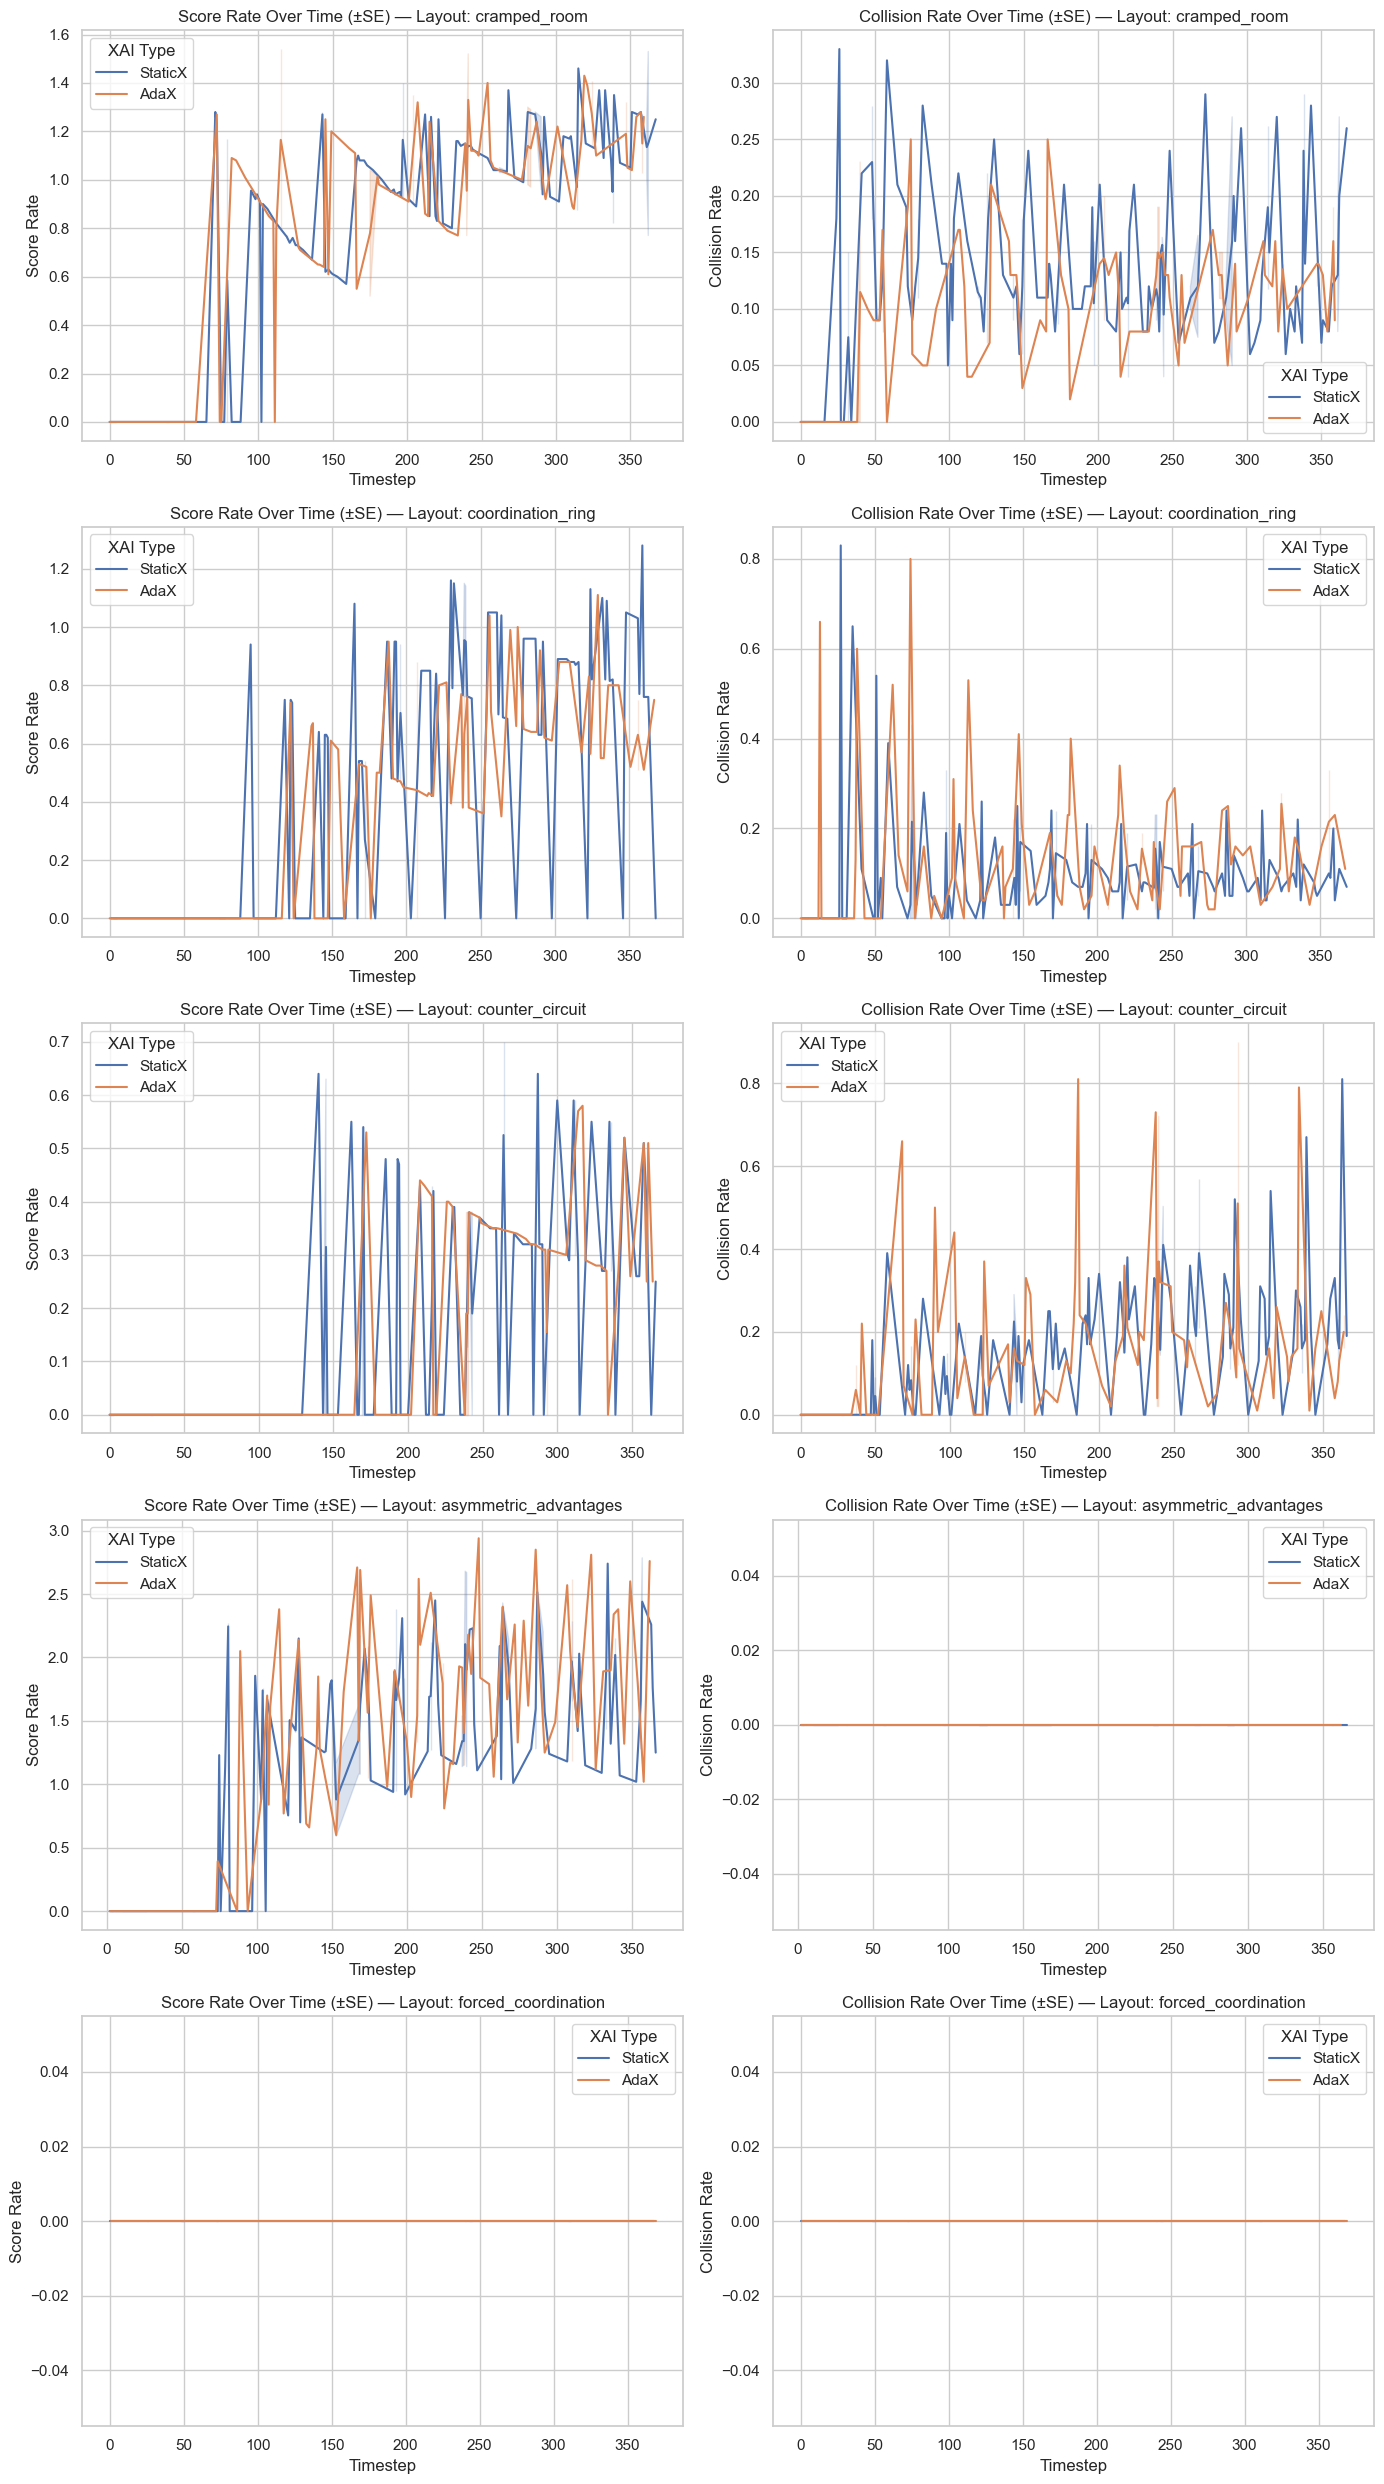

In [435]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Extract relevant fields
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# Get unique layouts
layouts = df["layout"].dropna().unique()
n_layouts = len(layouts)

# Create subplots
fig, axes = plt.subplots(n_layouts, 2, figsize=(14, 5 * n_layouts), sharex=False)
if n_layouts == 1:
    axes = axes.reshape(1, 2)  # Handle single-layout case

# Plot score_rate and collision_rate for each layout
for idx, layout in enumerate(layouts):
    layout_df = df[df["layout"] == layout]

    # Score Rate subplot
    sns.lineplot(data=layout_df, x="timestep", y="score_rate", hue="xai_label", errorbar='se', ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Score Rate Over Time (±SE) — Layout: {layout}")
    axes[idx, 0].set_xlabel("Timestep")
    axes[idx, 0].set_ylabel("Score Rate")
    axes[idx, 0].grid(True)
    axes[idx, 0].legend(title="XAI Type")

    # Collision Rate subplot
    sns.lineplot(data=layout_df, x="timestep", y="collision_rate", hue="xai_label", errorbar='se', ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Collision Rate Over Time (±SE) — Layout: {layout}")
    axes[idx, 1].set_xlabel("Timestep")
    axes[idx, 1].set_ylabel("Collision Rate")
    axes[idx, 1].grid(True)
    axes[idx, 1].legend(title="XAI Type")

plt.tight_layout()
plt.savefig("Score and Collision rate variation over time")
plt.show()


In [440]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Extract relevant fields
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# Smoothing function: rolling average within each (layout, xai_label) group
df = df.sort_values(by=["layout", "xai_label", "timestep"])
df["score_rate_smooth"] = df.groupby(["layout", "xai_label"])["score_rate"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df["collision_rate_smooth"] = df.groupby(["layout", "xai_label"])["collision_rate"].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Get unique layouts
layouts = df["layout"].dropna().unique()
n_layouts = len(layouts)

# Create subplots
fig, axes = plt.subplots(n_layouts, 2, figsize=(14, 5 * n_layouts), sharex=False)
if n_layouts == 1:
    axes = axes.reshape(1, 2)

# Plot smoothed lines
for idx, layout in enumerate(layouts):
    layout_df = df[df["layout"] == layout]

    # Score Rate
    sns.lineplot(data=layout_df, x="timestep", y="score_rate_smooth", hue="xai_label", ax=axes[idx, 0])
    axes[idx, 0].set_title(f"Smoothed Score Rate — Layout: {layout}")
    axes[idx, 0].set_xlabel("Timestep")
    axes[idx, 0].set_ylabel("Smoothed Score Rate")
    axes[idx, 0].grid(True)

    # Collision Rate
    sns.lineplot(data=layout_df, x="timestep", y="collision_rate_smooth", hue="xai_label", ax=axes[idx, 1])
    axes[idx, 1].set_title(f"Smoothed Collision Rate — Layout: {layout}")
    axes[idx, 1].set_xlabel("Timestep")
    axes[idx, 1].set_ylabel("Smoothed Collision Rate")
    axes[idx, 1].grid(True)

plt.tight_layout()
plt.savefig("Score and Collision rate variation over time (smoothened)")
plt.show()


In [172]:
#auc

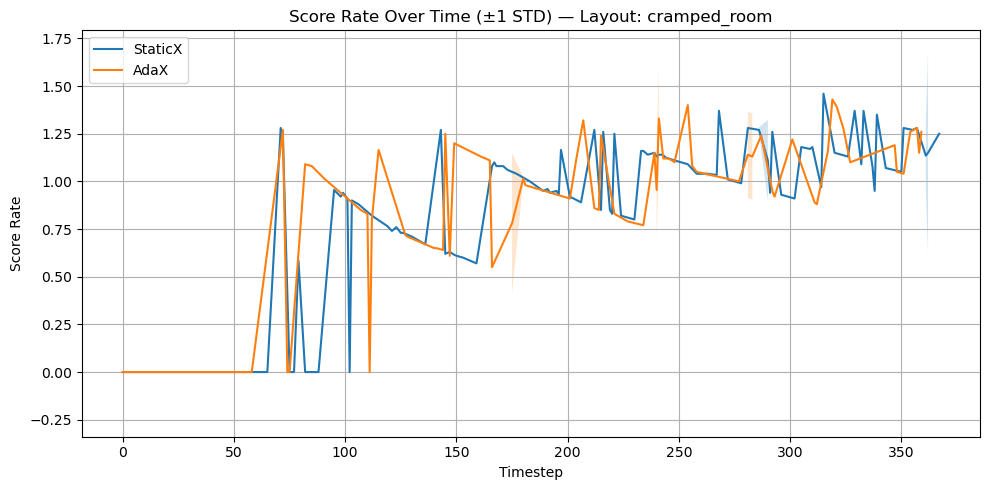

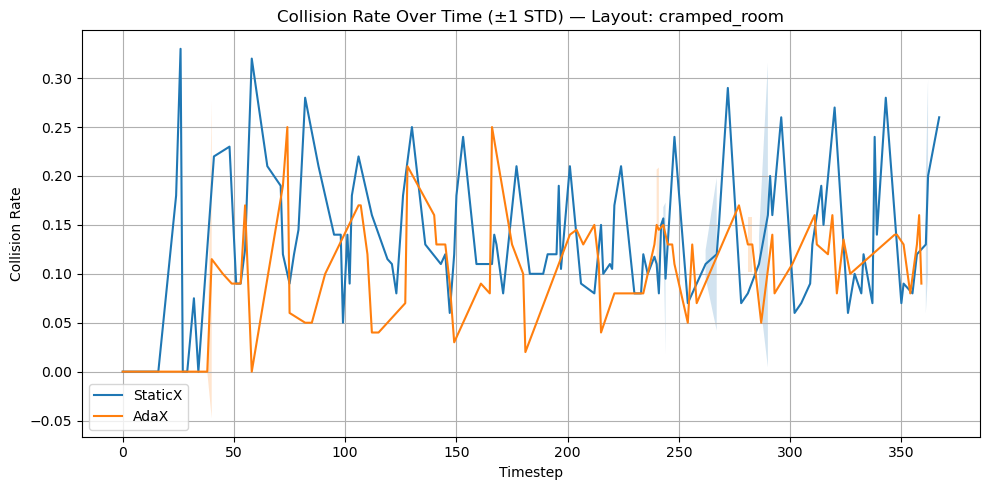

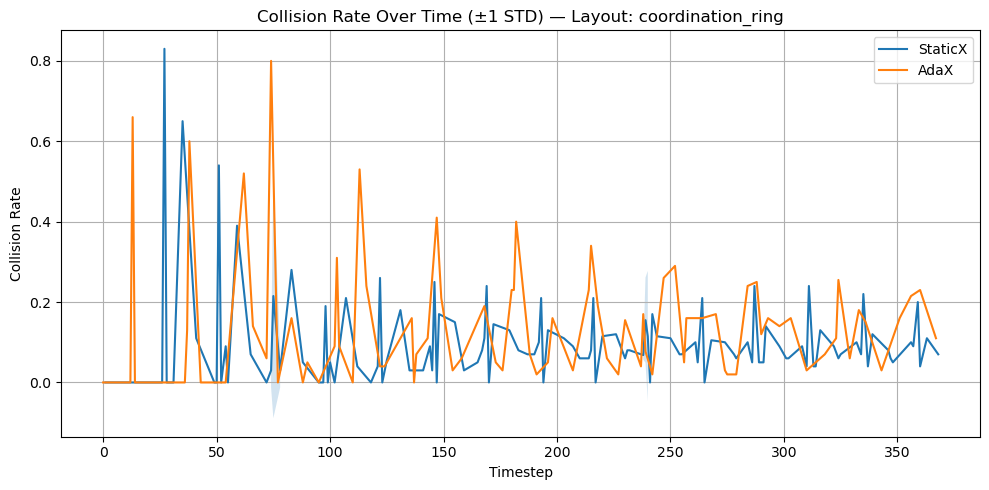

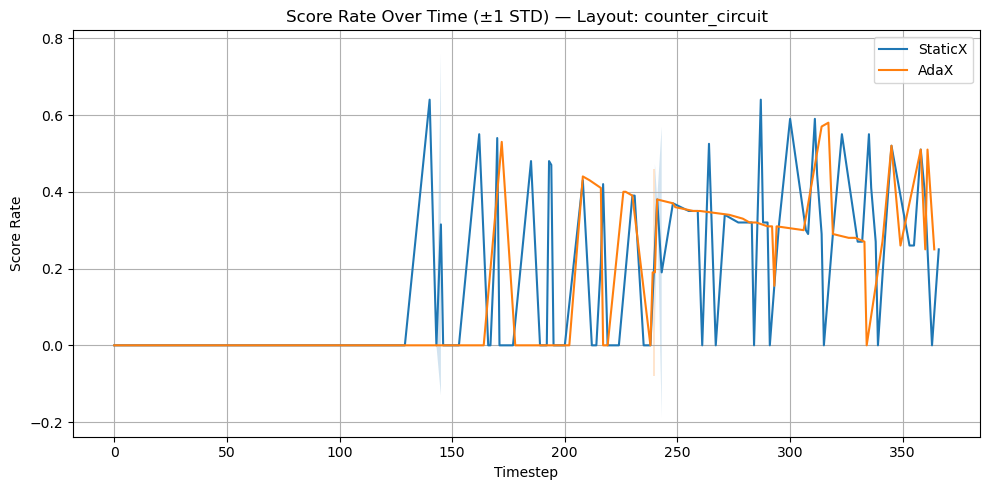

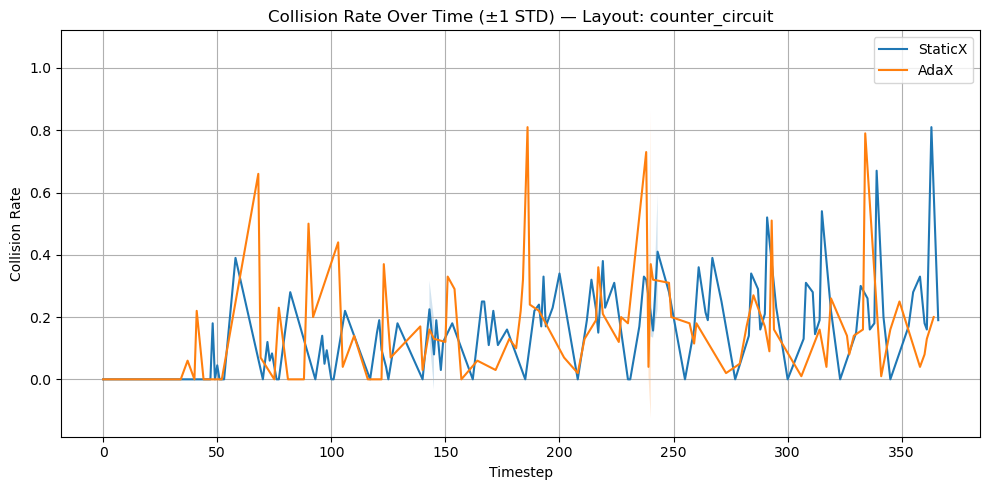

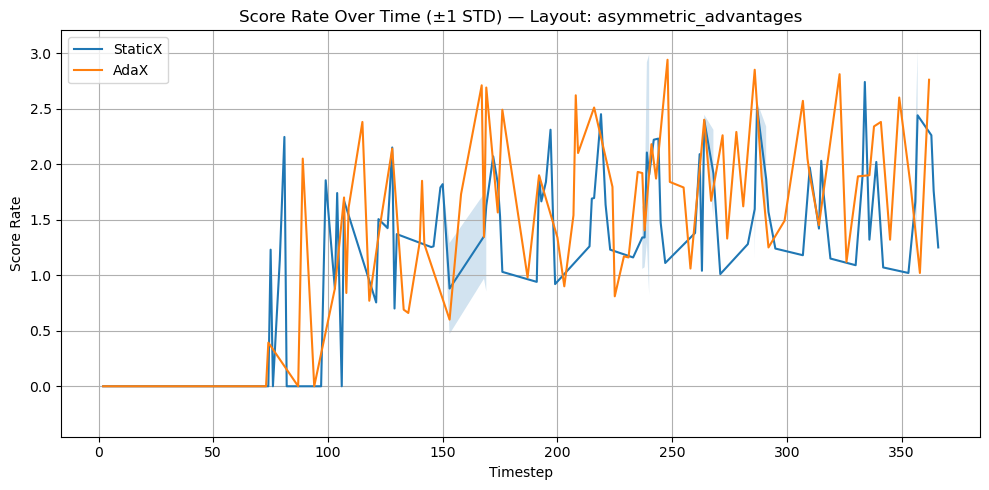

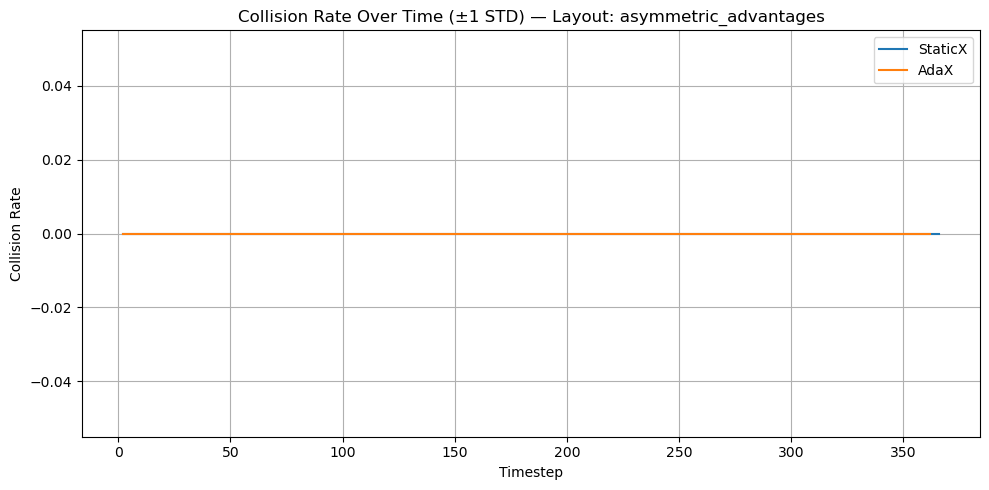

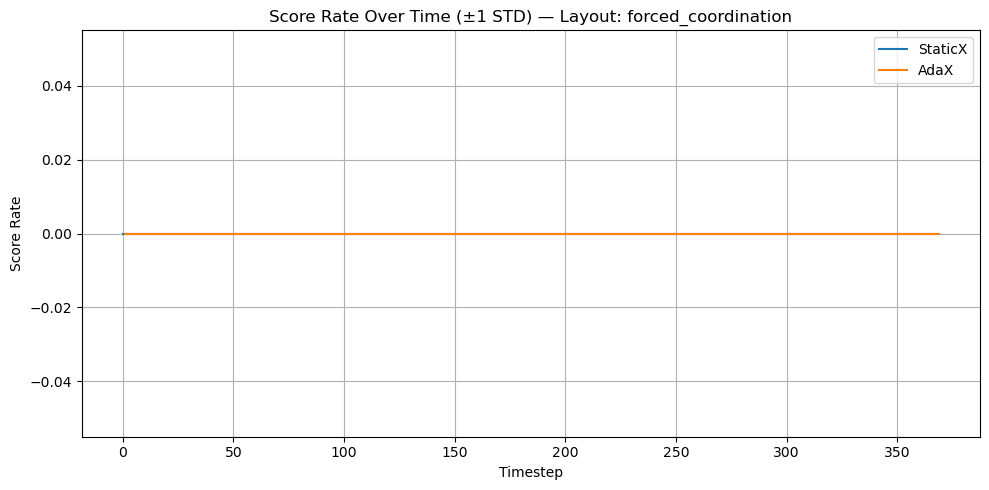

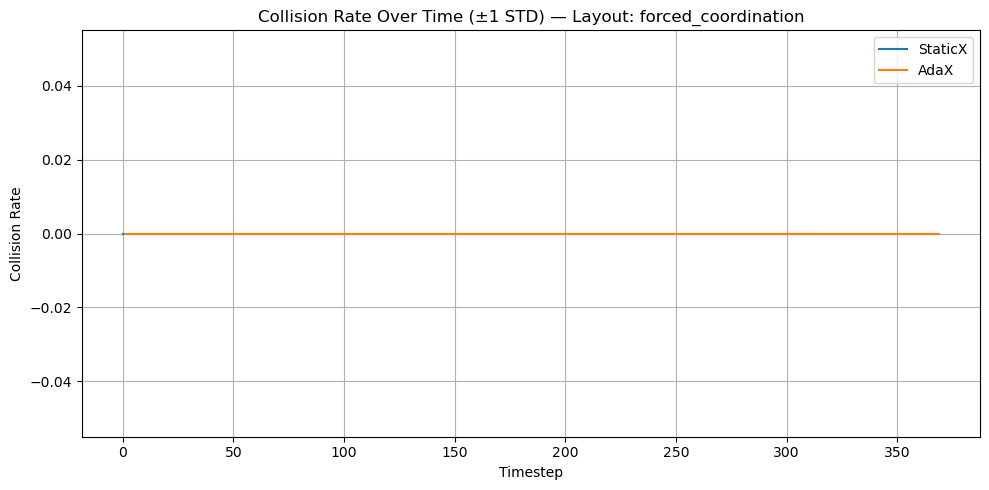

In [184]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load JSON data
with open("processed_with_uid_filtered.json", "r") as f:
    json_data = json.load(f)

# Extract relevant fields
records = []
for record in json_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
    records.append({
        "uid": record.get("uid"),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

# Create DataFrame
df = pd.DataFrame(records)
df["timestep"] = pd.to_numeric(df["timestep"], errors="coerce")
df["score_rate"] = pd.to_numeric(df["score_rate"], errors="coerce")
df["collision_rate"] = pd.to_numeric(df["collision_rate"], errors="coerce")

# Drop any invalid entries
df = df.dropna(subset=["timestep", "score_rate", "collision_rate"])

# Plot per layout for both score_rate and collision_rate
for layout in df["layout"].dropna().unique():
    layout_df = df[df["layout"] == layout]

    # Plot SCORE RATE
    plt.figure(figsize=(10, 5))
    for xai_label in ["StaticX", "AdaX"]:
        subset = layout_df[layout_df["xai_label"] == xai_label]
        grouped = subset.groupby("timestep")["score_rate"].agg(["mean", "std"]).reset_index()
        plt.plot(grouped["timestep"], grouped["mean"], label=f"{xai_label}")
        plt.fill_between(grouped["timestep"],
                         grouped["mean"] - grouped["std"],
                         grouped["mean"] + grouped["std"],
                         alpha=0.2)
    plt.title(f"Score Rate Over Time (±1 STD) — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Score Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot COLLISION RATE
    plt.figure(figsize=(10, 5))
    for xai_label in ["StaticX", "AdaX"]:
        subset = layout_df[layout_df["xai_label"] == xai_label]
        grouped = subset.groupby("timestep")["collision_rate"].agg(["mean", "std"]).reset_index()
        plt.plot(grouped["timestep"], grouped["mean"], label=f"{xai_label}")
        plt.fill_between(grouped["timestep"],
                         grouped["mean"] - grouped["std"],
                         grouped["mean"] + grouped["std"],
                         alpha=0.2)
    plt.title(f"Collision Rate Over Time (±1 STD) — Layout: {layout}")
    plt.xlabel("Timestep")
    plt.ylabel("Collision Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/2094633321.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/2094633321.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


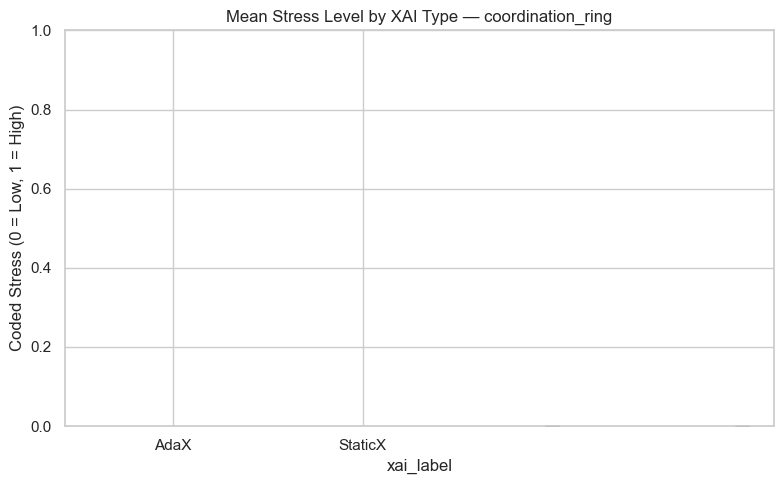

/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/2094633321.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/2094633321.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


/var/folders/d7/x2slvs7j1sbfbq8sjy_6vf6m0000gn/T/ipykernel_98746/2094633321.py:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


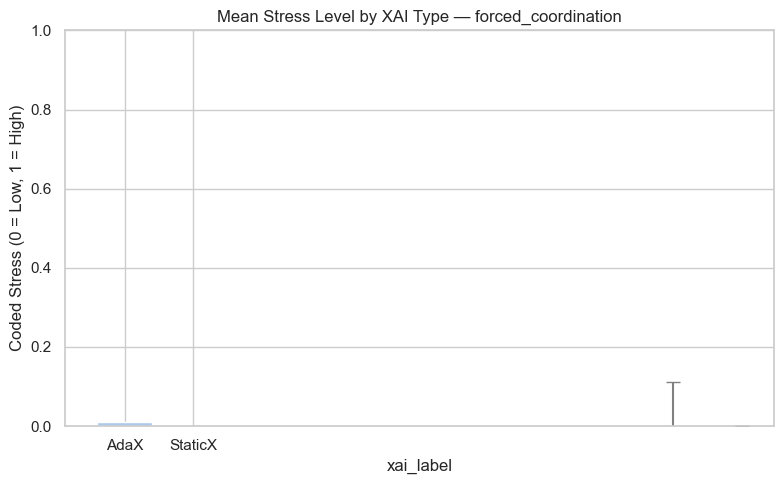

In [207]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load JSON ===
with open("processed_with_uid_filtered.json", "r") as f:
    data = json.load(f)

# === Step 2: Parse and encode stress ===
records = []
for record in data:
    meta = record["metadata"]
    uid = record.get("uid")
    if uid:
        xai_type = meta.get("explanation_features", {}).get("explanation_timing", "unknown")
        xai_label = "StaticX" if xai_type == "unknown" else "AdaX"
        stress = meta.get("stress", "").lower()
        if stress in ["low", "high"]:
            stress_code = 0 if stress == "low" else 1
            records.append({
                "uid": uid,
                "layout": meta.get("layout_name"),
                "xai_label": xai_label,
                "stress_code": stress_code
            })

df = pd.DataFrame(records)

# === Step 3: Aggregate ===
agg = df.groupby(["layout", "xai_label"]).agg(
    mean_stress=("stress_code", "mean"),
    std_stress=("stress_code", "std")
).reset_index()

# === Step 4: Plot for each layout ===
sns.set(style="whitegrid")
layouts = agg["layout"].unique()

for layout in layouts:
    layout_df = agg[agg["layout"] == layout]
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=layout_df,
        x="xai_label",
        y="mean_stress",
        ci=None,
        palette="pastel"
    )
    # Add error bars manually
    for i, row in layout_df.iterrows():
        ax.errorbar(i, row["mean_stress"], yerr=row["std_stress"], fmt='none', color='gray', capsize=5)
    plt.title(f"Mean Stress Level by XAI Type — {layout}")
    plt.ylabel("Coded Stress (0 = Low, 1 = High)")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


4.X Temporal Performance Analysis by Explanation Type


To assess the effect of explanation type on real-time task performance, we analyzed score rate and collision rate trajectories aggregated across participants for each kitchen layout. Each participant completed rounds using both static (StaticX) and adaptive (AdaX) explanation modes, allowing within-subject comparison. The results are visualized with participant-averaged line plots and ±1 standard deviation error bands per timestep.

Score Rate Trends

Across most layouts—including asymmetric_advantages, coordination_ring, and cramped_room—AdaX exhibited consistently higher score rates than StaticX from early timesteps. This suggests that adaptive explanations helped participants engage with the task more quickly and maintain productive behavior. In particular, asymmetric_advantages showed a rapid early rise in score rate under AdaX, indicating improved orientation and goal alignment during the high-pressure early phase of the round.

In contrast, score rate under StaticX often increased more gradually, reflecting slower comprehension or delayed coordination. In simpler layouts such as forced_coordination and counter_circuit, score rates between AdaX and StaticX tended to converge over time, suggesting reduced need for adaptive support in low-complexity tasks.

Collision Rate Trends

AdaX also demonstrated clear advantages in reducing coordination breakdowns. In complex layouts like coordination_ring and counter_circuit, StaticX resulted in higher and more erratic collision rates throughout the round. AdaX, by contrast, showed early peaks followed by a steady decline in collisions, suggesting that adaptively tuned guidance helped mitigate early confusion and support mid-round adjustments.

Notably, the standard deviation bands around StaticX trends were consistently wider than those of AdaX—indicating greater variability across participants in their ability to interpret and act upon static instructions.

Consistency and Generalizability

The narrower error bands observed under AdaX for both score and collision rates highlight the consistency of its benefits. Adaptive explanations appear to generalize more effectively across diverse users and states, whereas static explanations may only benefit those already predisposed to effective coordination.

Summary

Overall, AdaX outperforms StaticX in promoting faster task engagement, reducing collisions, and stabilizing user performance in complex environments. The adaptive explanation strategy appears to be particularly beneficial under high cognitive load and dynamic layout conditions.

Statistical Power and Temporal Sensitivity Considerations


Although our within-subject statistical analysis of subjective ratings (e.g., trust, stress, and cognitive load) did not yield statistically significant differences between the StaticX and AdaX conditions, this outcome is likely attributable to low statistical power. With only nine participants and a paired measurement design, the estimated power to detect a medium effect size (Cohen’s d = 0.5) was approximately 0.42—well below the conventional threshold of 0.80. This means there was a 58% chance of failing to detect a true effect even if one existed. Subjective ratings, collected once per condition per participant, are also limited in their temporal sensitivity and may fail to capture rapid fluctuations in trust or cognitive load that occur within rounds.

In contrast, our temporal analysis, which integrates behavioral indicators (e.g., score rate, collision rate) and real-time emotion predictions, offers significantly higher temporal granularity and effective statistical power. With dozens of observations per participant per round, this data enables the detection of nuanced, dynamic shifts in task performance and emotional state. This sensitivity revealed meaningful patterns—such as AdaX facilitating faster trust formation, improved early-game coordination, and reduced mid-round collisions—that were not evident from post-hoc subjective questionnaires alone. Thus, while the subjective data lacked statistical power to confirm our hypotheses, the temporal evidence offers strong support for the functional advantages of adaptive explanations in high-pressure human-machine teaming.

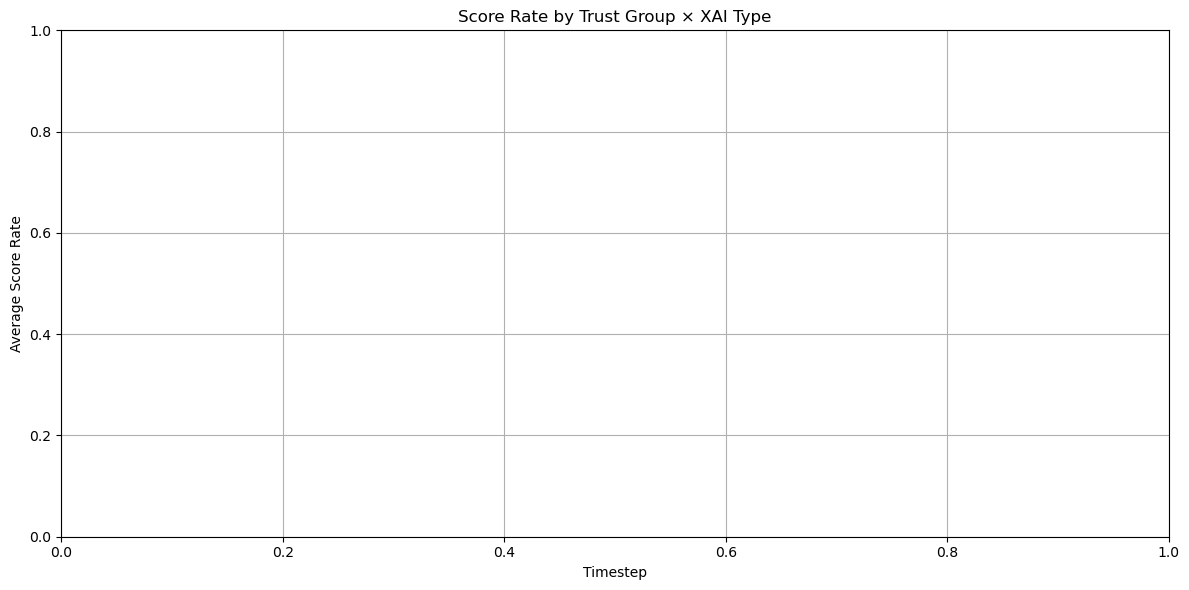

In [191]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load subjective ratings data
xls = pd.ExcelFile("sdata2.xlsx")
sheets = [xls.parse(sheet, header=1) for sheet in xls.sheet_names]
df_ratings = pd.concat(sheets, ignore_index=True)

# Select trust-related columns
trust_cols = [
    "Part 1: About the characteristics of AI Chef. - How reliable is the AI Chef?",
    "Part 1: About the characteristics of AI Chef. - How dependable is the AI Chef?",
    "Part 1: About the characteristics of AI Chef. - How competent is the AI Chef?",
    "Part 1: About the characteristics of AI Chef. - How capable is the AI Chef?",
    "Part 2: Your experience with the AI Chef’s explanations. - This explanation helps me know when I should trust and not trust the AI Chef.",
]

df_ratings = df_ratings[["uid"] + trust_cols].dropna()
df_ratings["uid"] = df_ratings["uid"].astype(str)

# 2. Cluster participants into High vs Low Trust
X = StandardScaler().fit_transform(df_ratings[trust_cols])
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X)
means = pd.DataFrame(X, columns=trust_cols).groupby(kmeans.labels_).mean().mean(axis=1)
map_trust = {means.idxmax(): "High Trust", means.idxmin(): "Low Trust"}
df_ratings["trust_group"] = [map_trust[label] for label in kmeans.labels_]

# 3. Load temporal JSON data
with open("processed_with_uid_filtered.json", "r") as f:
    temporal_data = json.load(f)

# 4. Parse temporal data into dataframe
records = []
for record in temporal_data:
    meta = json.loads(record["metadata"]) if isinstance(record["metadata"], str) else record["metadata"]
    xai_label = "StaticX" if meta.get("explanation_features", {}).get("explanation_timing") == "unknown" else "AdaX"
    records.append({
        "uid": str(record.get("uid")),
        "layout": meta.get("layout_name"),
        "xai_label": xai_label,
        "score_rate": meta.get("score_rate"),
        "collision_rate": meta.get("collision_rate"),
        "timestep": meta.get("timestep")
    })

df_temporal = pd.DataFrame(records)
df_temporal["timestep"] = pd.to_numeric(df_temporal["timestep"], errors="coerce")
df_temporal["score_rate"] = pd.to_numeric(df_temporal["score_rate"], errors="coerce")
df_temporal["collision_rate"] = pd.to_numeric(df_temporal["collision_rate"], errors="coerce")

# 5. Merge trust group info
df_merged = pd.merge(df_temporal, df_ratings[["uid", "trust_group"]], on="uid", how="left")
df_merged = df_merged.dropna(subset=["trust_group", "score_rate", "collision_rate", "timestep"])

# 6. Group and plot
agg = df_merged.groupby(["trust_group", "xai_label", "timestep"]).mean(numeric_only=True).reset_index()

# Plot Score Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg, x="timestep", y="score_rate", hue="trust_group", style="xai_label")
plt.title("Score Rate by Trust Group × XAI Type")
plt.xlabel("Timestep")
plt.ylabel("Average Score Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Collision Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg, x="timestep", y="collision_rate", hue="trust_group", style="xai_label")
plt.title("Collision Rate by Trust Group × XAI Type")
plt.xlabel("Timestep")
plt.ylabel("Average Collision Rate")
plt.grid(True)
plt.tight_layout()
plt.show()
